In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KNN

# encoding
from sklearn.preprocessing import OneHotEncoder

# resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

# Voting and Stacking
from sklearn.ensemble import VotingClassifier, StackingClassifier

# metric
from sklearn.metrics import mean_squared_error

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# evaluation
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from google.colab import files

# Upload the Excel file
uploaded = files.upload()

# Then load it into a DataFrame
df_edabin = pd.read_excel('E-Commerce EDA.xlsx')

# Show the first few rows
df_edabin.head()


Saving E-Commerce EDA.xlsx to E-Commerce EDA (2).xlsx


Churn    Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1  4.000000                Phone         3              6.0   
1      1  8.979499                Phone         1              8.0   
2      1  9.432782                Phone         1             30.0   
3      1  0.000000                Phone         3             15.0   
4      1  0.000000                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female        3.000000                         3   
1                  UPI    Male        3.000000                         4   
2           Debit Card    Male        2.000000                         4   
3           Debit Card    Male        2.000000                         4   
4          Credit Card    Male        2.411191                         3   

     PreferedOrderCat  ...  Tenure_bin_range WarehouseToHome_bin_range  \
0  Laptop & Accessory  ...           3.5–5.5                   0.0–6.5   
1              Mobile  ...          5.5–15.5                   6.5–8.5   
2              Mobile  ...          5.5–15.5                 27.5–31.5   
3  Laptop & Accessory  ...           0.0–0.5                 14.5–17.5   
4              Mobile  ...           0.0–0.5                  8.5–14.5   

   NumberOfAddress_bin_range  OrderAmountHikeFromlastYear_bin_range  \
0                     6.5–20                               0.0–12.5   
1                     6.5–20                              13.5–18.5   
2                    5.5–6.5                              13.5–18.5   
3                     6.5–20                              22.5–26.0   
4                    1.5–5.5                               0.0–12.5   

   CouponUsed_bin_range  OrderCount_bin_range  DaySinceLastOrder_bin_range  \
0               0.0–2.5               0.0–3.5                      3.5–7.5   
1               0.0–2.5               0.0–3.5                      0.0–1.5   
2               0.0–2.5               0.0–3.5                      1.5–3.5   
3               0.0–2.5               0.0–3.5                      1.5–3.5   
4               0.0–2.5               0.0–3.5                      1.5–3.5   

   CashbackAmount_bin_range  NumberOfDeviceRegistered_bin_range  \
0             154.63–162.43                             2.5–3.5   
1                0.0–147.75                             3.5–4.5   
2                0.0–147.75                             3.5–4.5   
3                0.0–147.75                             3.5–4.5   
4                0.0–147.75                             2.5–3.5   

   SatisfactionScore_Reversed  
0                           4  
1                           3  
2                           3  
3                           1  
4                           1  

[5 rows x 54 columns]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_multiple_stacked_churn(df_edabin, cols, churn_col='Churn', n_cols=3):
    n_rows = (len(cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        data = df_edabin.groupby([col, churn_col]).size().unstack(fill_value=0)
        percent = data.div(data.sum(axis=1), axis=0) * 100

        # Plot stacked bar
        percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#17becf'])

        # Add labels
        for j, idx in enumerate(percent.index):
            bottom = 0
            for churn_status in percent.columns:
                count = data.loc[idx, churn_status]
                pct = percent.loc[idx, churn_status]
                if pct > 5:
                    ax.text(j, bottom + pct / 2, f'{int(count)}\n({int(pct)}%)',
                            ha='center', va='center', fontsize=8, color='white')
                bottom += pct

        ax.set_title(col)
        ax.set_ylabel('Persentase (%)')
        ax.set_xlabel('')
        ax.set_xticklabels(percent.index.astype(str), rotation=45, ha='right')
        ax.legend(title='Keterangan')

    # Remove any unused subplots
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# **4. EDA**

In [4]:
df_edabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    5462 non-null   int64  
 1   Tenure                                   5462 non-null   float64
 2   PreferredLoginDevice                     5462 non-null   object 
 3   CityTier                                 5462 non-null   int64  
 4   WarehouseToHome                          5462 non-null   float64
 5   PreferredPaymentMode                     5462 non-null   object 
 6   Gender                                   5462 non-null   object 
 7   HourSpendOnApp                           5462 non-null   float64
 8   NumberOfDeviceRegistered                 5462 non-null   int64  
 9   PreferedOrderCat                         5462 non-null   object 
 10  SatisfactionScore                        5462 no

In [5]:
df_edabin.describe(exclude='number')

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  5462                 5462   5462                5462   
unique                    2                    5      2                   6   
top                   Phone           Debit Card   Male  Laptop & Accessory   
freq                   3888                 2239   3284                1986   

       MaritalStatus HourSpendOnApp_bin_range Tenure_bin_range  \
count           5462                     5462             5462   
unique             3                        3                7   
top          Married                  2.5–3.5         5.5–15.5   
freq            2891                     2700             2220   

       WarehouseToHome_bin_range NumberOfAddress_bin_range  \
count                       5462                      5462   
unique                         7                         4   
top                     8.5–14.5                   1.5–5.5   
freq                        1824                      3682   

       OrderAmountHikeFromlastYear_bin_range CouponUsed_bin_range  \
count                                   5462                 5462   
unique                                     6                    3   
top                                13.5–18.5              0.0–2.5   
freq                                    2407                 4459   

       OrderCount_bin_range DaySinceLastOrder_bin_range  \
count                  5462                        5462   
unique                    3                           6   
top                 0.0–3.5                     1.5–3.5   
freq                   4170                        1698   

       CashbackAmount_bin_range NumberOfDeviceRegistered_bin_range  
count                      5462                               5462  
unique                        7                                  4  
top                162.43–232.0                            3.5–4.5  
freq                       1984                               2361

In [6]:
df_edabin.describe(exclude='category')

Churn       Tenure PreferredLoginDevice     CityTier  \
count   5462.000000  5462.000000                 5462  5462.000000   
unique          NaN          NaN                    2          NaN   
top             NaN          NaN                Phone          NaN   
freq            NaN          NaN                 3888          NaN   
mean       0.165690    10.112488                  NaN     1.653241   
std        0.371836     8.363162                  NaN     0.914715   
min        0.000000     0.000000                  NaN     1.000000   
25%        0.000000     3.000000                  NaN     1.000000   
50%        0.000000     9.000000                  NaN     1.000000   
75%        0.000000    15.000000                  NaN     3.000000   
max        1.000000    61.000000                  NaN     3.000000   

        WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
count       5462.000000                 5462   5462     5462.000000   
unique              NaN                    5      2             NaN   
top                 NaN           Debit Card   Male             NaN   
freq                NaN                 2239   3284             NaN   
mean          15.565430                  NaN    NaN        2.905584   
std            8.042083                  NaN    NaN        0.712455   
min            5.000000                  NaN    NaN        0.000000   
25%            9.000000                  NaN    NaN        2.000000   
50%           14.000000                  NaN    NaN        3.000000   
75%           19.000000                  NaN    NaN        3.000000   
max           36.000000                  NaN    NaN        4.000000   

        NumberOfDeviceRegistered    PreferedOrderCat  ...  Tenure_bin_range  \
count                5462.000000                5462  ...              5462   
unique                       NaN                   6  ...                 7   
top                          NaN  Laptop & Accessory  ...          5.5–15.5   
freq                         NaN                1986  ...              2220   
mean                    3.652691                 NaN  ...               NaN   
std                     0.969235                 NaN  ...               NaN   
min                     1.000000                 NaN  ...               NaN   
25%                     3.000000                 NaN  ...               NaN   
50%                     4.000000                 NaN  ...               NaN   
75%                     4.000000                 NaN  ...               NaN   
max                     6.000000                 NaN  ...               NaN   

       WarehouseToHome_bin_range  NumberOfAddress_bin_range  \
count                       5462                       5462   
unique                         7                          4   
top                     8.5–14.5                    1.5–5.5   
freq                        1824                       3682   
mean                         NaN                        NaN   
std                          NaN                        NaN   
min                          NaN                        NaN   
25%                          NaN                        NaN   
50%                          NaN                        NaN   
75%                          NaN                        NaN   
max                          NaN                        NaN   

        OrderAmountHikeFromlastYear_bin_range  CouponUsed_bin_range  \
count                                    5462                  5462   
unique                                      6                     3   
top                                 13.5–18.5               0.0–2.5   
freq                                     2407                  4459   
mean                                      NaN                   NaN   
std                                       NaN                   NaN   
min                                       NaN                   NaN   
25%                                       NaN 

---

## **4.1. Univariate Analysis**

**Distribusi Variable**

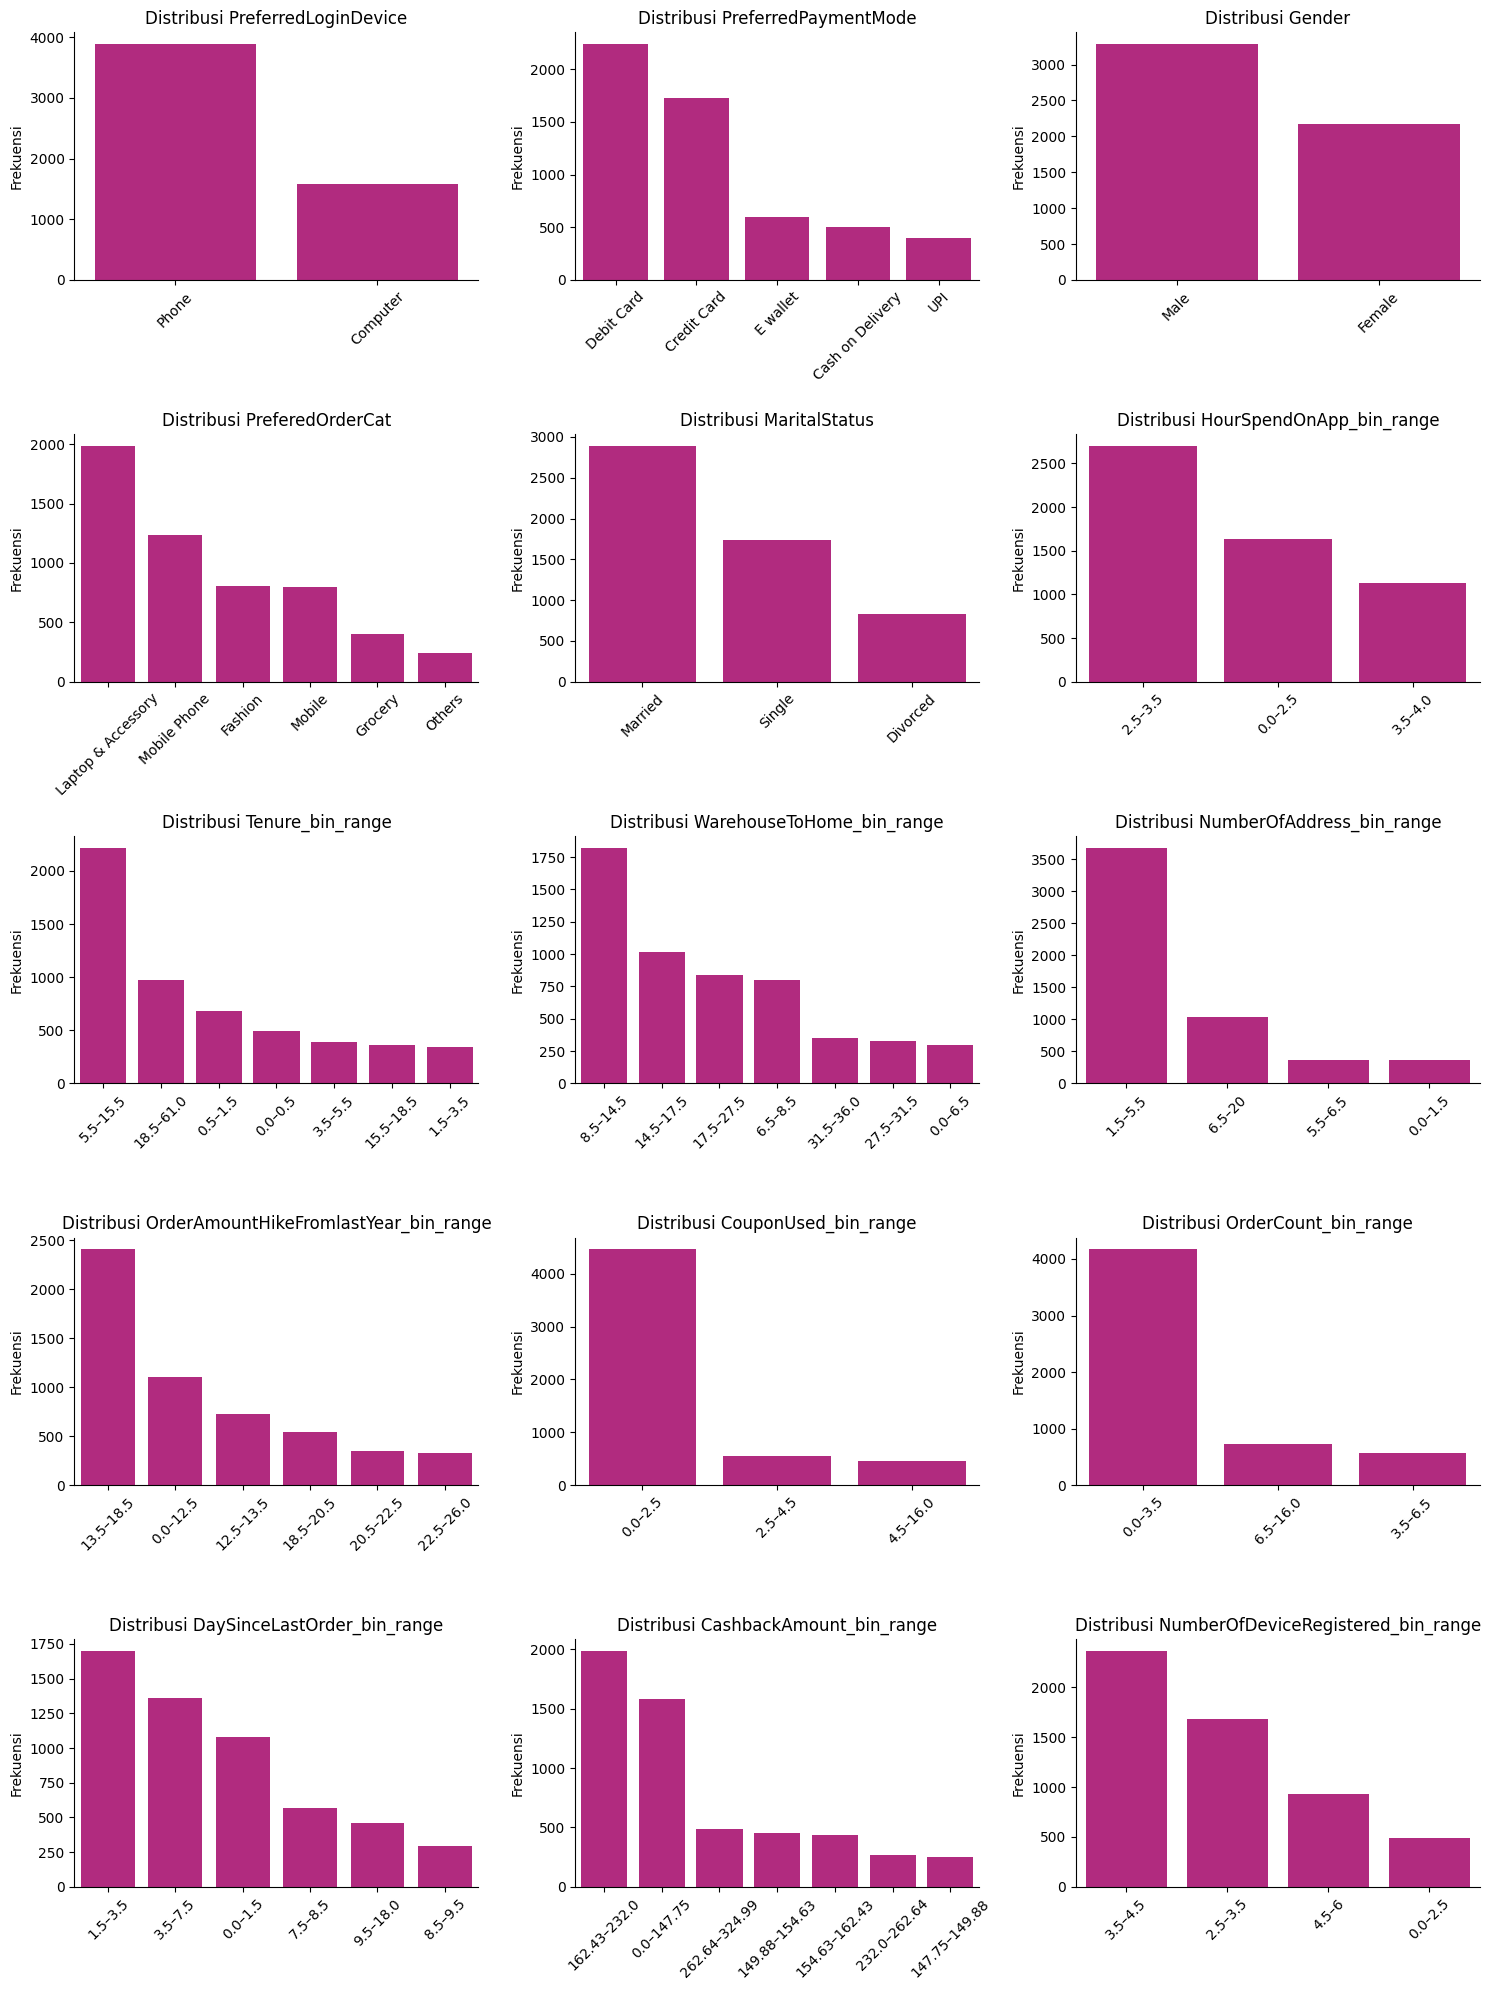

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical features
fitur_kategorik = df_edabin.drop(['Churn'], axis=1).select_dtypes(exclude='number').columns.tolist()

# Set number of subplots based on number of categorical features
n_cols = 3
n_rows = (len(fitur_kategorik) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust size as needed

# Loop through and plot each categorical feature
for i, col in enumerate(fitur_kategorik):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_edabin, x=col, color='mediumvioletred', order=df_edabin[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Frekuensi')
    sns.despine()

plt.tight_layout()
plt.show()


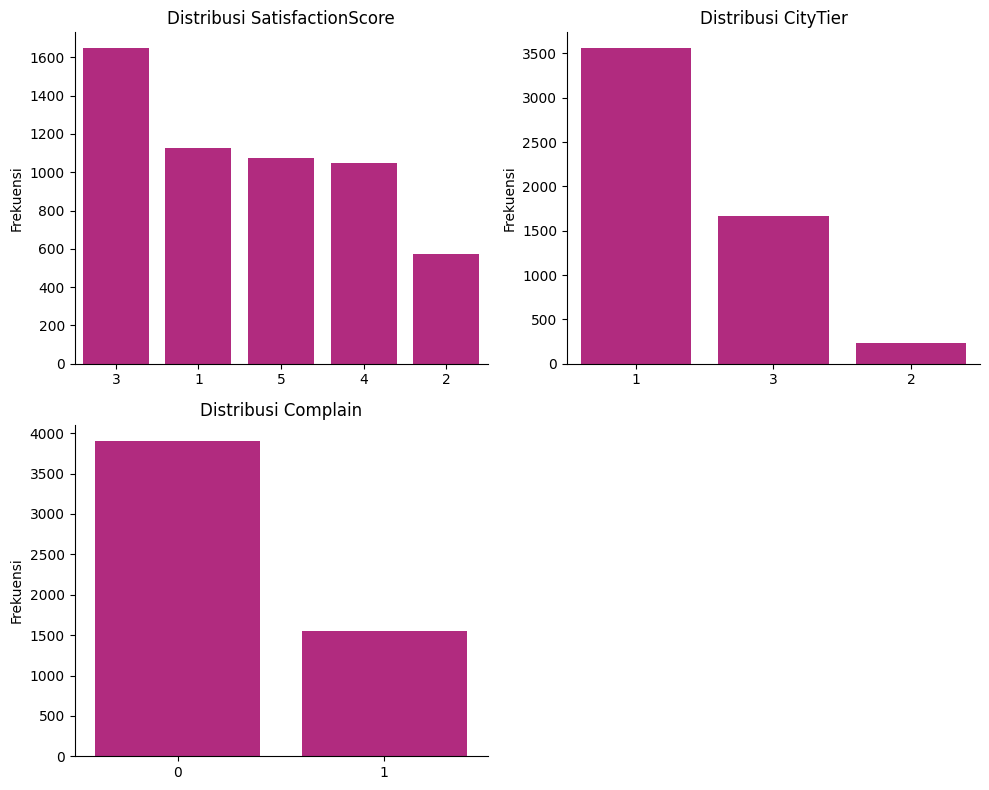

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define specific features to plot
selected_features = ['SatisfactionScore', 'CityTier', 'Complain']

# Set layout
n_cols = 2
n_rows = (len(selected_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through selected features
for i, col in enumerate(selected_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_edabin, x=col, color='mediumvioletred', order=df_edabin[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('Frekuensi')
    sns.despine()

plt.tight_layout()
plt.show()


**Hasil Temuan Proporsi Variable**

| Variable              | Dominan      |            |             |
| --------------------    | ------------ | ------------------ | -----------  |
| Tenure (bin)            | 5.5 - 15.5   |
| Gender                  | Male         |
| MartialStatus           | Married      |
| CashbackAmount (bin)    | 162.43 - 232 |
| CouponUsed (bin)        | 0 - 2.5      |
| OrderCount (bin)        | 0 - 3.5      |
| DaySinceLastOrder (bin) | 1.5 - 3.5    |
| Complain                | Tidak Complain|
| SatisfactionScore       | 3            |
| HourSpendOnApp (bin)    | 2.5 - 3.5    |
| PreferedOrderCat        | Laptop & Accessory|
| PreferredLoginDevice    | Mobile Phone |
| PreferredPaymentMode    | Debit Card   |
| CityTier                | 1            |
| NumberOfDeviceRegistered (bin) | 3.5 - 4.5            |
| WarehouseToHome (bin)    | 8.5 - 14.5    |
| NumberOfAddress (bin)    | 1.5 - 5.5   |
| OrderAmountHikeFromlastYear (bin) | Mobile Phone |

---

**Target variable vs Categorical variables Analysis**

Demographics

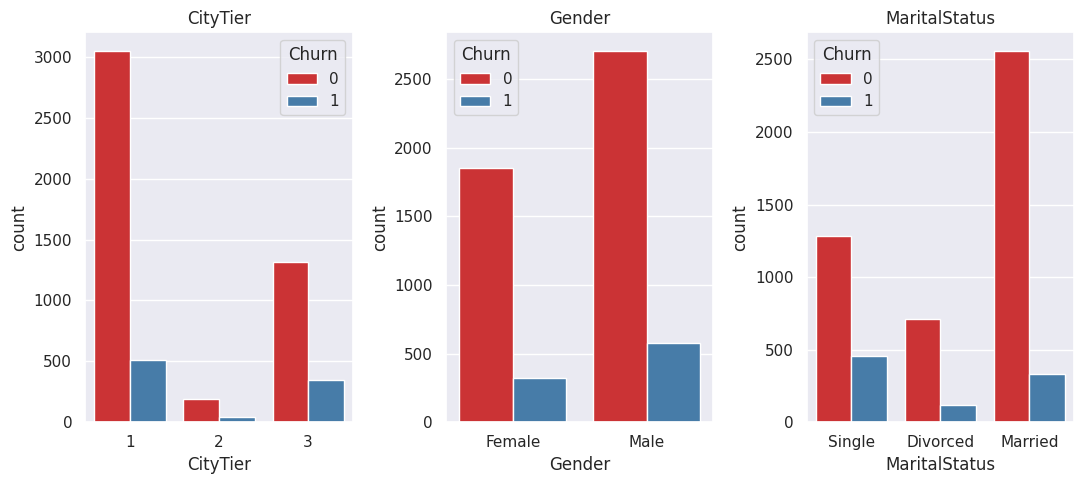

In [9]:
# Features to plot
features = ['CityTier', 'Gender', 'MaritalStatus']
plt.figure(figsize=(11, 5))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(1, 3, plotnumber)
    sns.countplot(x=feature, hue='Churn', data=df_edabin)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()

plt.show()

---

Consumer Activities towards E-Commerce

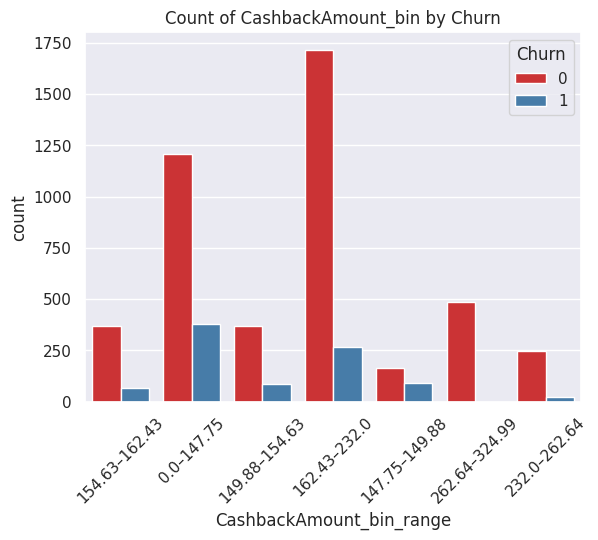

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(palette='Set1')
sns.countplot(data=df_edabin, x='CashbackAmount_bin_range', hue='Churn')
plt.xticks(rotation=45)
plt.title("Count of CashbackAmount_bin by Churn")
plt.show()

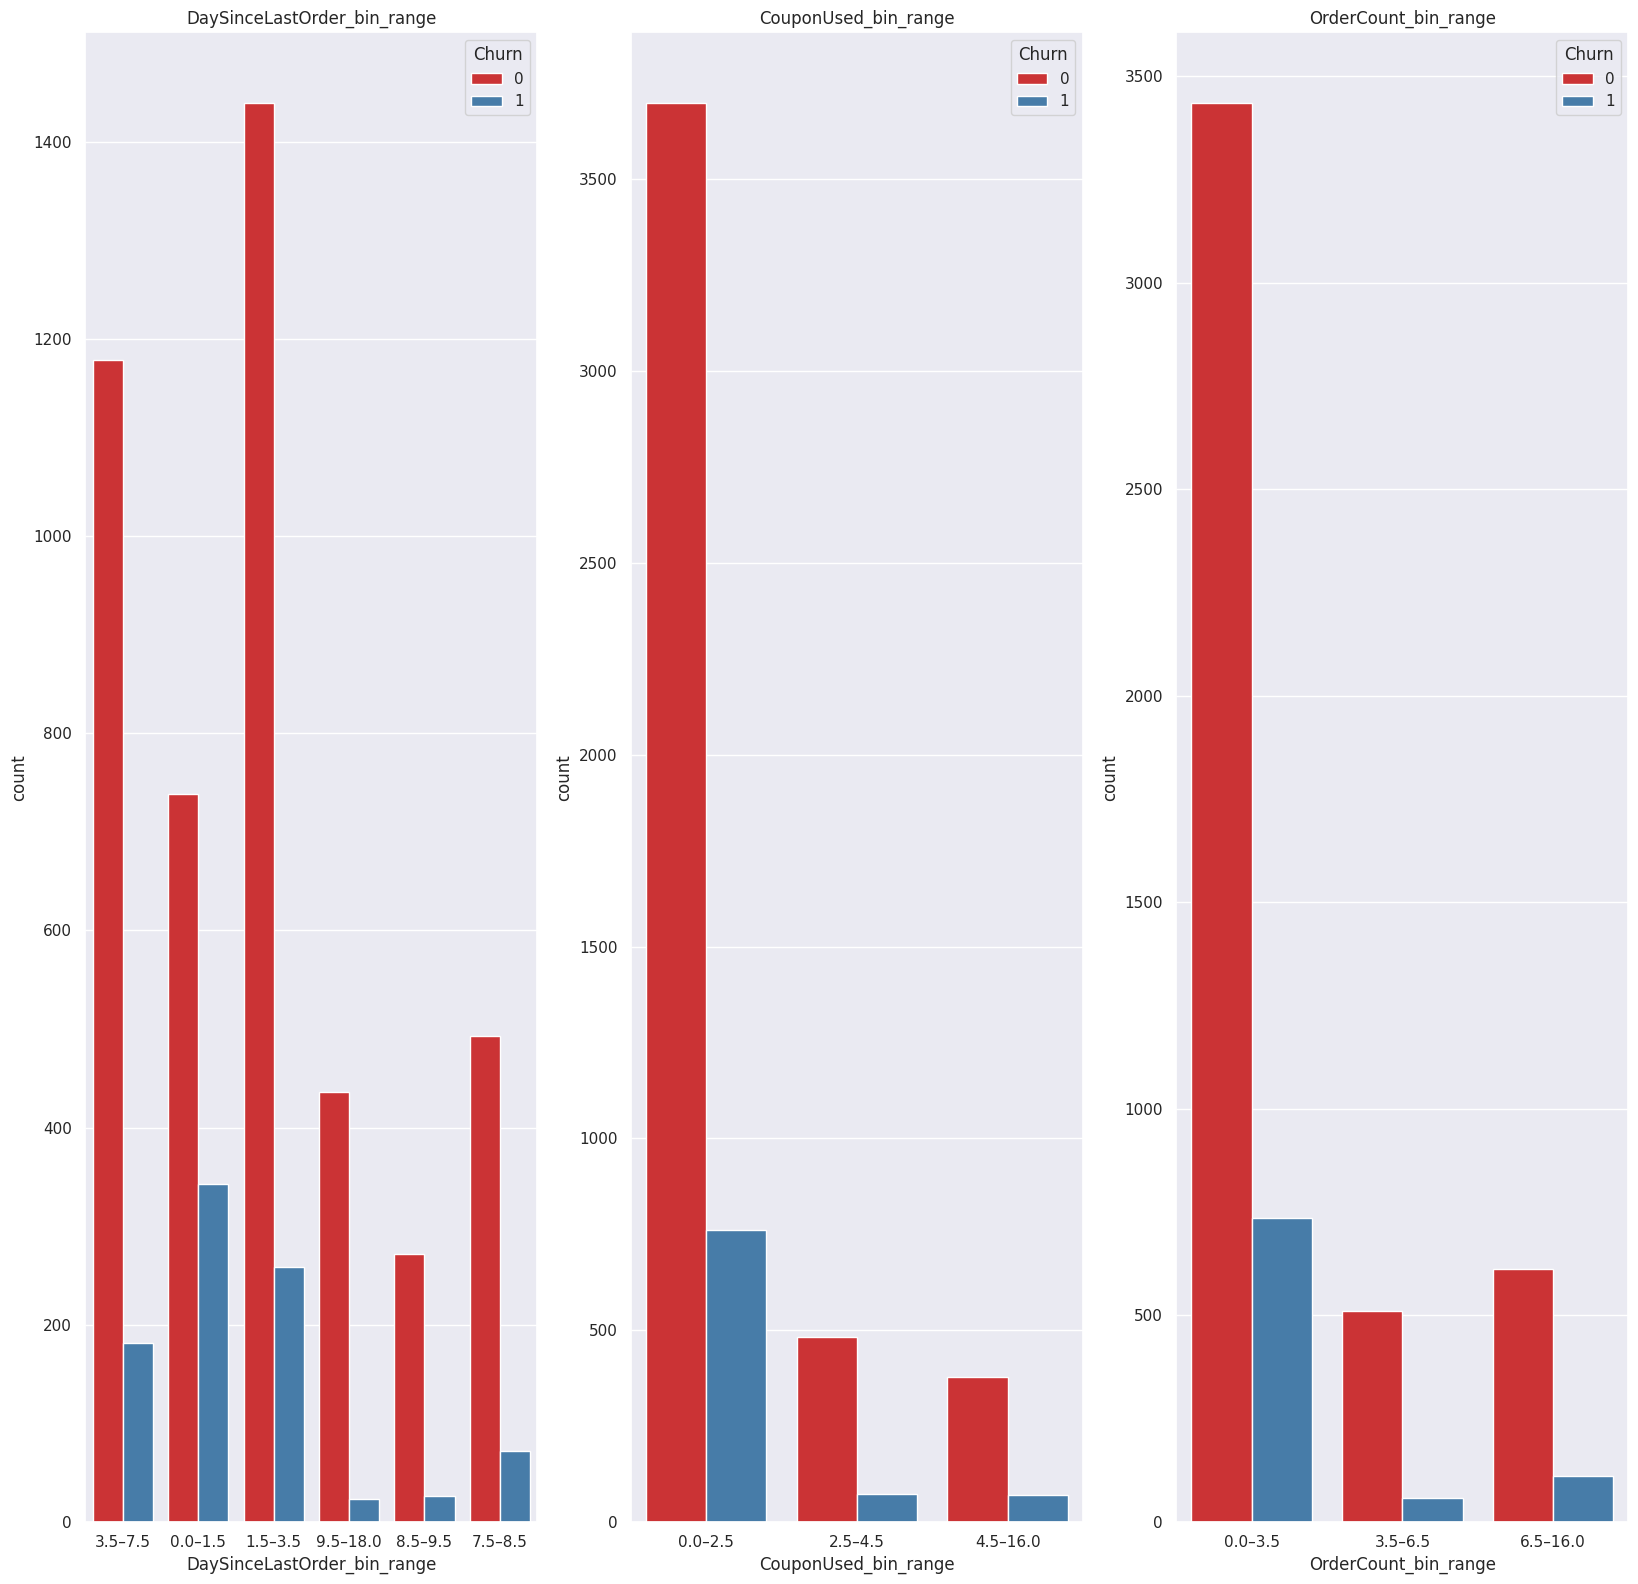

In [11]:
# Features to plot
features = ['DaySinceLastOrder_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range']
plt.figure(figsize=(22, 16))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(1, 4, plotnumber)
    sns.countplot(x=feature, hue='Churn', data=df_edabin)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()

plt.show()


---

Consumer Sentiment towards E-Commerce

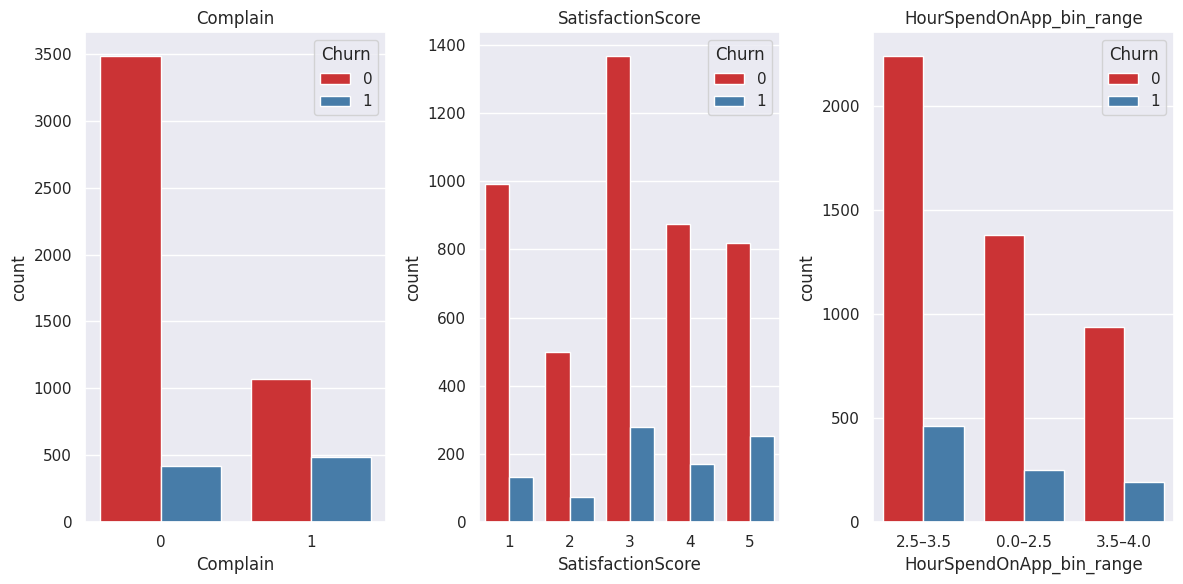

In [12]:
# Features to plot
features = ['Complain', 'SatisfactionScore', 'HourSpendOnApp_bin_range']
plt.figure(figsize=(12, 6))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(1, 3, plotnumber)
    sns.countplot(x=feature, hue='Churn', data=df_edabin)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()

plt.show()

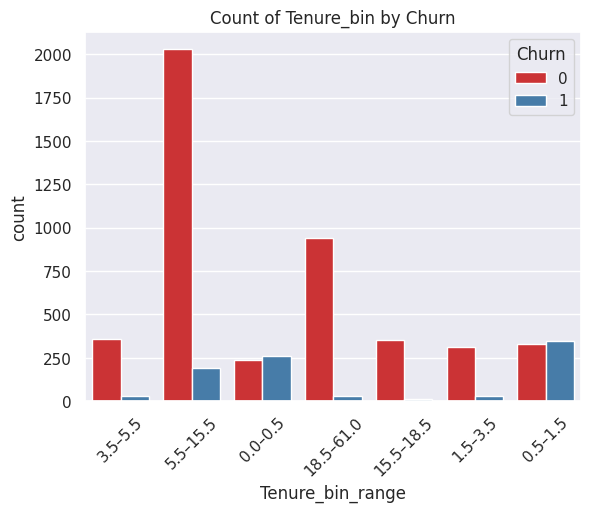

In [13]:
sns.set(palette='Set1')
sns.countplot(data=df_edabin, x='Tenure_bin_range', hue='Churn')
plt.xticks(rotation=45)
plt.title("Count of Tenure_bin by Churn")
plt.show()

---

Consumer Preferential

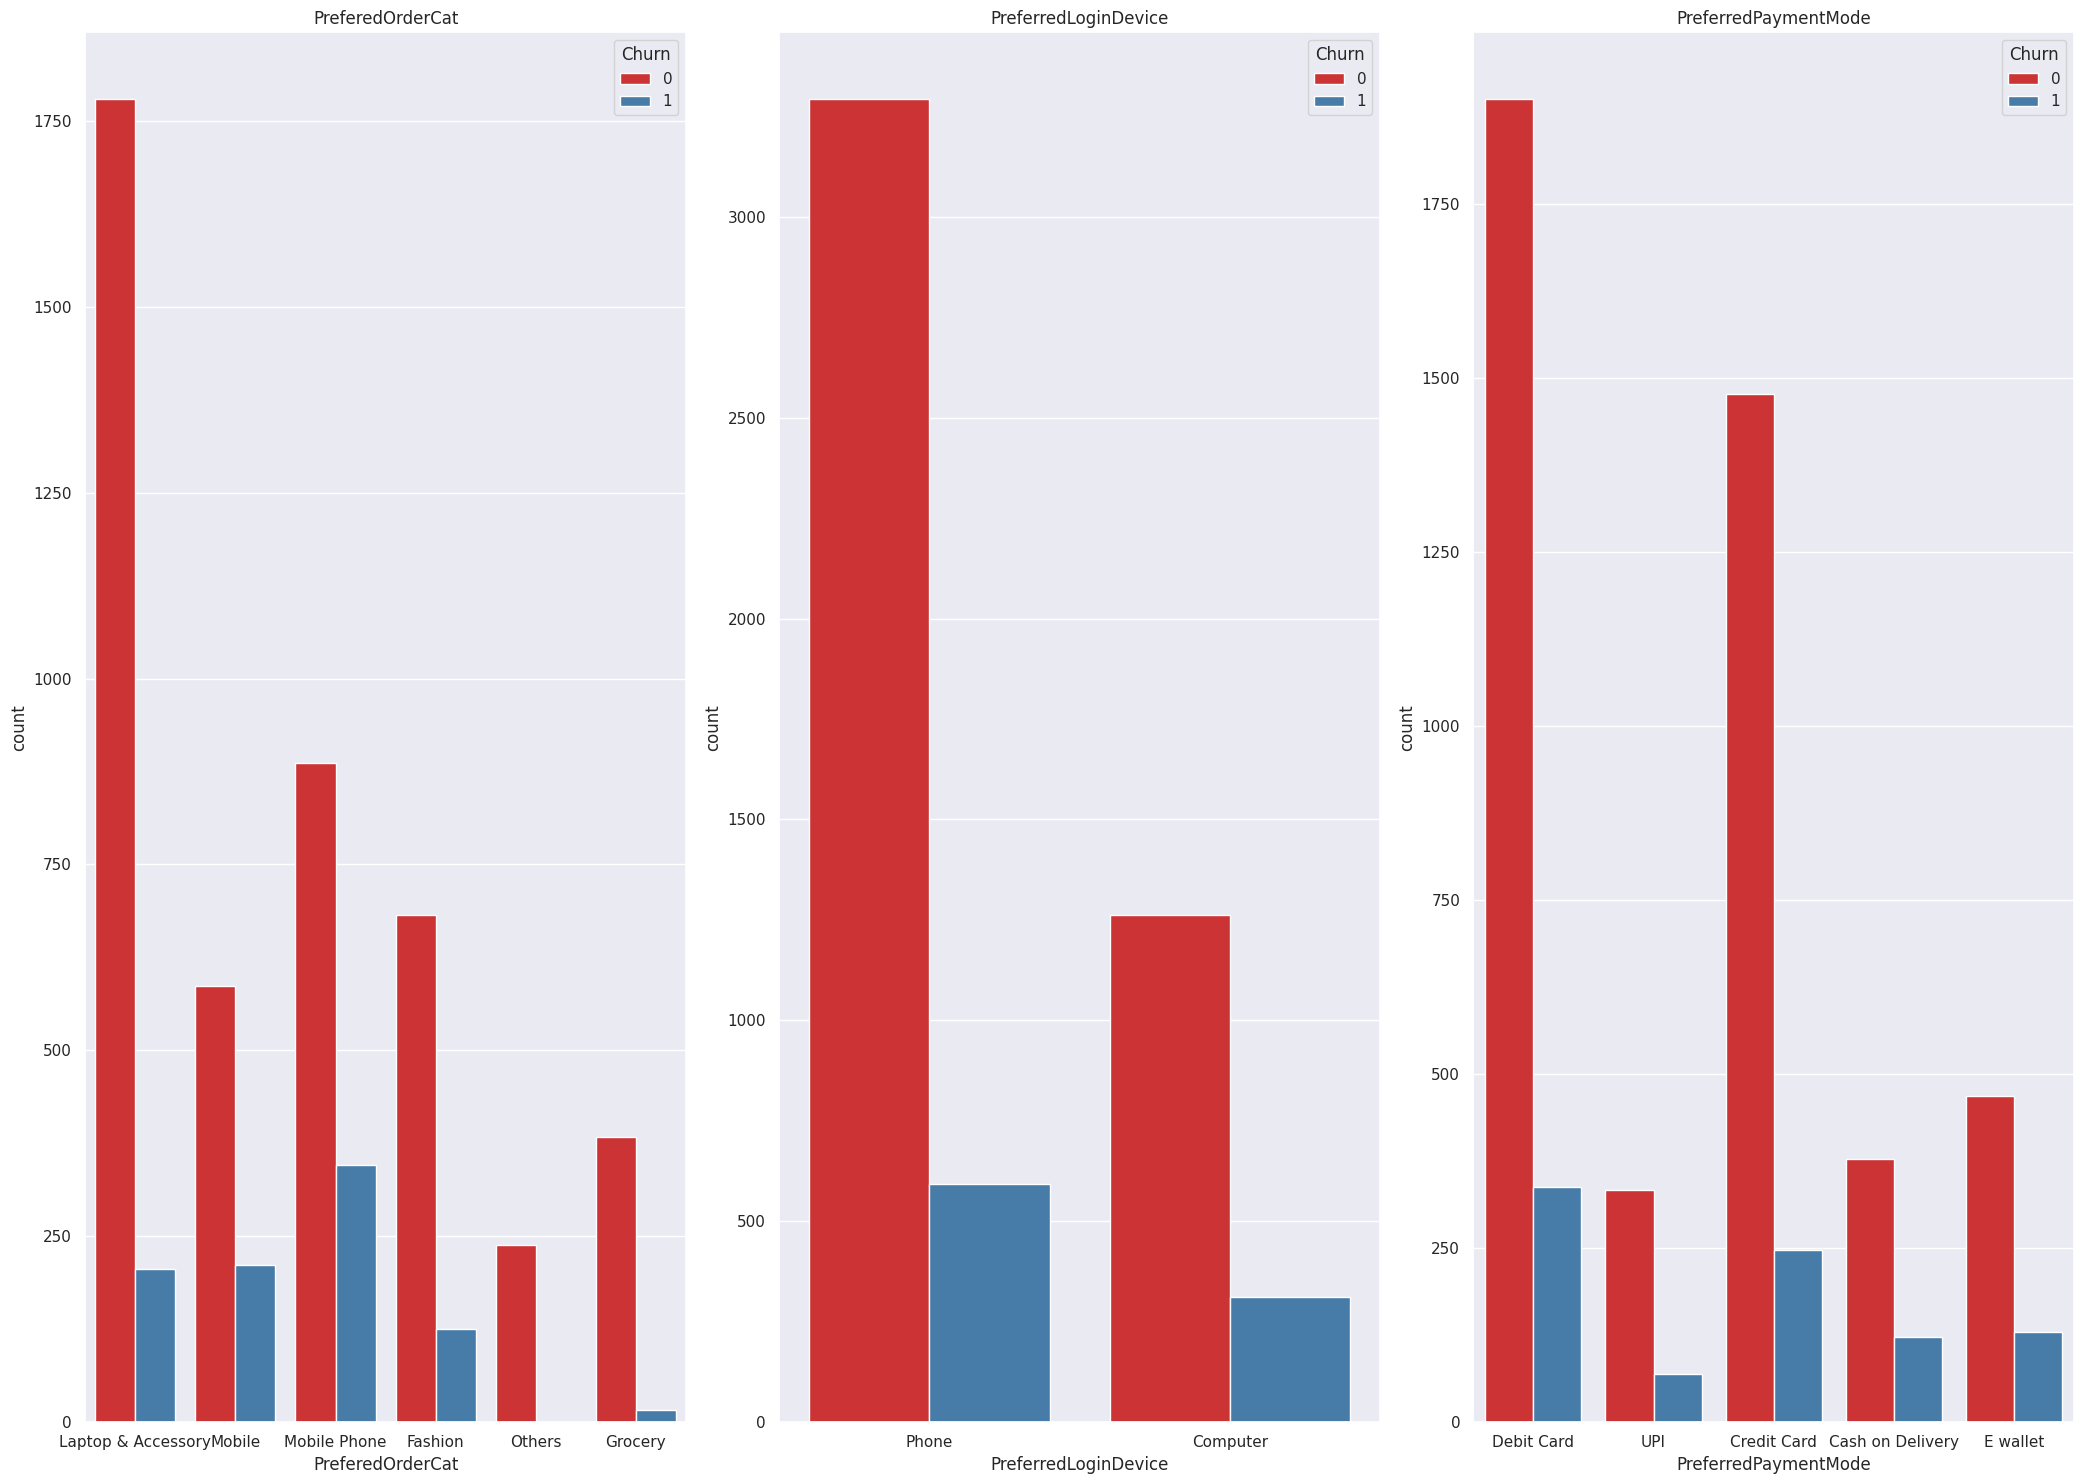

In [14]:
# Features to plot
features = ['PreferedOrderCat', 'PreferredLoginDevice', 'PreferredPaymentMode']
plt.figure(figsize=(21, 15))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(1, 3, plotnumber)
    sns.countplot(x=feature, hue='Churn', data=df_edabin)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()

plt.show()

Variable Lainnya

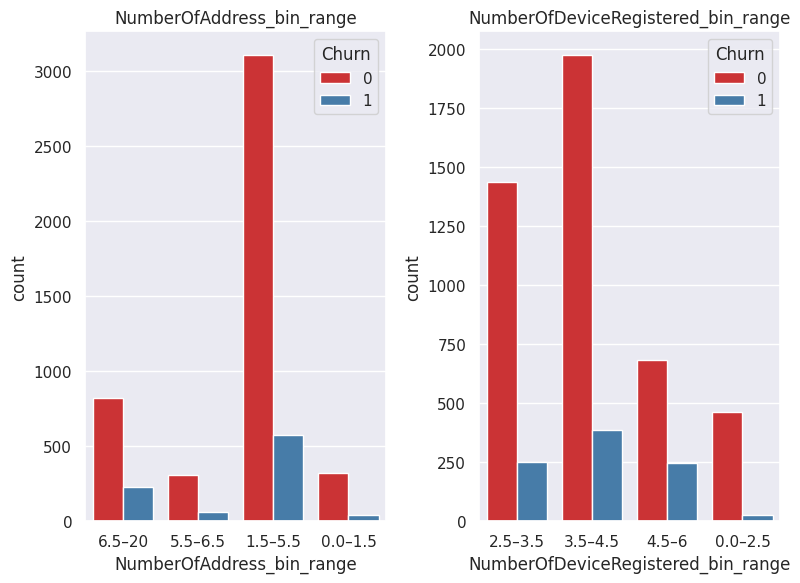

In [15]:
# Features to plot
features = ['NumberOfAddress_bin_range', 'NumberOfDeviceRegistered_bin_range']
plt.figure(figsize=(12, 6))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(1, 3, plotnumber)
    sns.countplot(x=feature, hue='Churn', data=df_edabin)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()

plt.show()

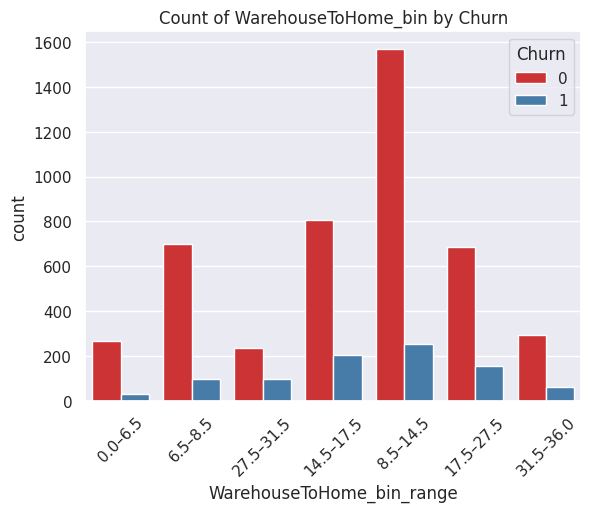

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(palette='Set1')
sns.countplot(data=df_edabin, x='WarehouseToHome_bin_range', hue='Churn')
plt.xticks(rotation=45)
plt.title("Count of WarehouseToHome_bin by Churn")
plt.show()

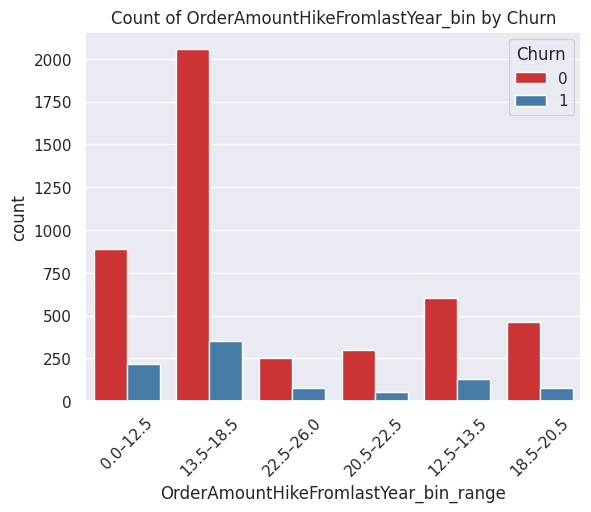

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(palette='Set1')
sns.countplot(data=df_edabin, x='OrderAmountHikeFromlastYear_bin_range', hue='Churn')
plt.xticks(rotation=45)
plt.title("Count of OrderAmountHikeFromlastYear_bin by Churn")
plt.show()

**Karakteristik Pelanggan terhadap Retensi E-Commerce ('Churn')**

Demographics:

| Variable                | Churn Value      |            |             |
| --------------------    | ------------ | ------------------ | -----------  |
| Gender                  | Male         |
| MartialStatus           | Single       |
| CityTier                | 1            |

---
Aktifitas Pelanggan Terhadap E-Commerce:

| Variable                | Churn Value      |            |             |
| --------------------    | ------------ | ------------------ | -----------  |
| CashbackAmount          | 0 - 147.75   |
| CouponUsed              | 0 - 2.5      |
| DaySinceLastOrder       | 0 - 1.5 hari |
| OrderCount              | 0 - 3.5      |

---
Rasa Sentimen Pelanggan:

| Variable                | Churn Value      |            |             |
| --------------------    | ------------ | ------------------ | -----------  |
| Complain                | 1 (komplain)    |
| SatisfactionScore       | 3               |
| HoursSpendOnApp         | 2.5 - 3.5 jam   |
| Tenure                  | 0.5 - 1.5 bulan |

---
Preference Pelanggan:

| Variable                | Churn Value      |            |             |
| --------------------    | ------------ | ------------------ | -----------  |
| PreferedOrderCat        | mobile phone |
| PreferredLoginDevice    | phone        |
| PreferredPaymentMode    | debit card   |

Variable Lainnya:

| Variable              | Dominan      |            |             |
| --------------------    | ------------ | ------------------ | -----------  |
| NumberOfDeviceRegistered (bin) | 3.5 - 4.5            |
| WarehouseToHome (bin)    | 8.5 - 14.5    |
| NumberOfAddress (bin)    | 1.5 - 5.5   |
| OrderAmountHikeFromlastYear (bin) | 13.5 - 18.5% |

**`Churned consumers characteristics`**
- Pelanggan pria yang *single* dan tinggal di kota tier1. Kota yang berada di tier 1 merupakan wilayah yang berkembang dan memiliki banyak opsi dalam membeli produk, di mana *pricing* pada kota tersebut memiliki karakteristik yang kompetitif. Berdasarkan data pelanggan yang *churned* dari *platform* di prediksi memiliki *buying power* yang sangatlah tinggi dengan memiliki pilihan (*repertoire*) yang sangat luas tanpa loyalitas kepada *brand* atau platform tertentu. Perilaku ini didukung dengan nilai *cashback* yang relatif banyak nilai maximumnya (0 - 147.75) dan nilai minimum yang sangat rendah, di mana mereka memiliki aktifitas yang cukup (*moderate*) di platform ini dengan jangkauan hari 0 - 1.5 dari terakhir kali mereka melakukan *order*. Sikap sentimental mereka terhadap *online platform* ini tidak memiliki indikasi yang kuat dikarenakan *satisfaction score* yang sedang (3) dan ajuan *complaint* dari mereka tidak menciptakan loyalitas terhadap *platform online* tersebut. Pelanggan yang berdomisili pada kota tier 1 ini lebih banyak mengorder produk *mobile phone*, dan *mobile phone* merupakan perangkat yang sering mereka gunakan untuk mengorder produk, selain itu menggunakan *debit card* sebagai metode mereka dalam melakukan *order*.

**`Interpretasi pertama: Variable CityTier diprediksi memiliki indikator yang kuat dalam mengevaluasi dan prediksi pelanggan yang churn terhadap e-commerce`**

---

**Apa saja karakteristik CityTier?**

Berdasarkan [Investopedia](https://www.investopedia.com/terms/r/real-estate-tier-classifications-tier-1-tier-2-and-tier-3.asp) *real estate market* membagikan jenis kota berdasarkan tiga tingkatan yaite tier 1, 2, dan 3. Tier 1 merupakan kota metropolitan, tier 2 memiliki peluang untuk investasi, tier 3 memiliki populasi yang relatif rendah dengan berkemungkinan untuk berkembang apabila adanya ruang untuk pengembangan.
- Kota pada tier 1 memiliki ciri khas pengembangan yang sangat pesat dengan sekolah, fasilitas, dan market bisnis yang sangat diminati.
- Kota pada tier 2 memiliki peluang investasi yang relatif tinggi, tetapi belum mencapai tingkatan yang *ideal*. Projeksi penetapan harga pada bisnis yang berada pada bagian kota ini bisa di bilang relatif terjangkau dengan berkemungkinan untuk terus naik.
- Kota pada tier 3 memiliki jumlah populasi yang rendah dengan tolak ukur kurang lebih satu juta penduduk. Penetapan harga jauh lebih rendah dibandingan *city tier* 1 dan 2. Namun adanya peluang untuk tetap berkembang apabila perusahaan terus menginvestasi bisnis mereka pada kota tersebut, sehingga dapat menciptakan fasilitas daerah yang terus berkembang dan menambahnya kapasitas lapangan pekerjaan.  

---

**Konfirmasi pola/karakteristik pelanggan terhadap churn**

In [18]:
kategori_vars = ['PreferredLoginDevice', 'Gender', 'CityTier', 'MaritalStatus', 'PreferredPaymentMode', 'PreferedOrderCat', 'SatisfactionScore', 'Complain', 'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range', 'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range', 'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range']

for var in kategori_vars:
    print(f"\nAverage Churn by {var}:")
    print(df_edabin.groupby(var)['Churn'].mean())


Average Churn by PreferredLoginDevice:
PreferredLoginDevice
Computer    0.197586
Phone       0.152778
Name: Churn, dtype: float64

Average Churn by Gender:
Gender
Female    0.149219
Male      0.176614
Name: Churn, dtype: float64

Average Churn by CityTier:
CityTier
1    0.143539
2    0.194915
3    0.208884
Name: Churn, dtype: float64

Average Churn by MaritalStatus:
MaritalStatus
Divorced    0.140964
Married     0.114839
Single      0.261918
Name: Churn, dtype: float64

Average Churn by PreferredPaymentMode:
PreferredPaymentMode
Cash on Delivery    0.244000
Credit Card         0.143355
Debit Card          0.150960
E wallet            0.216080
UPI                 0.171216
Name: Churn, dtype: float64

Average Churn by PreferedOrderCat:
PreferedOrderCat
Fashion               0.154895
Grocery               0.040000
Laptop & Accessory    0.103726
Mobile                0.265332
Mobile Phone          0.280844
Others                0.000000
Name: Churn, dtype: float64

Average Churn by Satisf

In [77]:
from google.colab import files
uploaded = files.upload()

Saving 1.png to 1.png


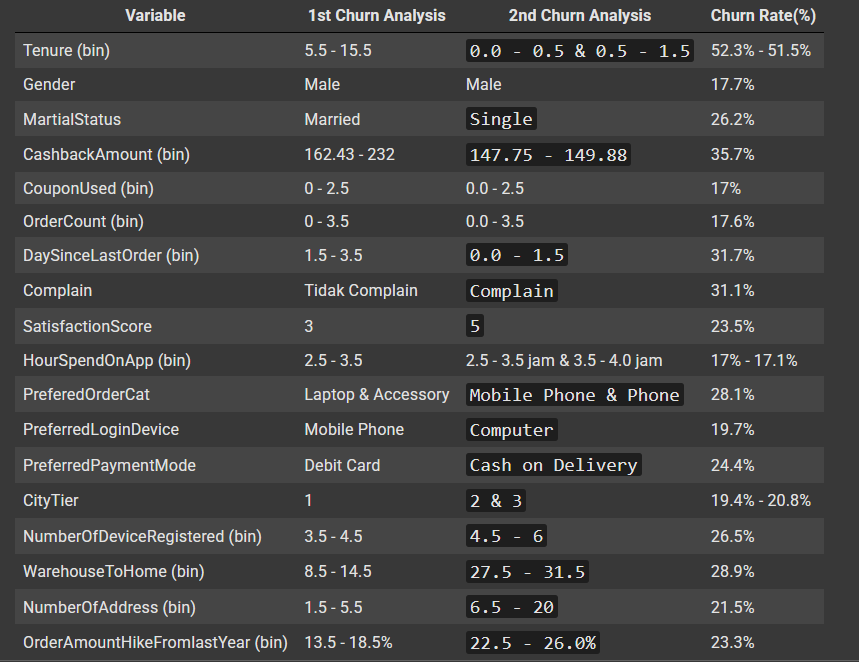

In [79]:
from IPython.display import Image
Image('Screenshot (804).png')

Berdasarkan analysis *variable* 'Churn' terhadap *variable* lain, interpretasi yang sebelumnya tidak lagi valid di karenakan banyaknya perbedaan dominan dari *unique values* di tiap *variable* seperti yang tercantum di table atas:
- **Interpretasi Pertama:** Apabila di asumsikan sebagai *pattern* yang terkait dengan *variable* 'CityTier', tier kota 2 dan 3 lebih rentan untuk *churn*. Di mana domisili yang berada pada tingkatan 2 dan 3 memiliki fasilitas yang lebih rendah di bandingkan tingkatan 1, sehingga penetapan harga produk tidak lah kompetitif. Dengan ini akan mengakibatkan pelanggan cendrung untuk tidak berpindah *platform* ataupun *outlet* yang tersedia. Sehingga `dengan sifat churn yang bercondong kepada city tier 2 dan 3, ini tidak merepresentasikan sifat pelanggan pada tingkatan kota ini.`
- **Interpretasi Kedua:** Perspektif lain yang dapat di interpretasikan melalui penemuan ini adalah `variable yang memiliki churn rate tinggi (terutama kepada churn rate di atas 25%) dan bersifat discrete, berpotensi memiliki feature importance yang tinggi terhadap churn yaitu 'Tenure', 'CashbackAmount', 'DaySinceLastOrder', 'WarehouseToHome', dan 'Complain'.`


<Axes: xlabel='SatisfactionScore', ylabel='Churn'>

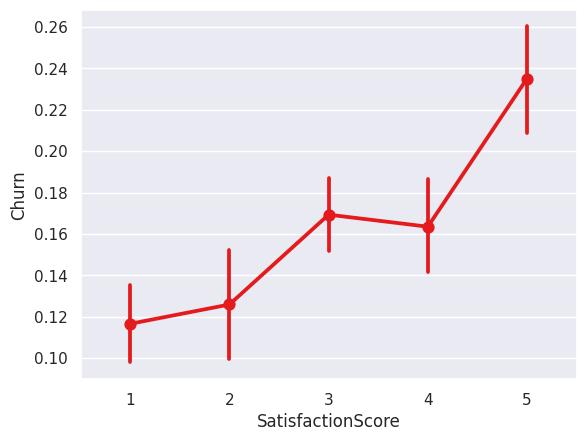

In [19]:
sns.pointplot(data=df_edabin, x='SatisfactionScore', y='Churn')

- **Interpretasi Ketiga:** Penemuan yang menarik juga di temukan kepada *variable* 'SatisfactionScore'. Di mana `terlihat dari line plot terlihat variable 'SatisfactionScore' tersebut bersifat terbalik.` Ada dua kemungkinan di mana ini kesalahan labeling sebelum *data entry* atau ini merupakan metode *reverse coding*. Menurut [insidercx](https://www.insidercx.com/knowledge-base-article/reverse-coding-in-survey-design) ini merupakan metode yang sering di implementasikan survei, terutama dalam menggunakan *likert scale*. Metode ini digunakan untuk mengurangi *bias* dalam survei dan menekankan perhatian yang cukup tinggi terhadap responden.

---
## **4.2. Feature Analysis Towards 'Churn'**


Asumsi Future Importance:
- 'Tenure'
- 'CashbackAmount',
- 'DaySinceLastOrder'
- 'Complain'
- 'WarehouseToHome'

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


---

**Visualisasi pola variable non-binary & binary terhadap Churn**

Bar-Plot:

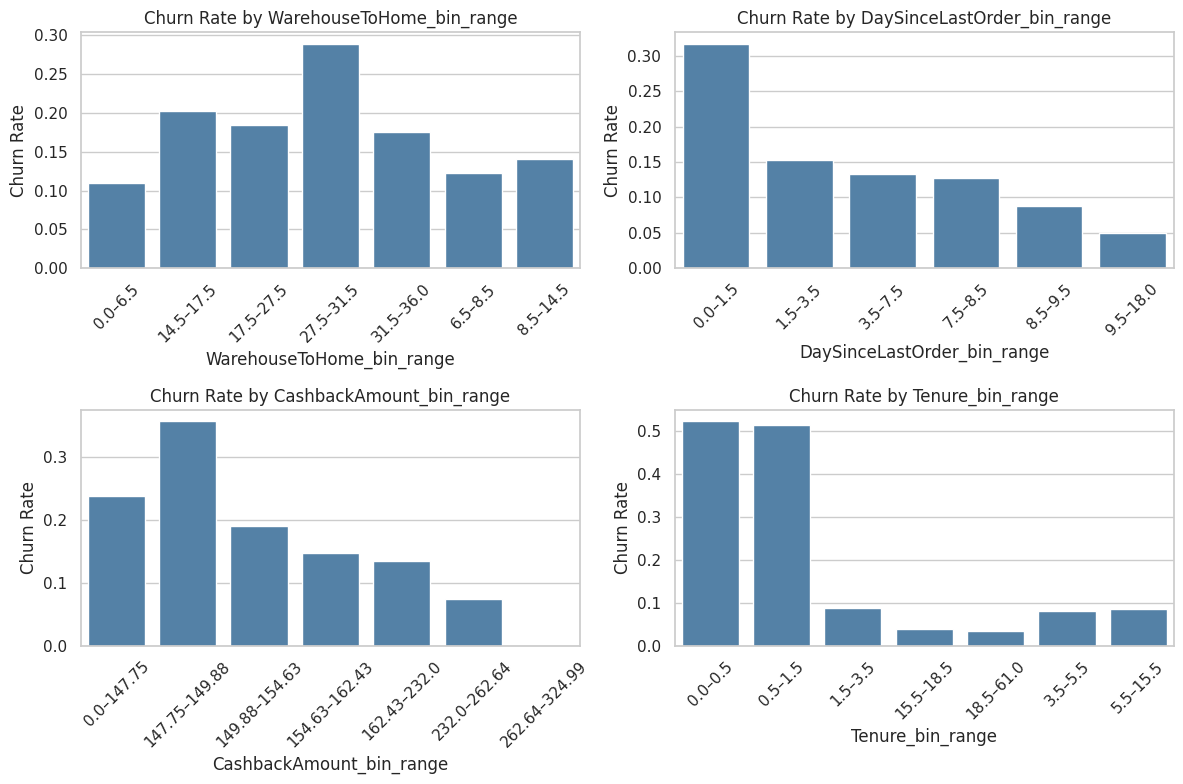

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of binned columns
binned_columns = ['WarehouseToHome_bin_range', 'DaySinceLastOrder_bin_range', 'CashbackAmount_bin_range', 'Tenure_bin_range']
target_col = 'Churn'

# Setting subplots
n_cols = 2
n_rows = (len(binned_columns) + 1) // n_cols
plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(binned_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    # Compute churn rate per bin
    churn_rate = df_edabin.groupby(col)[target_col].mean().reset_index()

    # If interval, sort by left edge
    if pd.api.types.is_interval_dtype(df_edabin[col]):
        churn_rate = churn_rate.sort_values(by=col)
        churn_rate[col] = churn_rate[col].astype(str)
        ordered_categories = churn_rate[col]
    else:
        churn_rate[col] = churn_rate[col].astype(str)
        ordered_categories = sorted(churn_rate[col].unique())

    sns.barplot(x=col, y=target_col, data=churn_rate, color='steelblue',
                order=ordered_categories)

    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**DaySinceLastOrder**
- Berdasarkan *bar plot* terlihat pada *variable* ini bahwa adanya pola di mana semakin tinggi hari di mana dari terakhir kalinya pelanggan melakukan *order*, semakin kecil kemungkinan pelanggan *churn* dari *e-commerce*. Dan *churn rate* terrendah terdapat pada jarak 9.5 - 18 hari. `Pola ini sangatlah bertolak belakang, di mana ekspektasi perusahaan terhadap pelanggan yang sudah pasif dalam pemesanan produk akan berresiko untuk meninggalkan platform.` Penjelasan lain atas perilaku ini berkemungkinan adanya sifat ketidakpuasan pelanggan di awal hari sejak mereka melakukan *order* pada *e-commerce*. `Ini bisa di sebabkan oleh layanan e-commerce yang kurang memuaskan, yang sebaliknya pelanggan yang sudah lama tidak melakukan order berkemungkinan akan kembali melakukan pembelian.`
- Implikasi Bisnis: Perusahaan perlu melihat apakah harus adanya insentif promosi dalam pembelian pertama oleh pelanggan, atau tawaran produk berupa *bundle*.

**CashbackAmount**
- Pola pada *variable* ini menunjukkan bahwa semakin besar jumlah *cashback* yang di miliki oleh pelanggan, semakin kecil kemungkinan mereka untuk melakukan *churn*. Dan jarak *cashback* antara angka 262.64 - 324.99 tidak atau hampir tidak memiliki *churn rate*. `Jumlah cashback tinggi dapat memberikan insentif kepada pelanggan untuk kembali melakukan pembelian, sebaliknya churn rate yang tertinggi dan kedua tertinggi lebih banyak terlihat pada jumlah cashback yang rendah.`  
- Implikasi Bisnis: Perusahaan bisa berfokus kepada pelanggan yang memiliki *cashback* dalam *threshold* di bawah 150, di mana pelanggan pada batasan *cashback* tersebut dapat memperoleh *bonus cashback* yang bersifat bertingkat. Dengan contoh pelanggan yang memiliki jumla jarak *cashback* 50 - 100 mendapatkan *cashback* lebih.

**Tenure**
- Pola pada variable ini mengindikasikan di mana semakin lama pelanggan menetap kepada *platform e-commerce*, semakin sedikit resiko mereka untuk *churn*. Pola ini menunjukkan bahwa retensi pelanggan tetap menjadi *target e-commerce*. `Pola Ini sangatlah krusial berdasarkan jatuhnya churn yang drastis pada jarak tenure 1.5 - 3.5.` Sedangkan pola terrendah pada *churn rate* muncul pada jarak *tenure* 15.5 - 61 hari.    
- Implikasi Bisnis: Keterlibatan pelanggan di awal fase interaksi mereka terhadap *e-commerce* memiliki kepentingan yang sangat tinggi. Untuk mencapai tujuan ini, perusahaan dapat mengutamakan kenyamanan pelanggan saat mereka berinteraksi dengan *user-interface app* atau situs *e-commerce*. Di mana kemudahan dalam menelusuri pembelian produk dan memberikan keamanan dalam metode pembayaran.

**WarehouseToHome**
- Pola pada *variable* ini mengindikasikan adanya hubungan di mana semakin naik jarak dari *warehouse* ke lokasi pelanggan semakin rentan mereka untuk *churn*. `Dan terlihat ada anomali pada jarak data 14.5 - 17.5, dan ini mengindikasikan jarak di mana pelanggan mulai churn dari e-commerce.`
- Implikasi Bisnis: Menangani permasalahan jarak merupakan fokus yang di perlukan dalam *e-commerce*, di mana fase pengiriman barang merupakan tahap transaksi yang krusial. Berdasarkan jauh atau dekatnya jarak dapat berdampak negatif maupun positif terhadap bisnis. *E-commerce* bisa menangani permasalahan ini dengan *update* yang transparan selama pengiriman barang, dan adanya jaminan kompensasi yang menguntungkan bagi pelanggan. Asuransi kurir dengan harga yang terjangkau bisa mengatasi kesenjangan pelanggan terhadap jarak.  

---

Horizontal Box-Plot:

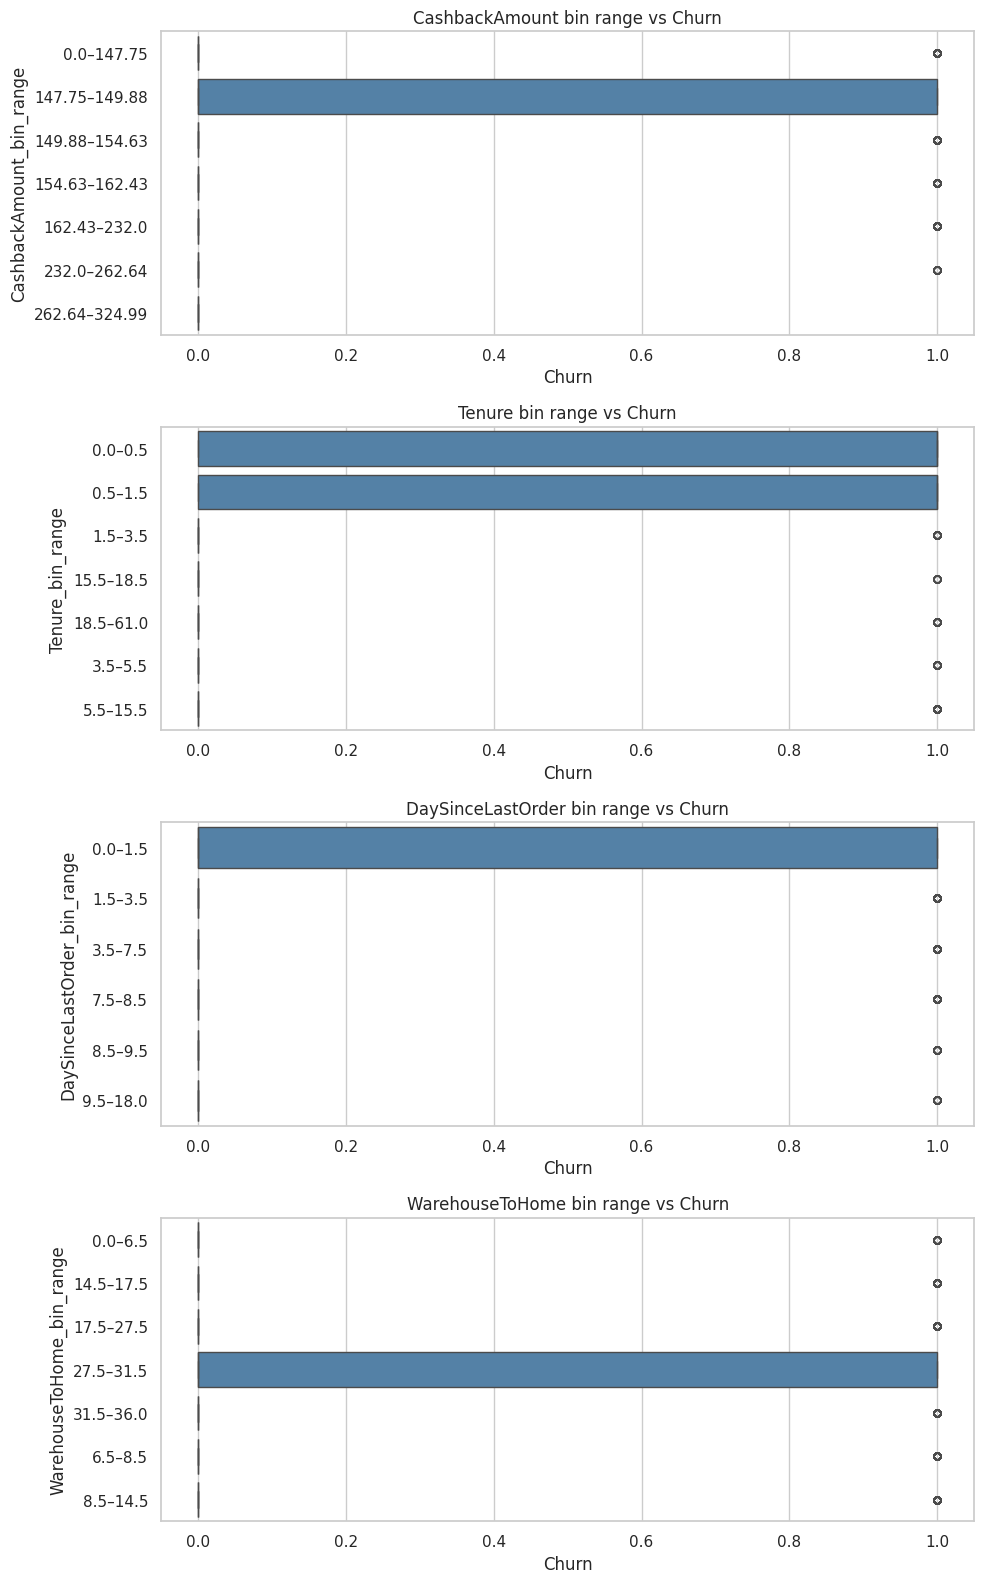

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of your binned variables (use the actual column names from your dataframe)
binned_columns = ['CashbackAmount_bin_range', 'Tenure_bin_range', 'DaySinceLastOrder_bin_range', 'WarehouseToHome_bin_range']
target_col = 'Churn'

# Set up subplots
n_cols = 1
n_rows = len(binned_columns)
plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(binned_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    # If the column is Interval type, get the sorted string representations
    if pd.api.types.is_interval_dtype(df_edabin[col]):
        sorted_bins = sorted(df_edabin[col].unique())  # sort intervals numerically
        bin_strs = [str(b) for b in sorted_bins]  # convert to strings
        df_edabin[f'{col}_str'] = df_edabin[col].astype(str)
        df_edabin[f'{col}_str'] = pd.Categorical(
            df_edabin[f'{col}_str'],
            categories=bin_strs,
            ordered=True
        )
        plot_col = f'{col}_str'
    else:
        # if already strings (not intervals), sort manually if needed
        df_edabin[col] = pd.Categorical(df_edabin[col], ordered=True)
        plot_col = col

    sns.boxplot(
        y=plot_col,
        x=target_col,
        data=df_edabin,
        orient='h',
        color='steelblue',
        fliersize=5
    )

    plt.title(f'{col.replace("_", " ")} vs {target_col}')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- **'CashbackAmount'**: Seperti *Bar-Plot*, terlihat pola di mana tingkatan *cashback* mempengaruhi perilaku *churn* pelanggan. *Plot* ini memperjelas secara signifikan jarak *cashback* antara 147.75 - 149.88 lebih berdampak krusial di bandingkan jarak *cashback* lainnya, termasuk jarak antara 0 - 147.75 yang terlihat menyaingi jarak *cashback* 147 - 149.88 melalui *bar-plot* biasa. Angka *cashback* di atas 262.64 merupakan tolak ukur aman terhadap pelanggan yang *churn*.

- **'Tenure'**: Jarak bulan di mana pelanggan tetap berlangganan kepada e-commerce antara 0 - 1.5 bulan memiliki pola yang sangat berrisiko berhenti menggunakan platform e-commerce. Dengan ini e-commerce memiliki jangka waktu yang sangat singkat untuk membangun daya tarik terhadap pelanggan. Walaupun waktu tenure di atas 1 hari memiliki risiko *churn* yang rendah, kenyataannya peluang untuk *churn* tetaplah ada.

- **'DaySinceLastOrder'**: Menurut horizontal box-plot 'DaySinceLastOrder', tidak mencapai kurun waktu 2 hari sejak pelanggan melakukan order memiliki risiko *churn* yang sangat besar. Selain itu risiko *churn* tetaplah ada, meskipun risiko itu sangat rendah di bandingkan jangka waktu 0 - 1.5.

- **'WarehouseToHome'**: Menurut horizontal box-plot variable, jarak 27.5 - 31.5 memiliki tingkat signifikan yang tinggi di bandingkan jarak yang lain. Walaupun di seluruh jarak dari variable memiliki kemungkinan untuk *churn*, tetapi tidak terlalu signifikan.

---

Histogram:

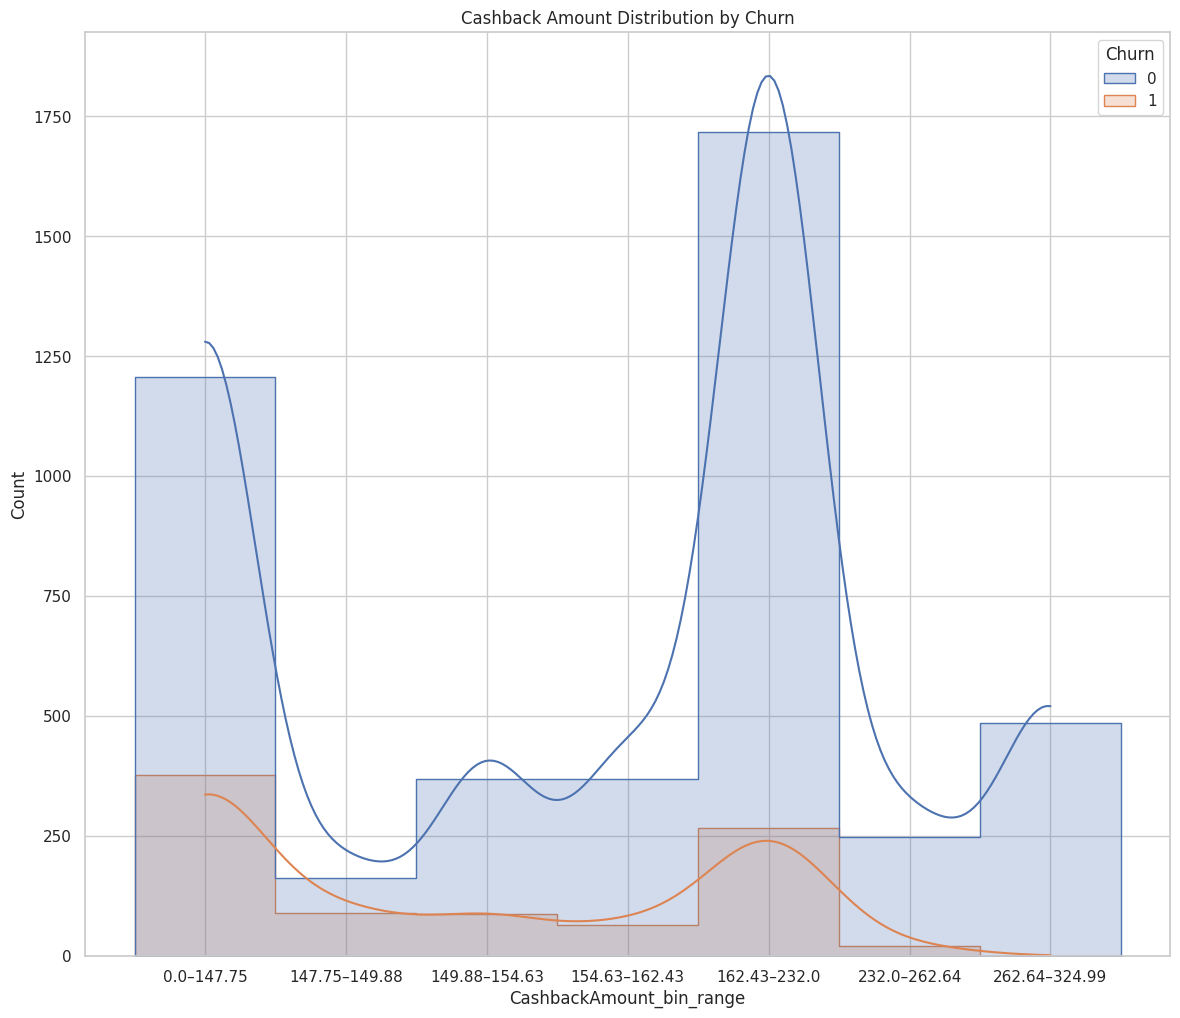

In [23]:
# CashbackAmount histogram
plt.figure(figsize=(14, 12))
sns.histplot(data=df_edabin, x='CashbackAmount_bin_range', hue='Churn', bins=30, kde=True, element='step')
plt.title('Cashback Amount Distribution by Churn')
plt.show()

'Cashbackamount'
- Pelanggan yang *churn* dan tidak *churn* memiliki *density shape* yang mirip, dalam arti keduanya memiliki bentuk titik puncak *cashback* yang sama.
- Walaupun bentuk *trend* pelanggan *churn* dan tidak churn mirip, jarak *cashback* 0 - 147.75 merupakan kumpulan berkluster tinggi bagi pelanggan yang *churn* akan tetapi jarak *cashback* 162.43 - 232 kumpulan berkluster tinggi pagi pelanggan yang tidak *churn*.
- Terdeteksi bentuk tren dari pelanggan yang churn menurun seiring tambahnya jumlah *cashback*. Tetapi lekukan dari jarak 162.43 - 232 kepada pelanggan yang *churn* memiliki curva yang cukup besar.

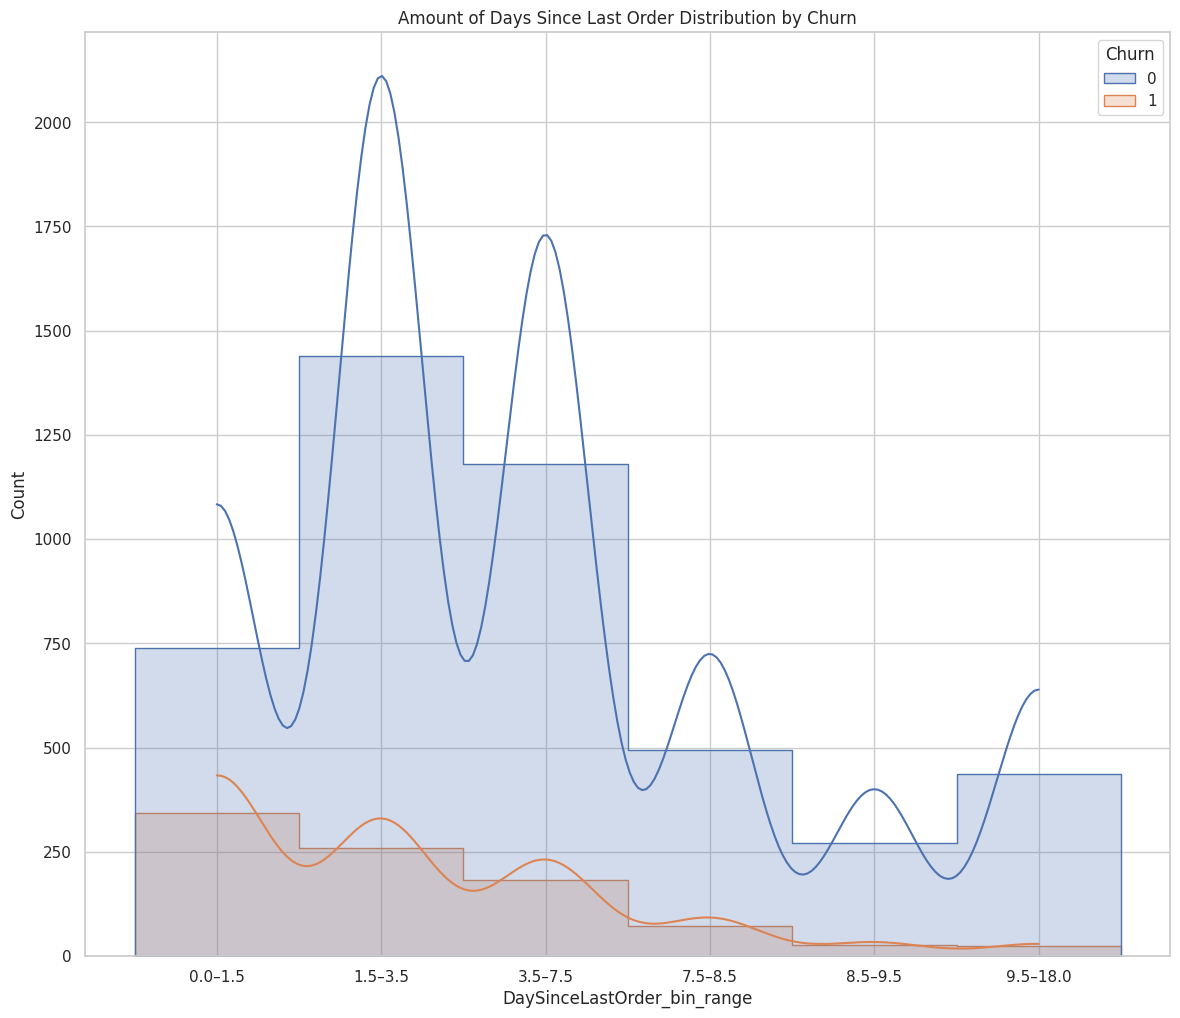

In [24]:
# CashbackAmount histogram
plt.figure(figsize=(14, 12))
sns.histplot(data=df_edabin, x='DaySinceLastOrder_bin_range', hue='Churn', bins=30, kde=True, element='step')
plt.title('Amount of Days Since Last Order Distribution by Churn')
plt.show()

'DaySinceLastOrder'
- Pola dari pelanggan yang *churn* dan tidak *churn* berdasarkan hari sejak pelanggan melakukan order terakhir menunjukkan tren menurun.
- Di bawah 8 hari merupakan letak densitas terberat untuk kedua jenis *churn*.
- *Variable* 'DaySinceLastOrder' terlihat tidak memiliki implikasi yang besar terhadap *churn*, di karenakan kesamaan bentuk dari dua jenis *churn* di atas.

In [25]:
print(df_edabin['Tenure_bin_range'].unique())

['3.5–5.5', '5.5–15.5', '0.0–0.5', '18.5–61.0', '15.5–18.5', '1.5–3.5', '0.5–1.5']
Categories (7, object): ['0.0–0.5' < '0.5–1.5' < '1.5–3.5' < '15.5–18.5' < '18.5–61.0' < '3.5–5.5' <
                         '5.5–15.5']


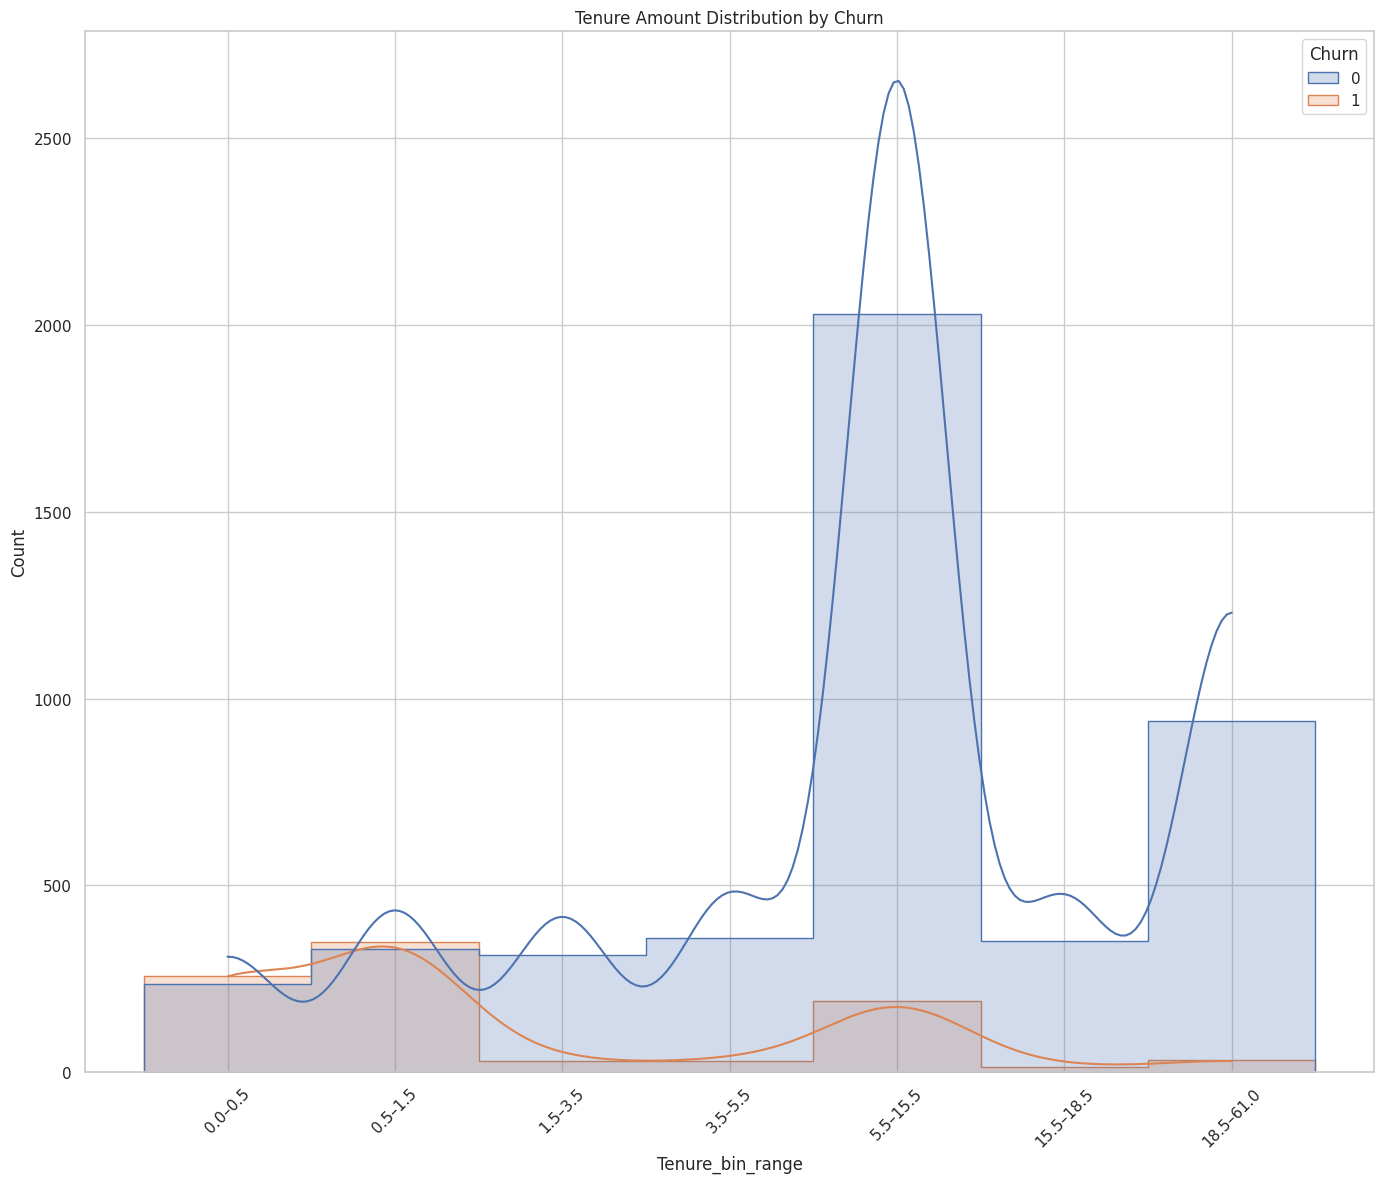

In [26]:
# Define the correct order of bins as strings (must match your data)
ordered_tenurebins = [
    '0.0–0.5', '0.5–1.5', '1.5–3.5', '3.5–5.5', '5.5–15.5',
    '15.5–18.5', '18.5–61.0'
]

# Convert the column to categorical with ordering
df_edabin['Tenure_bin_range'] = pd.Categorical(
    df_edabin['Tenure_bin_range'],
    categories=ordered_tenurebins,
    ordered=True
)

# Plot after setting the order
plt.figure(figsize=(14, 12))
sns.histplot(data=df_edabin, x='Tenure_bin_range', hue='Churn', kde=True, element='step')
plt.title('Tenure Amount Distribution by Churn')
plt.xlabel('Tenure_bin_range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Optional: rotate for readability
plt.tight_layout()
plt.show()

'Tenure'
- Pola pelanggan yang melakukan *churn* mengalami penurunan dengan bertambahnya waktu *Tenure*, dan cendrung menunjukkan sifat *'early trial'* terhadap pelanggan di mana ini merupakan praktik bisnis yang umum yang berupa tawaran subscription gratis di bulan pertama.
- Pelanggan yang tidak *churn* memiliki titik puncak yang tajam pada jarak waktu *tenure* 5.5 - 15.5, dan bisa untuk menjadikan dasar target waktu *tenure* terhadap pelanggan baru.  

In [27]:
print(df_edabin['WarehouseToHome_bin_range'].unique())

['0.0–6.5', '6.5–8.5', '27.5–31.5', '14.5–17.5', '8.5–14.5', '17.5–27.5', '31.5–36.0']
Categories (7, object): ['0.0–6.5' < '14.5–17.5' < '17.5–27.5' < '27.5–31.5' < '31.5–36.0' < '6.5–8.5' <
                         '8.5–14.5']


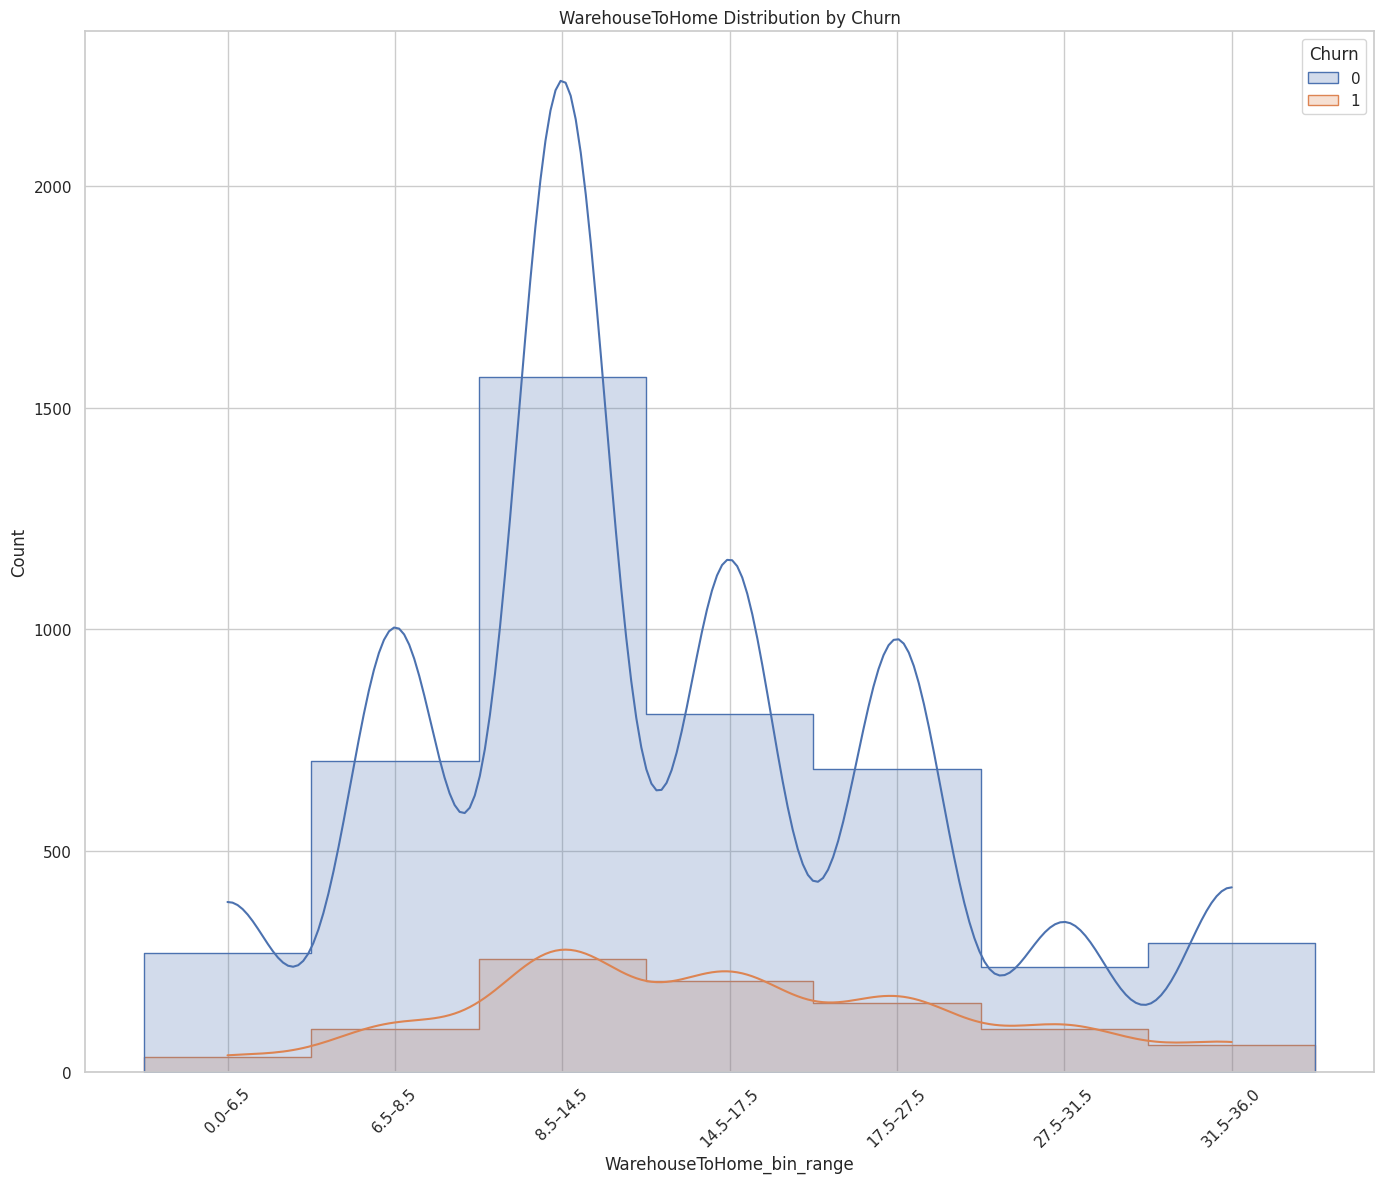

In [28]:
# Define the correct order of bins as strings (must match your data)
ordered_warehousebins = [
    '0.0–6.5', '6.5–8.5', '8.5–14.5', '14.5–17.5', '17.5–27.5',
    '27.5–31.5', '31.5–36.0'
]

# Convert the column to categorical with ordering
df_edabin['WarehouseToHome_bin_range'] = pd.Categorical(
    df_edabin['WarehouseToHome_bin_range'],
    categories=ordered_warehousebins,
    ordered=True
)

# Plot after setting the order
plt.figure(figsize=(14, 12))
sns.histplot(data=df_edabin, x='WarehouseToHome_bin_range', hue='Churn', kde=True, element='step')
plt.title('WarehouseToHome Distribution by Churn')
plt.xlabel('WarehouseToHome_bin_range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Optional: rotate for readability
plt.tight_layout()
plt.show()

'WarehouseToHome'
- Berdasarkan *histogram* ini terlihat bahwa titik *churn* yang signifikan bukan berada pada titik 14.5 - 17.5, melainkan jarak 8.5 - 14.5, dan ini mengindikasikan karakteristik pelanggan yang tidak puas dalam *delivery* produk.
- Bahkan bole bercerita bahwa semakin besarnya jarak *delivery*, semakin menurun tingkat *churn* dan ini berindikasi bahwa hanya pelanggan yang termasuk dalam kategori loyal sehingga jarak tidak menimbulkan sifat *churn*.

---

**Analisa variable 'Complain' terhadap Churn rate**

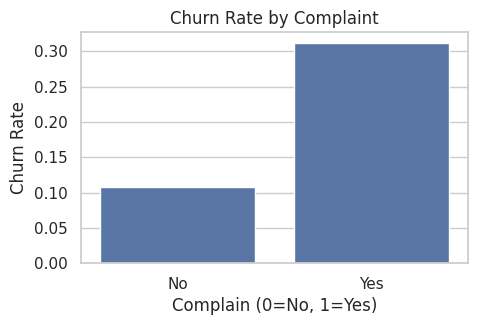

In [29]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df_edabin, x='Complain', y='Churn', estimator=lambda x: sum(x)/len(x), ci=None)
plt.title('Churn Rate by Complaint')
plt.ylabel('Churn Rate')
plt.xlabel('Complain (0=No, 1=Yes)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


- Sesuai ekspektasi logika di mana apabila pelanggan melakukan *complain*, akan mengakibatkan perasaan negatif yang bisa berujung churn. Bar-plot ini sangat jelas merepresentasikan logika tersebut, di mana churn rate pada pelanggan yang melakukan *complain* 3 kali lipat melebihi pelanggan yang churn walawpun tidak melakukan *complain* kepada *e-commerce*.

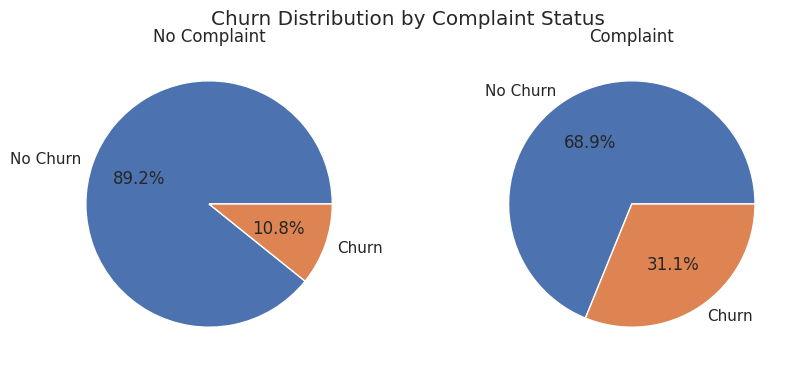

In [30]:
import matplotlib.pyplot as plt

# Calculate churn rate for each group
churn_complain = df_edabin[df_edabin['Complain'] == 1]['Churn'].value_counts(normalize=True)
churn_no_complain = df_edabin[df_edabin['Complain'] == 0]['Churn'].value_counts(normalize=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].pie(churn_no_complain, labels=['No Churn', 'Churn'], autopct='%1.1f%%')
axs[0].set_title('No Complaint')
axs[1].pie(churn_complain, labels=['No Churn', 'Churn'], autopct='%1.1f%%')
axs[1].set_title('Complaint')
plt.suptitle('Churn Distribution by Complaint Status')
plt.show()


- Walaupun tidak complain terhadap *e-commerce*, 10.8% dari keseluruhan proporsi tidak complain tetap melakukan churn.
- Sedangkan pelanggan yang complain terhadap *e-commerce*, memiliki persentase 68.9% dari keseluruhan proporsi *complain* yang tidak *churn*.
- Berdasarkan pie chart ini, pelanggan yang tidak *complain* lebih representatif terhadap ekspektasi logika di bandingkan pelanggan yang *complain*.   

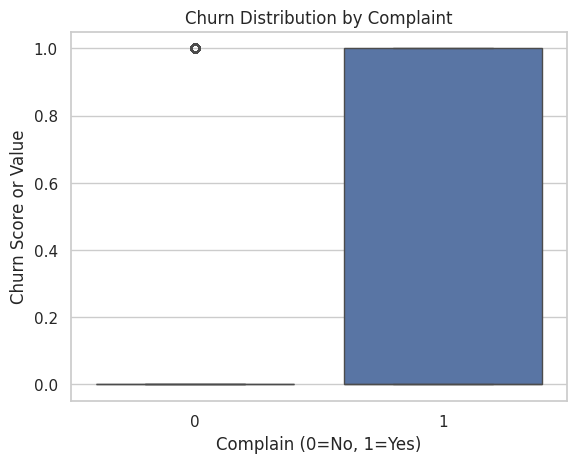

In [31]:
sns.boxplot(data=df_edabin, x='Complain', y='Churn')
plt.title('Churn Distribution by Complaint')
plt.xlabel('Complain (0=No, 1=Yes)')
plt.ylabel('Churn Score or Value')
plt.show()

- Pada pelanggan yang tidak melakukan *complain*, tetap adanya pelanggan yang churn, tetapi ini merupakan anomali data pada group pelanggan yang tidak melakukan *complain*.
- Berdasarkan *box-plot* ini, *complain* memiliki indikator yang kuat terhadap pelanggan yang *churn*.  

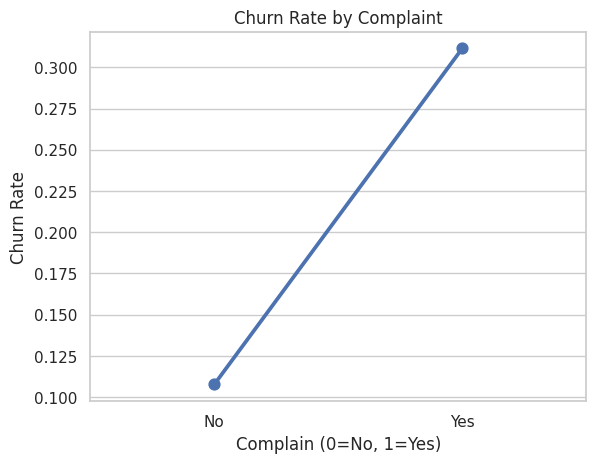

In [32]:
sns.pointplot(data=df_edabin, x='Complain', y='Churn', ci=None)
plt.title('Churn Rate by Complaint')
plt.xlabel('Complain (0=No, 1=Yes)')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- Sekilas terlihat perbedaan, di mana pelanggan yang *complain*, berkemungkinan berresiko untuk churn 3 kali lipat di bandingkan pelanggan yang tidak *complain*.

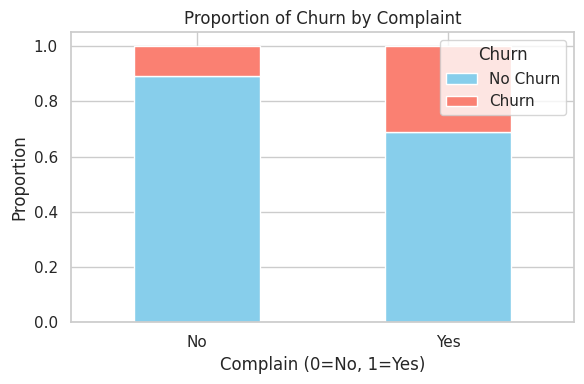

In [33]:
ct = pd.crosstab(df_edabin['Complain'], df_edabin['Churn'], normalize='index')
ct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(6, 4))
plt.title('Proportion of Churn by Complaint')
plt.ylabel('Proportion')
plt.xlabel('Complain (0=No, 1=Yes)')
plt.legend(['No Churn', 'Churn'], title='Churn')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()


- Berdasarkan *stackbar-plot* ini terlihat bahwa pelanggan yang churn berkonsentrasi di mana pelanggan melakukan *complain* terhadap *e-commerce*.
- Penemuan ini tentu saja tidak di anggap sebagai projeksi yang pasti, tetapi visualisasi ini merupakan bentuk peringatan bahwa pelanggan yang melakukan *complain* beresiko lebih untuk churn di bandingkan pelanggan yang tidak *complain.*

---
## **4.3. Analyzing Anomaly Variable ('SatisfactionScore')**

Bar-Plot

<Axes: xlabel='SatisfactionScore'>

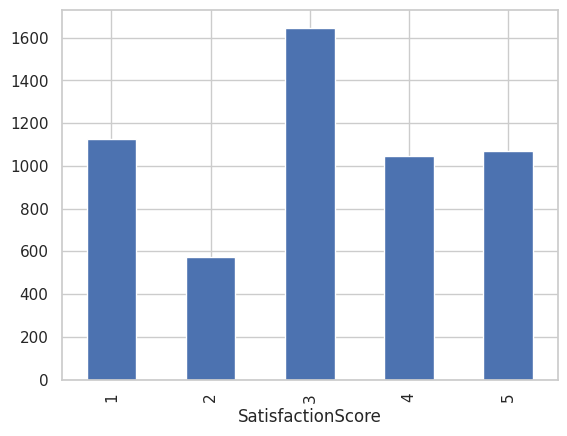

In [34]:
df_edabin['SatisfactionScore'].value_counts().sort_index().plot(kind='bar')

- Bar-plot tidak menunjukkan ilustrasi kuat dalam pembenaran apabila variable 'SatisfactionScore' memiliki nilai yang bersifat terbalik (*Likert Scale*)

Cross Tabulation

In [35]:
pd.crosstab(df_edabin['SatisfactionScore'], df_edabin['Churn'], normalize='index')

Churn                     0         1
SatisfactionScore                    
1                  0.883452  0.116548
2                  0.874126  0.125874
3                  0.830704  0.169296
4                  0.836520  0.163480
5                  0.764925  0.235075

- Berdasarkan *cross tabulation* di atas terlihat tiap baris memiliki proporsi di mana pelanggan *churn* atau tidak *churn*. Satisfaction score 5 memiliki *churn* rate yang sangatlah tinggi di bandingkan nilai yang lain (23.5%). Mulai dari niali urut 1 terlihat terjadi pola yang bersifat terbalik, dengan nilai 1 & 2 memiliki nilai *churn rate* terrendah.

Group by

In [36]:
df_edabin.groupby('Churn')['SatisfactionScore'].describe()

count      mean       std  min  25%  50%  75%  max
Churn                                                     
0      4557.0  3.006364  1.376047  1.0  2.0  3.0  4.0  5.0
1       905.0  3.376796  1.349579  1.0  3.0  3.0  5.0  5.0

- Berdasarkan data di atas pelanggan yang *churn* memiliki rata-rata nilai di atas pelanggan yang tidak *churn*. Statement ini di dukung juga oleh data persentil ke 25 dari pelanggan yang *churn* memiliki niali yang lebih tinggi di bandingkan pelanggan yang tidak *churn*.  

Correlation Matrix

In [37]:
df_edabin[['SatisfactionScore', 'CityTier', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'Churn']].corr()

SatisfactionScore  CityTier  \
SatisfactionScore                  1.000000 -0.010122   
CityTier                          -0.010122  1.000000   
NumberOfDeviceRegistered          -0.001164  0.037219   
NumberOfAddress                    0.053135 -0.031202   
CouponUsed                         0.026710  0.025028   
OrderCount                         0.025284  0.034449   
Churn                              0.099922  0.081197   

                          NumberOfDeviceRegistered  NumberOfAddress  \
SatisfactionScore                        -0.001164         0.053135   
CityTier                                  0.037219        -0.031202   
NumberOfDeviceRegistered                  1.000000         0.093595   
NumberOfAddress                           0.093595         1.000000   
CouponUsed                                0.138758         0.047324   
OrderCount                                0.102558         0.004720   
Churn                                     0.158686         0.045590   

                          CouponUsed  OrderCount     Churn  
SatisfactionScore           0.026710    0.025284  0.099922  
CityTier                    0.025028    0.034449  0.081197  
NumberOfDeviceRegistered    0.138758    0.102558  0.158686  
NumberOfAddress             0.047324    0.004720  0.045590  
CouponUsed                  1.000000    0.772826 -0.018998  
OrderCount                  0.772826    1.000000 -0.042379  
Churn                      -0.018998   -0.042379  1.000000

- Berdasarkan matrix kita bisa berfokus terhadap *variable* 'SatisfactionScore' terhadap 'Churn' di mana memiliki korelasi positif yang lemah, ini berindikasi adanya duggan nilai kebalik terhadap *variable* tersebut. Walaupun korelasi positif tersebut lemah, tetap adanya kecurigaan terhadap *variable* 'SatisfactionScore'.
- Penemuan di bawah hanya untuk konfrmasi apabila setelah membalikkan skala 'SatisfactionScore' ada nya korelasi negatif terhadap *churn* dan dugaan itu telah terkonfirmasi.

In [38]:
df_edabin['SatisfactionScore_Reversed'] = 6 - df_edabin['SatisfactionScore']
df_edabin[['SatisfactionScore_Reversed', 'Churn']].corr()

SatisfactionScore_Reversed     Churn
SatisfactionScore_Reversed                    1.000000 -0.099922
Churn                                        -0.099922  1.000000

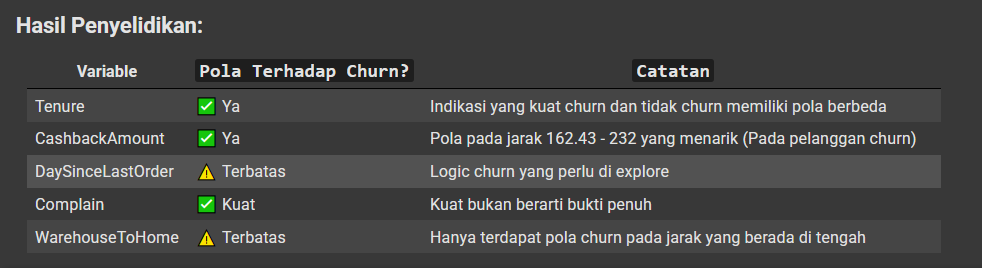

In [78]:
from IPython.display import Image
Image('1.png')

---

## **4.4. Data Sampling**

Tahap sampling ini dilakukan bertujuan untuk menganalisa lebih dalam kepada variable yang telah di label 'feature importance' berdasarkan analisa fitur sebelumnya. Proses ini membuat dataframe baru untuk tiap 5 variable berdasarkan titik churn yang signifikan:

- 'Tenure'--> ('0.0–0.5', '0.5–1.5')
- 'CashbackAmount'--> ('147.75–149.88')
- 'DaySinceLastOrder'--> ('0.0–1.5')
- 'Complain'--> (1 = Complain)
- 'WarehouseToHome'--> ('27.5–31.5')

**Pelanggan yang Subscribe di bawah 2 bulan**

In [39]:
print(df_edabin['Tenure_bin_range'].unique())

['3.5–5.5', '5.5–15.5', '0.0–0.5', '18.5–61.0', '15.5–18.5', '1.5–3.5', '0.5–1.5']
Categories (7, object): ['0.0–0.5' < '0.5–1.5' < '1.5–3.5' < '3.5–5.5' < '5.5–15.5' < '15.5–18.5' <
                         '18.5–61.0']


In [40]:
df_tenure_sample = df_edabin[df_edabin['Tenure_bin_range'].isin(['0.0–0.5', '0.5–1.5'])].copy()

- 'Tenure'
- 'CashbackAmount',
- 'DaySinceLastOrder'
- 'Complain'

In [41]:
df_tenure_sample.drop(columns=['Tenure_missing', 'WarehouseToHome_missing', 'HourSpendOnApp_missing', 'OrderAmountHikeFromlastYear_missing', 'CouponUsed_missing',
    'OrderCount_missing', 'DaySinceLastOrder_missing', 'Tenure_missing_bin', 'WarehouseToHome_missing_bin', 'HourSpendOnApp_missing_bin', 'OrderAmountHikeFromlastYear_missing_bin', 'CouponUsed_missing_bin',
    'OrderCount_missing_bin', 'DaySinceLastOrder_missing_bin', 'Tenure_bin', 'WarehouseToHome_bin', 'HourSpendOnApp_bin', 'OrderAmountHikeFromlastYear_bin', 'CouponUsed_bin',
    'OrderCount_bin', 'DaySinceLastOrder_bin', 'CashbackAmount_bin', 'NumberOfDeviceRegistered_bin', 'NumberOfAddress_bin', 'SatisfactionScore_Reversed'], inplace=True)

In [42]:
df_tenure_sample.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
3       1     0.0                Phone         3             15.0   
4       1     0.0                Phone         1             12.0   
5       1     0.0             Computer         1             22.0   
11      1     0.0                Phone         1             11.0   
12      1     0.0                Phone         1             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
3            Debit Card    Male        2.000000                         4   
4           Credit Card    Male        2.411191                         3   
5            Debit Card  Female        3.000000                         5   
11     Cash on Delivery    Male        2.000000                         3   
12          Credit Card    Male        3.000000                         4   

      PreferedOrderCat  ...  HourSpendOnApp_bin_range Tenure_bin_range  \
3   Laptop & Accessory  ...                   0.0–2.5          0.0–0.5   
4               Mobile  ...                   0.0–2.5          0.0–0.5   
5         Mobile Phone  ...                   2.5–3.5          0.0–0.5   
11              Mobile  ...                   0.0–2.5          0.0–0.5   
12              Mobile  ...                   2.5–3.5          0.0–0.5   

    WarehouseToHome_bin_range  NumberOfAddress_bin_range  \
3                   14.5–17.5                     6.5–20   
4                    8.5–14.5                    1.5–5.5   
5                   17.5–27.5                    1.5–5.5   
11                   8.5–14.5                    1.5–5.5   
12                  14.5–17.5                    0.0–1.5   

    OrderAmountHikeFromlastYear_bin_range  CouponUsed_bin_range  \
3                               22.5–26.0               0.0–2.5   
4                                0.0–12.5               0.0–2.5   
5                               20.5–22.5               2.5–4.5   
11                              12.5–13.5               0.0–2.5   
12                              13.5–18.5               0.0–2.5   

    OrderCount_bin_range  DaySinceLastOrder_bin_range  \
3                0.0–3.5                      1.5–3.5   
4                0.0–3.5                      1.5–3.5   
5                3.5–6.5                      3.5–7.5   
11               0.0–3.5                      1.5–3.5   
12               0.0–3.5                      0.0–1.5   

    CashbackAmount_bin_range NumberOfDeviceRegistered_bin_range  
3                 0.0–147.75                            3.5–4.5  
4                 0.0–147.75                            2.5–3.5  
5                 0.0–147.75                              4.5–6  
11                0.0–147.75                            2.5–3.5  
12                0.0–147.75                            3.5–4.5  

[5 rows x 29 columns]

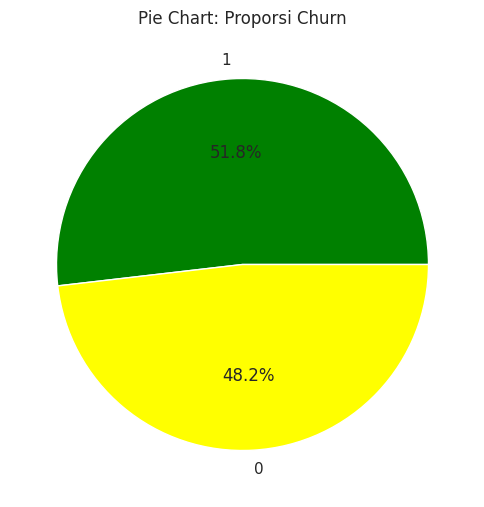

In [43]:
typee = df_tenure_sample["Churn"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["Green", "yellow"])
plt.title("Pie Chart: Proporsi Churn")
plt.ylabel("")
plt.show()

In [44]:
df_tenure_sample.describe(exclude='number')

PreferredLoginDevice PreferredPaymentMode Gender PreferedOrderCat  \
count                  1171                 1171   1171             1171   
unique                    2                    5      2                6   
top                   Phone           Debit Card   Male     Mobile Phone   
freq                    833                  413    747              498   

       MaritalStatus HourSpendOnApp_bin_range Tenure_bin_range  \
count           1171                     1171             1171   
unique             3                        3                2   
top           Single                  2.5–3.5          0.5–1.5   
freq             533                      602              678   

       WarehouseToHome_bin_range NumberOfAddress_bin_range  \
count                       1171                      1171   
unique                         7                         4   
top                     8.5–14.5                   1.5–5.5   
freq                         350                       851   

       OrderAmountHikeFromlastYear_bin_range CouponUsed_bin_range  \
count                                   1171                 1171   
unique                                     6                    3   
top                                13.5–18.5              0.0–2.5   
freq                                     452                 1037   

       OrderCount_bin_range DaySinceLastOrder_bin_range  \
count                  1171                        1171   
unique                    3                           6   
top                 0.0–3.5                     1.5–3.5   
freq                   1028                         457   

       CashbackAmount_bin_range NumberOfDeviceRegistered_bin_range  
count                      1171                               1171  
unique                        7                                  4  
top                  0.0–147.75                            3.5–4.5  
freq                        512                                492

In [45]:
df_tenure_sample.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
3       1     0.0                Phone         3             15.0   
4       1     0.0                Phone         1             12.0   
5       1     0.0             Computer         1             22.0   
11      1     0.0                Phone         1             11.0   
12      1     0.0                Phone         1             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
3            Debit Card    Male        2.000000                         4   
4           Credit Card    Male        2.411191                         3   
5            Debit Card  Female        3.000000                         5   
11     Cash on Delivery    Male        2.000000                         3   
12          Credit Card    Male        3.000000                         4   

      PreferedOrderCat  ...  HourSpendOnApp_bin_range Tenure_bin_range  \
3   Laptop & Accessory  ...                   0.0–2.5          0.0–0.5   
4               Mobile  ...                   0.0–2.5          0.0–0.5   
5         Mobile Phone  ...                   2.5–3.5          0.0–0.5   
11              Mobile  ...                   0.0–2.5          0.0–0.5   
12              Mobile  ...                   2.5–3.5          0.0–0.5   

    WarehouseToHome_bin_range  NumberOfAddress_bin_range  \
3                   14.5–17.5                     6.5–20   
4                    8.5–14.5                    1.5–5.5   
5                   17.5–27.5                    1.5–5.5   
11                   8.5–14.5                    1.5–5.5   
12                  14.5–17.5                    0.0–1.5   

    OrderAmountHikeFromlastYear_bin_range  CouponUsed_bin_range  \
3                               22.5–26.0               0.0–2.5   
4                                0.0–12.5               0.0–2.5   
5                               20.5–22.5               2.5–4.5   
11                              12.5–13.5               0.0–2.5   
12                              13.5–18.5               0.0–2.5   

    OrderCount_bin_range  DaySinceLastOrder_bin_range  \
3                0.0–3.5                      1.5–3.5   
4                0.0–3.5                      1.5–3.5   
5                3.5–6.5                      3.5–7.5   
11               0.0–3.5                      1.5–3.5   
12               0.0–3.5                      0.0–1.5   

    CashbackAmount_bin_range NumberOfDeviceRegistered_bin_range  
3                 0.0–147.75                            3.5–4.5  
4                 0.0–147.75                            2.5–3.5  
5                 0.0–147.75                              4.5–6  
11                0.0–147.75                            2.5–3.5  
12                0.0–147.75                            3.5–4.5  

[5 rows x 29 columns]

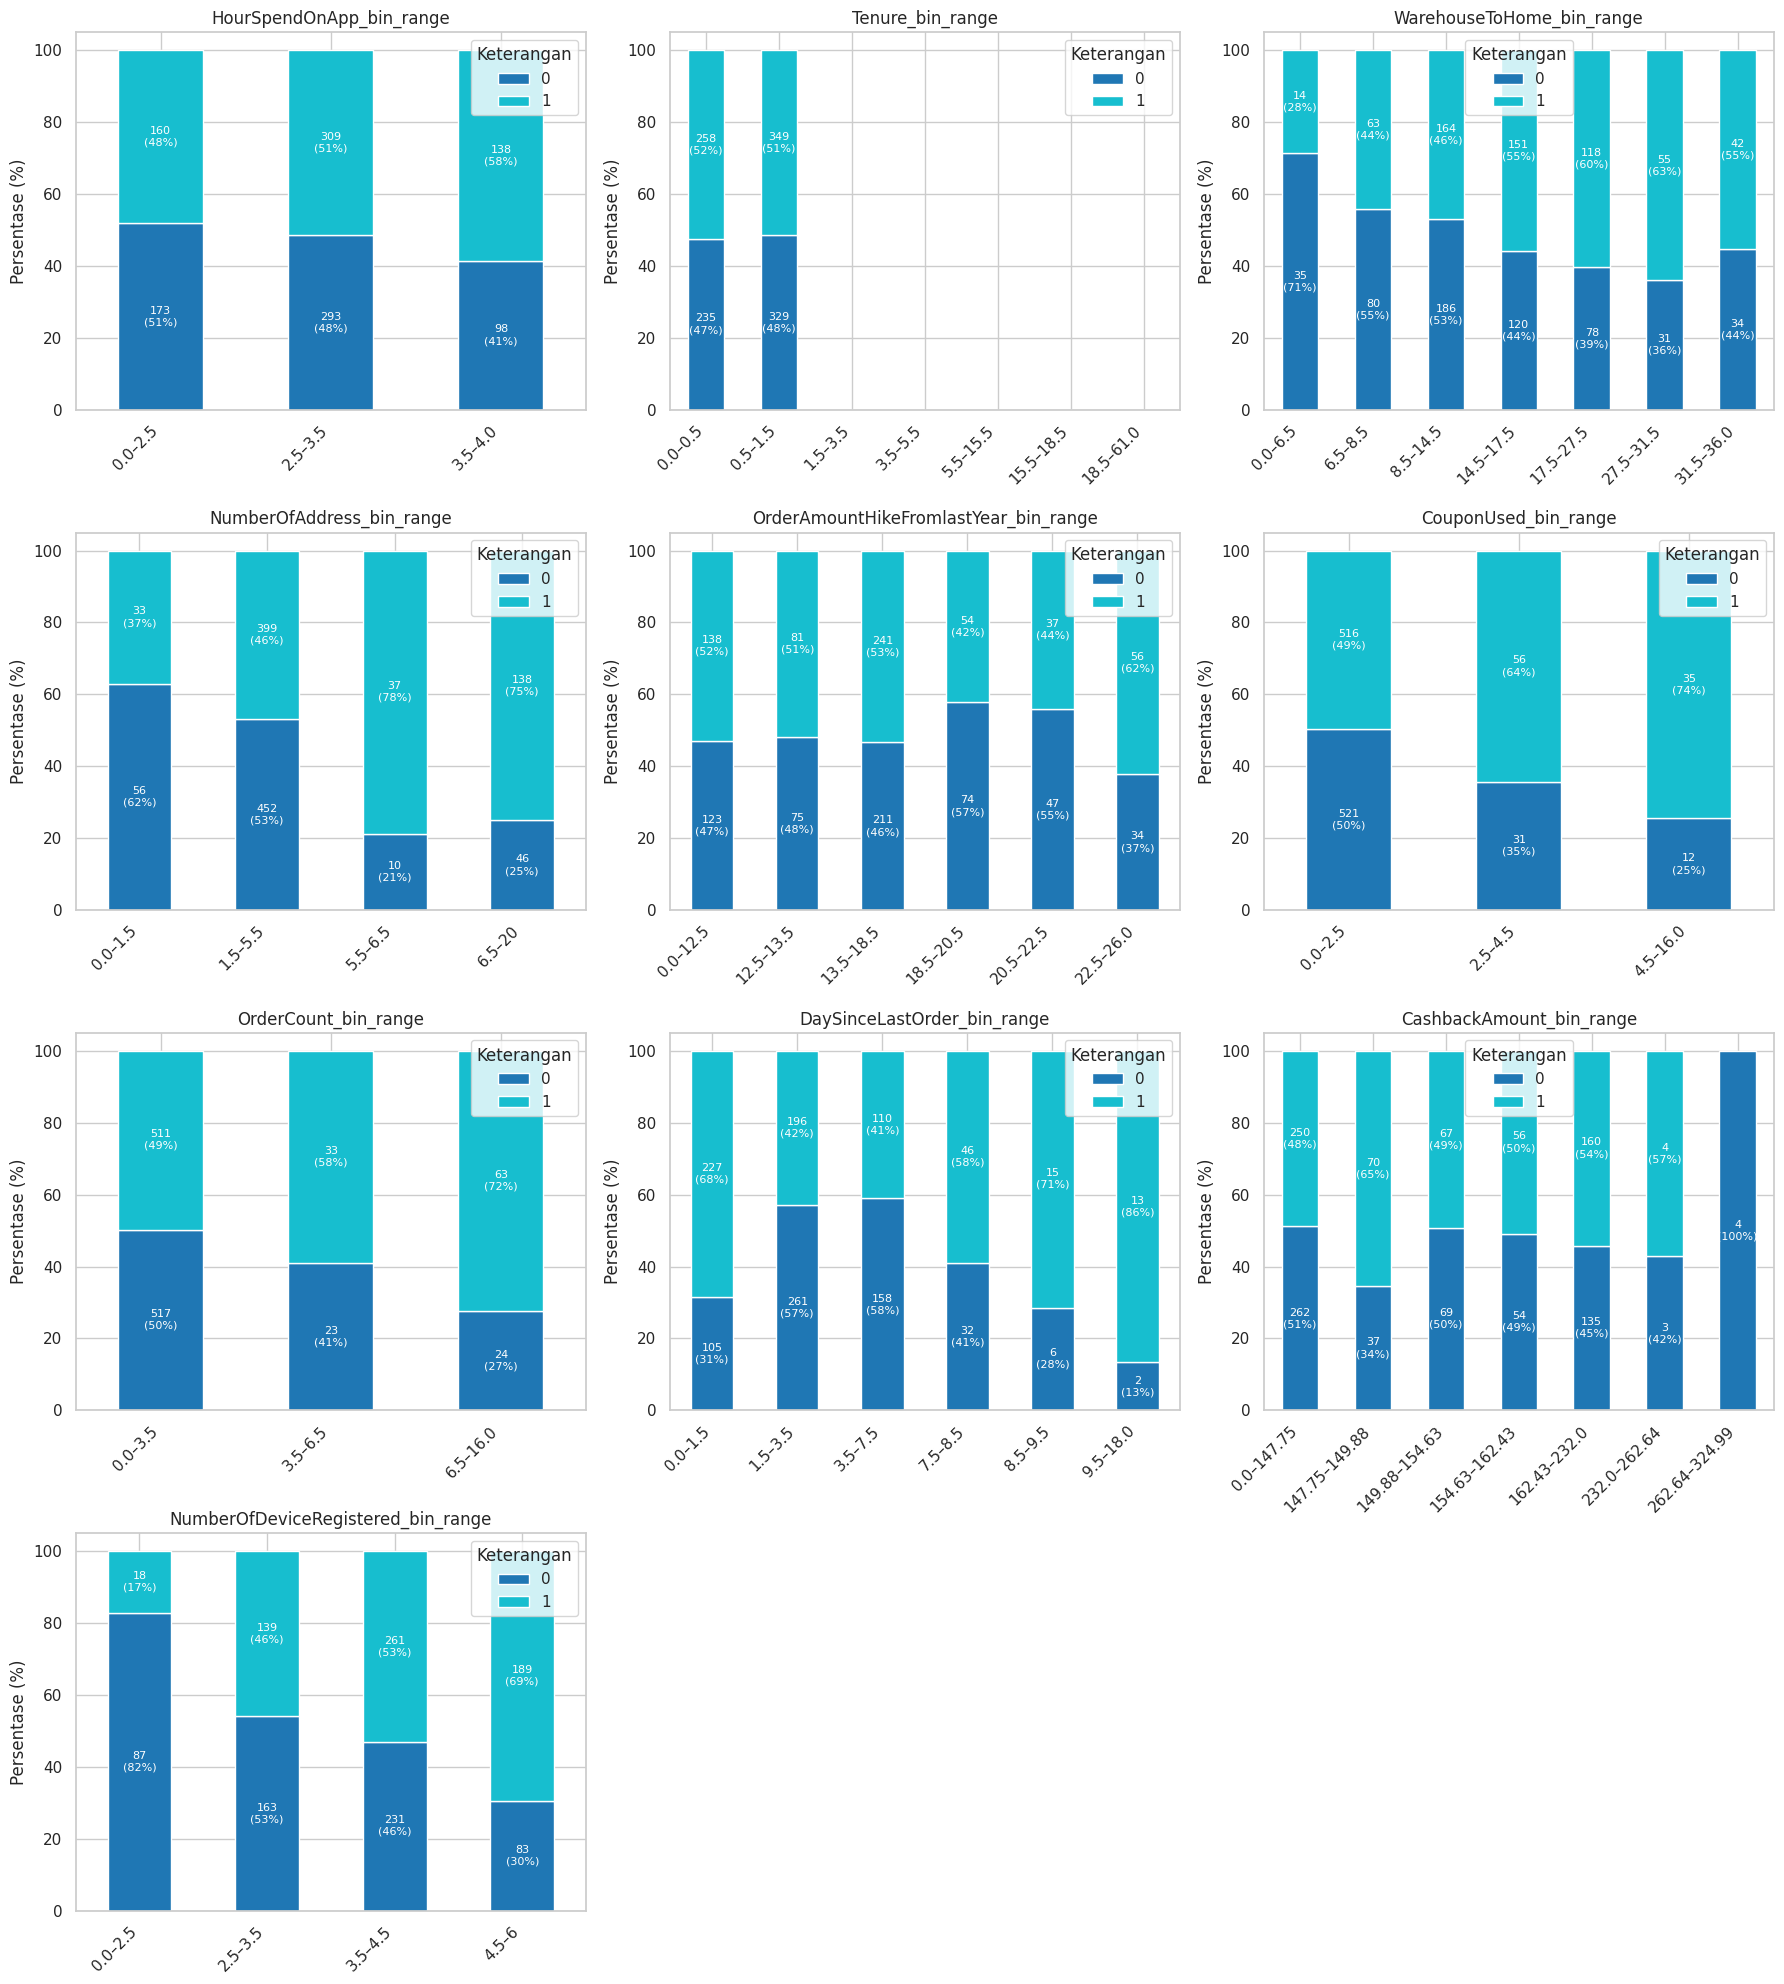

In [46]:
cols_to_plot = [
    'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range',
    'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range',
    'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range'
]

plot_multiple_stacked_churn(df_tenure_sample, cols_to_plot, churn_col='Churn', n_cols=3)

In [47]:
kategori_vars = ['PreferredLoginDevice', 'Gender', 'CityTier', 'MaritalStatus', 'PreferredPaymentMode', 'PreferedOrderCat', 'SatisfactionScore', 'Complain', 'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range', 'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range', 'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range']

for var in kategori_vars:
    print(f"\nAverage Churn by {var}:")
    print(df_tenure_sample.groupby(var)['Churn'].mean())


Average Churn by PreferredLoginDevice:
PreferredLoginDevice
Computer    0.609467
Phone       0.481393
Name: Churn, dtype: float64

Average Churn by Gender:
Gender
Female    0.535377
Male      0.508701
Name: Churn, dtype: float64

Average Churn by CityTier:
CityTier
1    0.480055
2    0.772727
3    0.560000
Name: Churn, dtype: float64

Average Churn by MaritalStatus:
MaritalStatus
Divorced    0.466258
Married     0.429474
Single      0.613508
Name: Churn, dtype: float64

Average Churn by PreferredPaymentMode:
PreferredPaymentMode
Cash on Delivery    0.692308
Credit Card         0.435323
Debit Card          0.493947
E wallet            0.680000
UPI                 0.524752
Name: Churn, dtype: float64

Average Churn by PreferedOrderCat:
PreferedOrderCat
Fashion               0.772152
Grocery               0.000000
Laptop & Accessory    0.431953
Mobile                0.503968
Mobile Phone          0.548193
Others                0.000000
Name: Churn, dtype: float64

Average Churn by Satisf

**Pelanggan yang mempunyai cashback di bawah 150**

In [48]:
print(df_edabin['CashbackAmount_bin_range'].unique())

['154.63–162.43', '0.0–147.75', '149.88–154.63', '162.43–232.0', '147.75–149.88', '262.64–324.99', '232.0–262.64']
Categories (7, object): ['0.0–147.75' < '147.75–149.88' < '149.88–154.63' < '154.63–162.43' <
                         '162.43–232.0' < '232.0–262.64' < '262.64–324.99']


In [49]:
df_cashback_sample = df_edabin[df_edabin['CashbackAmount_bin_range'].isin(['147.75–149.88'])].copy()

In [50]:
df_cashback_sample.drop(columns=['Tenure_missing', 'WarehouseToHome_missing', 'HourSpendOnApp_missing', 'OrderAmountHikeFromlastYear_missing', 'CouponUsed_missing',
    'OrderCount_missing', 'DaySinceLastOrder_missing', 'Tenure_missing_bin', 'WarehouseToHome_missing_bin', 'HourSpendOnApp_missing_bin', 'OrderAmountHikeFromlastYear_missing_bin', 'CouponUsed_missing_bin',
    'OrderCount_missing_bin', 'DaySinceLastOrder_missing_bin', 'Tenure_bin', 'WarehouseToHome_bin', 'HourSpendOnApp_bin', 'OrderAmountHikeFromlastYear_bin', 'CouponUsed_bin',
    'OrderCount_bin', 'DaySinceLastOrder_bin', 'CashbackAmount_bin', 'NumberOfDeviceRegistered_bin', 'NumberOfAddress_bin', 'SatisfactionScore_Reversed'], inplace=True)

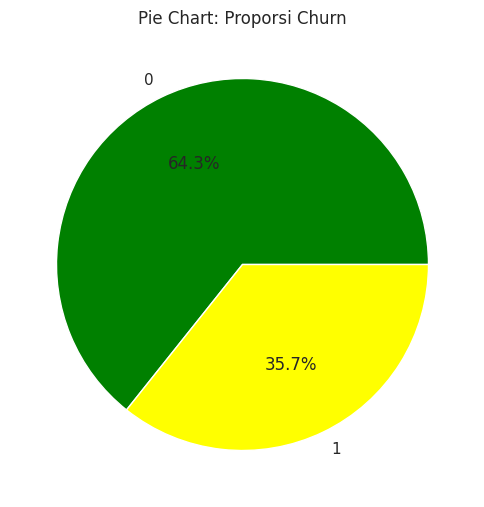

In [51]:
typee = df_cashback_sample["Churn"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["Green", "yellow"])
plt.title("Pie Chart: Proporsi Churn")
plt.ylabel("")
plt.show()

In [52]:
df_cashback_sample.describe(exclude='number')

PreferredLoginDevice PreferredPaymentMode Gender PreferedOrderCat  \
count                   252                  252    252              252   
unique                    2                    5      2                2   
top                   Phone           Debit Card   Male     Mobile Phone   
freq                    185                   98    163              183   

       MaritalStatus HourSpendOnApp_bin_range Tenure_bin_range  \
count            252                      252              252   
unique             3                        3                7   
top          Married                  2.5–3.5          0.5–1.5   
freq             126                      143               89   

       WarehouseToHome_bin_range NumberOfAddress_bin_range  \
count                        252                       252   
unique                         7                         4   
top                     8.5–14.5                   1.5–5.5   
freq                          89                       155   

       OrderAmountHikeFromlastYear_bin_range CouponUsed_bin_range  \
count                                    252                  252   
unique                                     6                    3   
top                                13.5–18.5              0.0–2.5   
freq                                     105                  215   

       OrderCount_bin_range DaySinceLastOrder_bin_range  \
count                   252                         252   
unique                    3                           6   
top                 0.0–3.5                     1.5–3.5   
freq                    223                         102   

       CashbackAmount_bin_range NumberOfDeviceRegistered_bin_range  
count                       252                                252  
unique                        1                                  4  
top               147.75–149.88                            3.5–4.5  
freq                        252                                124

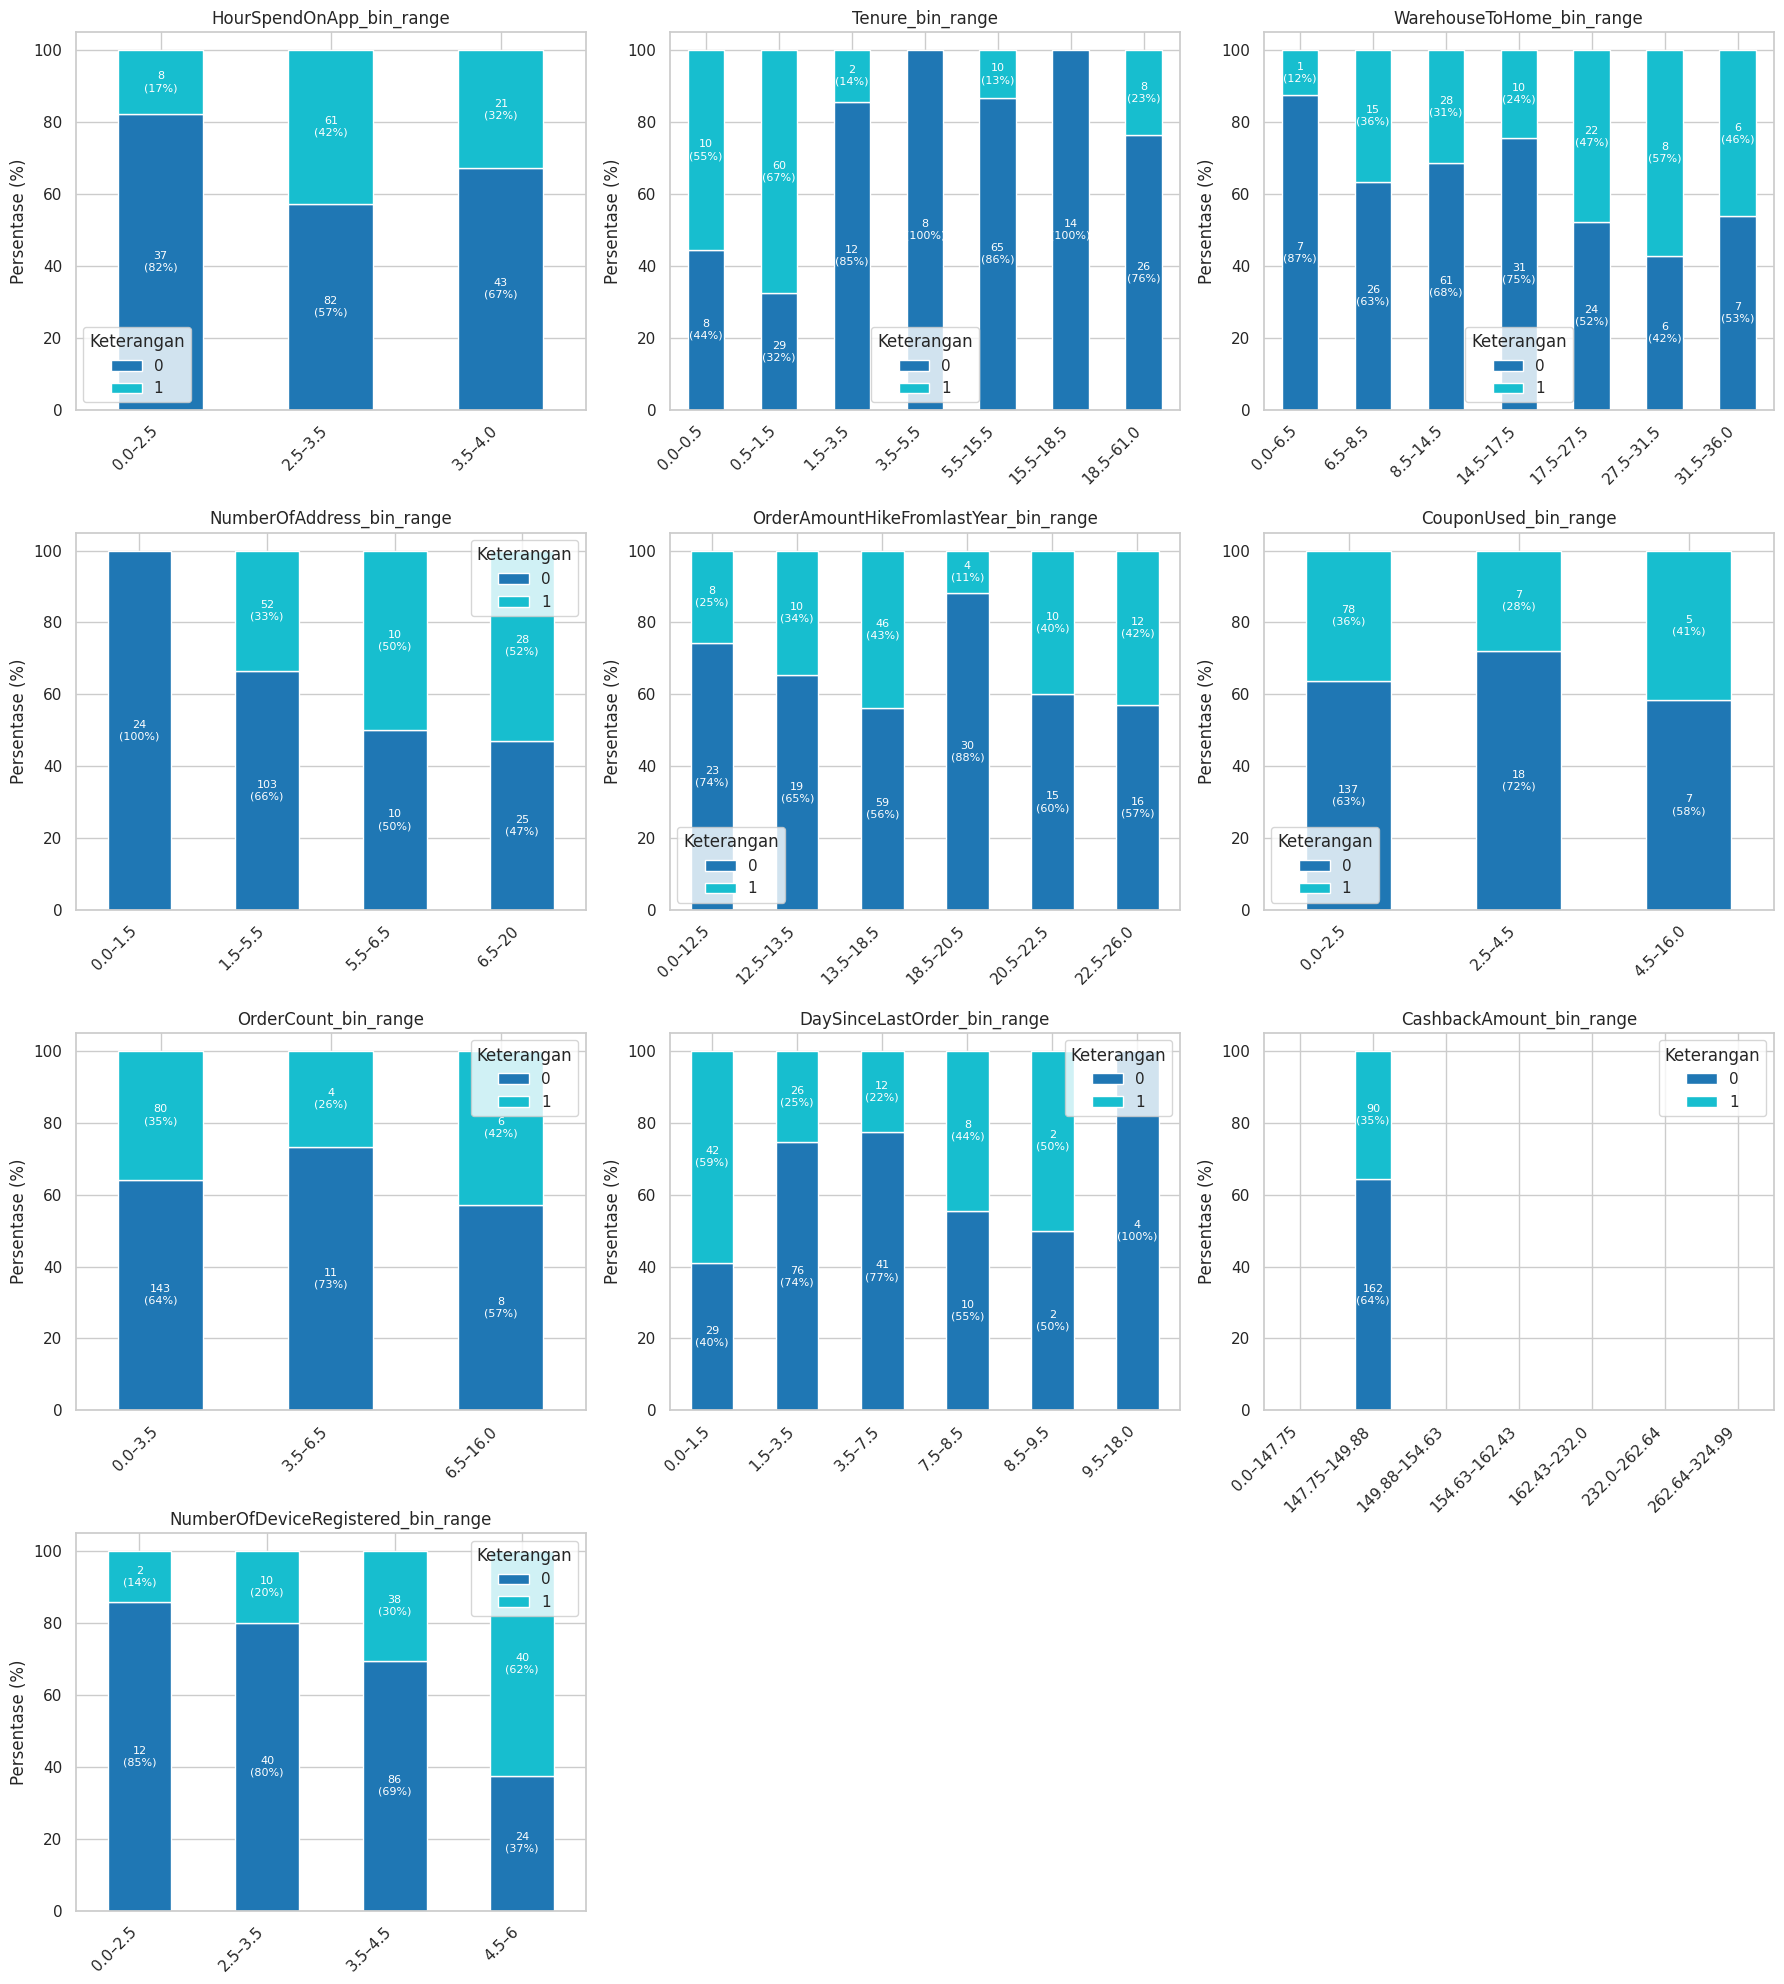

In [53]:
cols_to_plot = [
    'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range',
    'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range',
    'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range'
]

plot_multiple_stacked_churn(df_cashback_sample, cols_to_plot, churn_col='Churn', n_cols=3)

In [54]:
kategori_vars = ['PreferredLoginDevice', 'Gender', 'CityTier', 'MaritalStatus', 'PreferredPaymentMode', 'PreferedOrderCat', 'SatisfactionScore', 'Complain', 'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range', 'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range', 'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range']

for var in kategori_vars:
    print(f"\nAverage Churn by {var}:")
    print(df_cashback_sample.groupby(var)['Churn'].mean())


Average Churn by PreferredLoginDevice:
PreferredLoginDevice
Computer    0.447761
Phone       0.324324
Name: Churn, dtype: float64

Average Churn by Gender:
Gender
Female    0.292135
Male      0.392638
Name: Churn, dtype: float64

Average Churn by CityTier:
CityTier
1    0.419890
2    0.250000
3    0.190476
Name: Churn, dtype: float64

Average Churn by MaritalStatus:
MaritalStatus
Divorced    0.324324
Married     0.333333
Single      0.404494
Name: Churn, dtype: float64

Average Churn by PreferredPaymentMode:
PreferredPaymentMode
Cash on Delivery    0.545455
Credit Card         0.433735
Debit Card          0.265306
E wallet            0.300000
UPI                 0.222222
Name: Churn, dtype: float64

Average Churn by PreferedOrderCat:
PreferedOrderCat
Laptop & Accessory    0.173913
Mobile Phone          0.426230
Name: Churn, dtype: float64

Average Churn by SatisfactionScore:
SatisfactionScore
1    0.302326
2    0.259259
3    0.369231
4    0.352941
5    0.448980
Name: Churn, dtype: flo

**Pelanggan yang tidak melakukan order kurang dari 2 hari**

In [55]:
print(df_edabin['DaySinceLastOrder_bin_range'].unique())

['3.5–7.5', '0.0–1.5', '1.5–3.5', '9.5–18.0', '8.5–9.5', '7.5–8.5']
Categories (6, object): ['0.0–1.5' < '1.5–3.5' < '3.5–7.5' < '7.5–8.5' < '8.5–9.5' < '9.5–18.0']


In [56]:
df_daylast_sample = df_edabin[df_edabin['DaySinceLastOrder_bin_range'].isin(['0.0–1.5'])].copy()

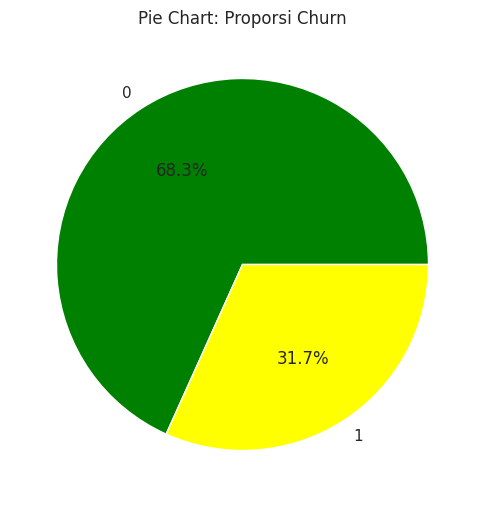

In [57]:
typee = df_daylast_sample["Churn"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["Green", "yellow"])
plt.title("Pie Chart: Proporsi Churn")
plt.ylabel("")
plt.show()

In [58]:
df_daylast_sample.describe(exclude='number')

PreferredLoginDevice PreferredPaymentMode Gender PreferedOrderCat  \
count                  1081                 1081   1081             1081   
unique                    2                    5      2                6   
top                   Phone           Debit Card   Male     Mobile Phone   
freq                    764                  471    655              356   

       MaritalStatus HourSpendOnApp_bin_range Tenure_bin_range  \
count           1081                     1081             1081   
unique             3                        3                7   
top          Married                  2.5–3.5         5.5–15.5   
freq             513                      526              433   

       WarehouseToHome_bin_range NumberOfAddress_bin_range  \
count                       1081                      1081   
unique                         7                         4   
top                     8.5–14.5                   1.5–5.5   
freq                         330                       739   

       OrderAmountHikeFromlastYear_bin_range CouponUsed_bin_range  \
count                                   1081                 1081   
unique                                     6                    3   
top                                13.5–18.5              0.0–2.5   
freq                                     466                 1039   

       OrderCount_bin_range DaySinceLastOrder_bin_range  \
count                  1081                        1081   
unique                    3                           1   
top                 0.0–3.5                     0.0–1.5   
freq                   1034                        1081   

       CashbackAmount_bin_range NumberOfDeviceRegistered_bin_range  
count                      1081                               1081  
unique                        7                                  4  
top                  0.0–147.75                            3.5–4.5  
freq                        492                                444

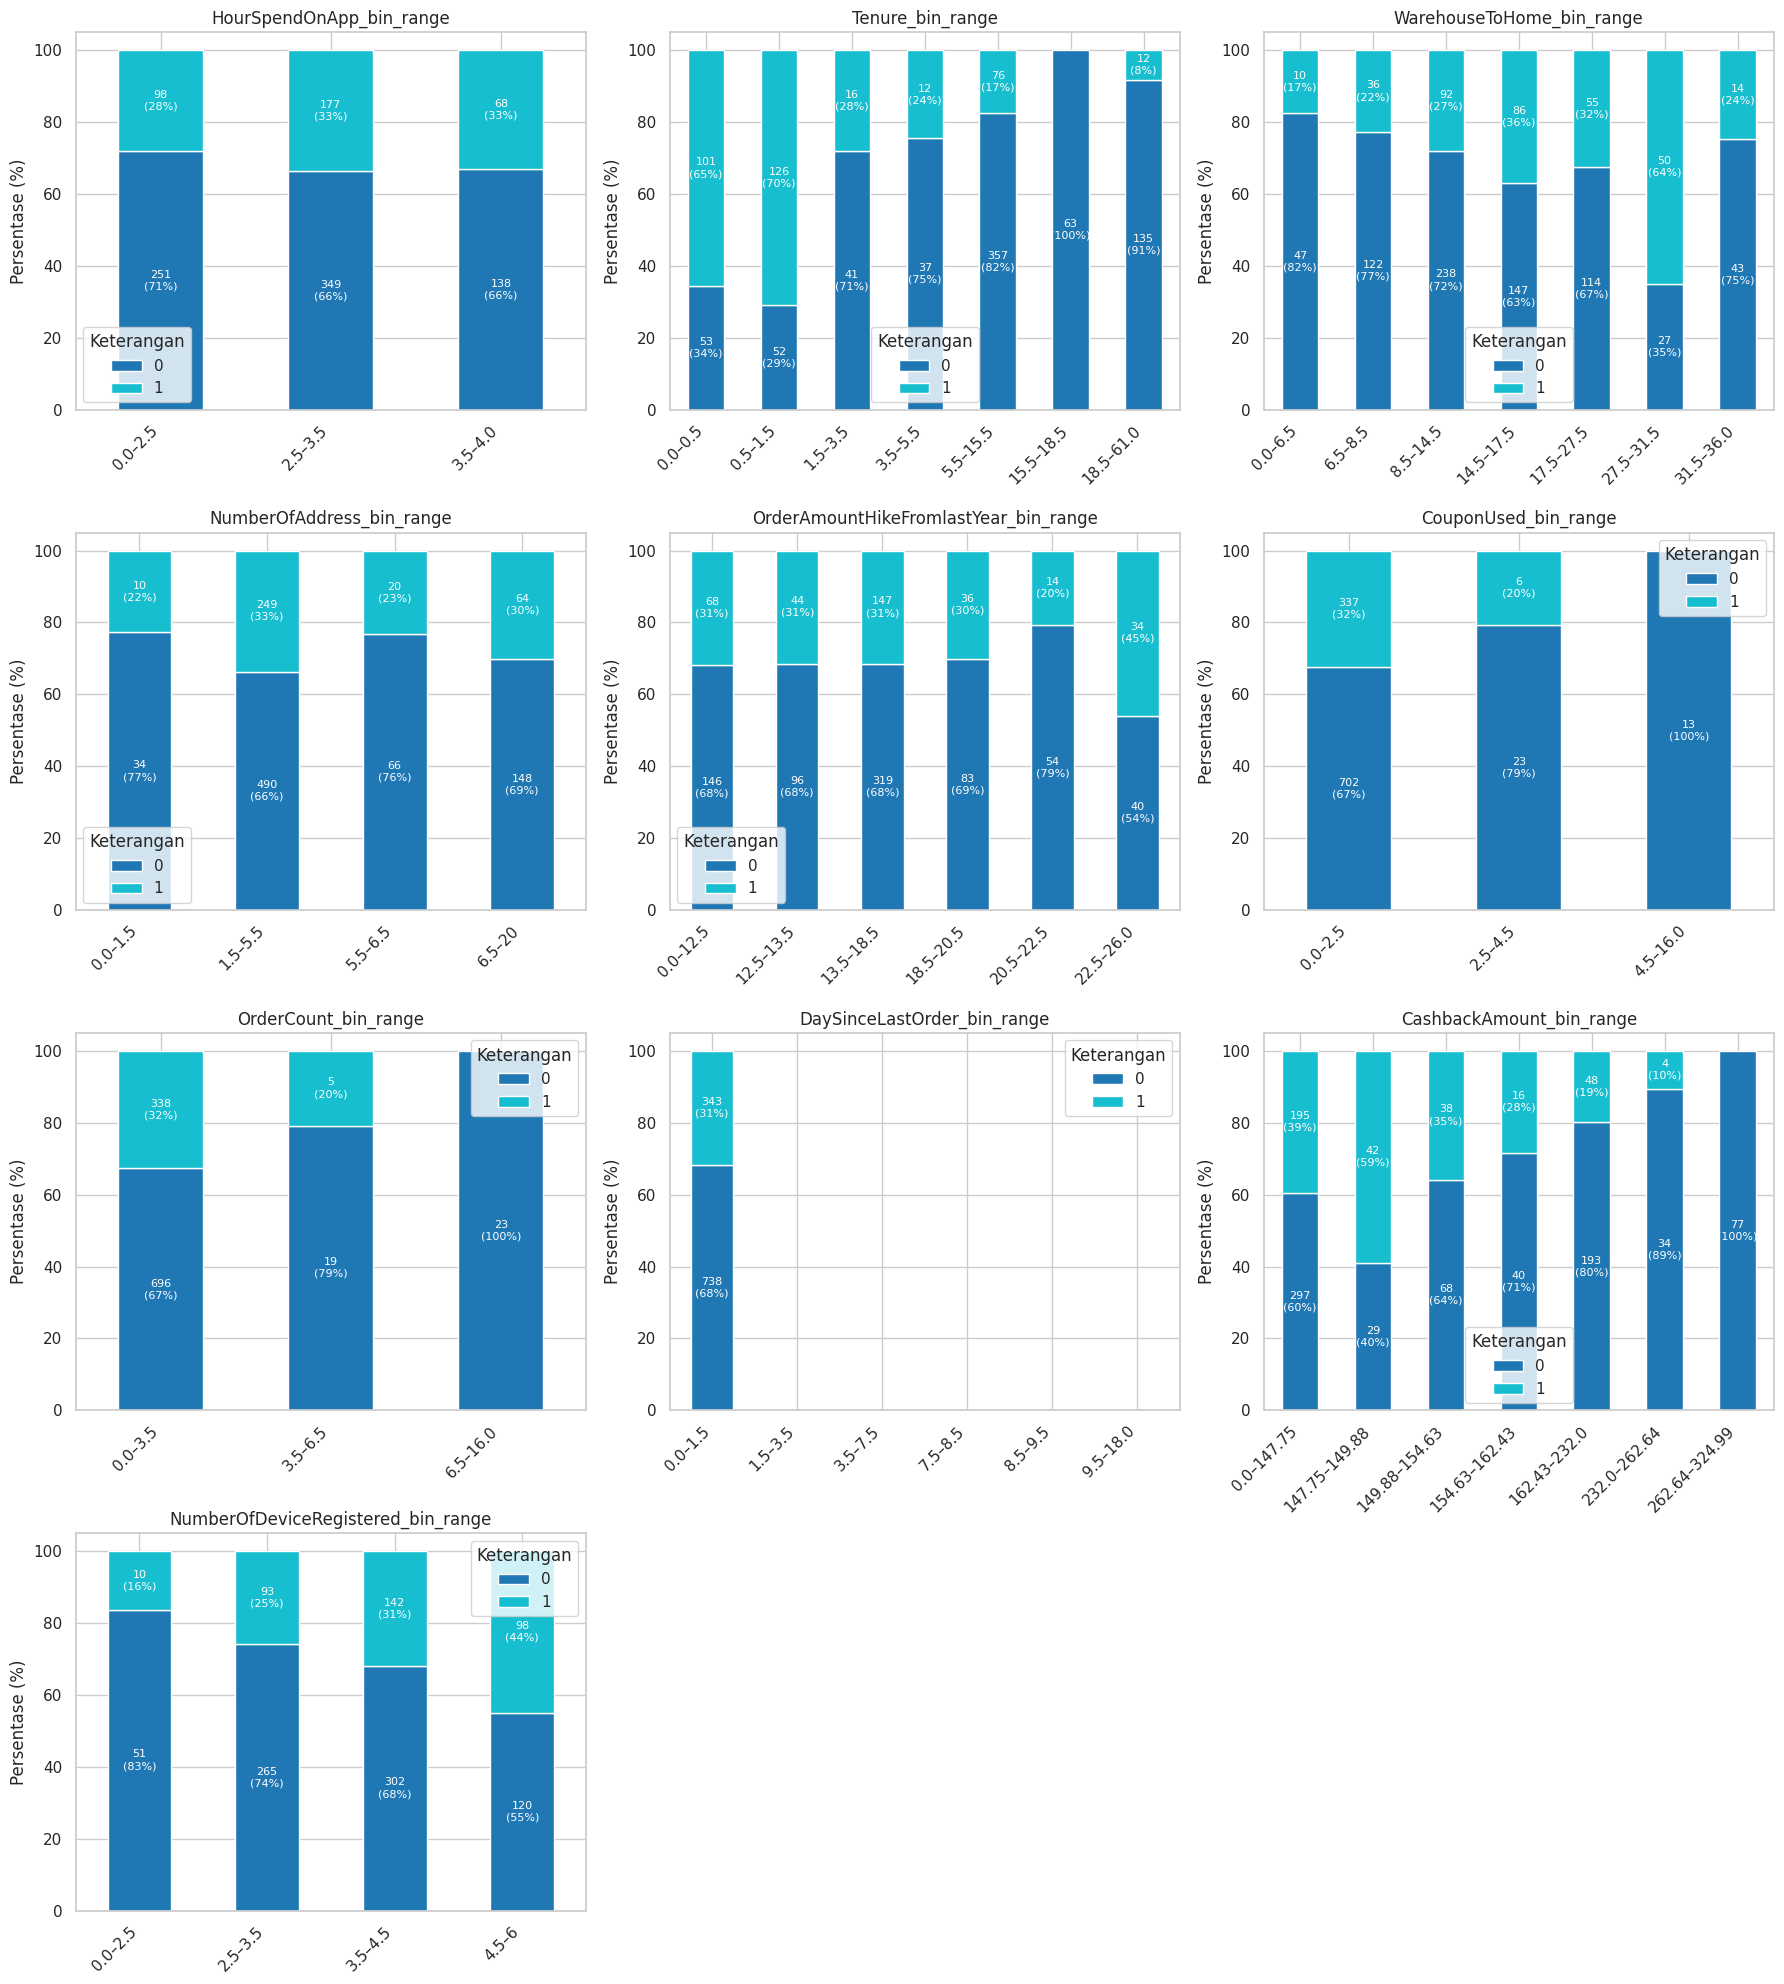

In [59]:
cols_to_plot = [
    'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range',
    'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range',
    'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range'
]

plot_multiple_stacked_churn(df_daylast_sample, cols_to_plot, churn_col='Churn', n_cols=3)

In [60]:
kategori_vars = ['PreferredLoginDevice', 'Gender', 'CityTier', 'MaritalStatus', 'PreferredPaymentMode', 'PreferedOrderCat', 'SatisfactionScore', 'Complain', 'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range', 'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range', 'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range']

for var in kategori_vars:
    print(f"\nAverage Churn by {var}:")
    print(df_daylast_sample.groupby(var)['Churn'].mean())


Average Churn by PreferredLoginDevice:
PreferredLoginDevice
Computer    0.403785
Phone       0.281414
Name: Churn, dtype: float64

Average Churn by Gender:
Gender
Female    0.284038
Male      0.338931
Name: Churn, dtype: float64

Average Churn by CityTier:
CityTier
1    0.289773
2    0.478261
3    0.353474
Name: Churn, dtype: float64

Average Churn by MaritalStatus:
MaritalStatus
Divorced    0.225166
Married     0.237817
Single      0.448441
Name: Churn, dtype: float64

Average Churn by PreferredPaymentMode:
PreferredPaymentMode
Cash on Delivery    0.494382
Credit Card         0.226994
Debit Card          0.312102
E wallet            0.400000
UPI                 0.400000
Name: Churn, dtype: float64

Average Churn by PreferedOrderCat:
PreferedOrderCat
Fashion               0.244444
Grocery               0.032258
Laptop & Accessory    0.184397
Mobile                0.398438
Mobile Phone          0.463483
Others                0.000000
Name: Churn, dtype: float64

Average Churn by Satisf

**Jarak warehouse terhadap rumah pelanggan di atas 27.5km**

In [61]:
print(df_edabin['WarehouseToHome_bin_range'].unique())

['0.0–6.5', '6.5–8.5', '27.5–31.5', '14.5–17.5', '8.5–14.5', '17.5–27.5', '31.5–36.0']
Categories (7, object): ['0.0–6.5' < '6.5–8.5' < '8.5–14.5' < '14.5–17.5' < '17.5–27.5' < '27.5–31.5' <
                         '31.5–36.0']


In [62]:
df_warehousehome_sample = df_edabin[df_edabin['WarehouseToHome_bin_range'].isin(['27.5–31.5'])].copy()

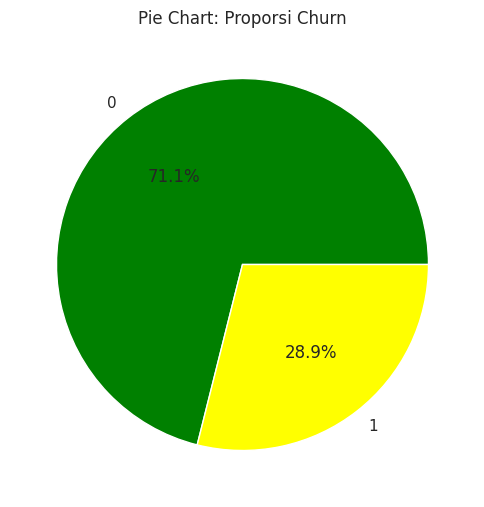

In [63]:
typee = df_warehousehome_sample["Churn"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["Green", "yellow"])
plt.title("Pie Chart: Proporsi Churn")
plt.ylabel("")
plt.show()

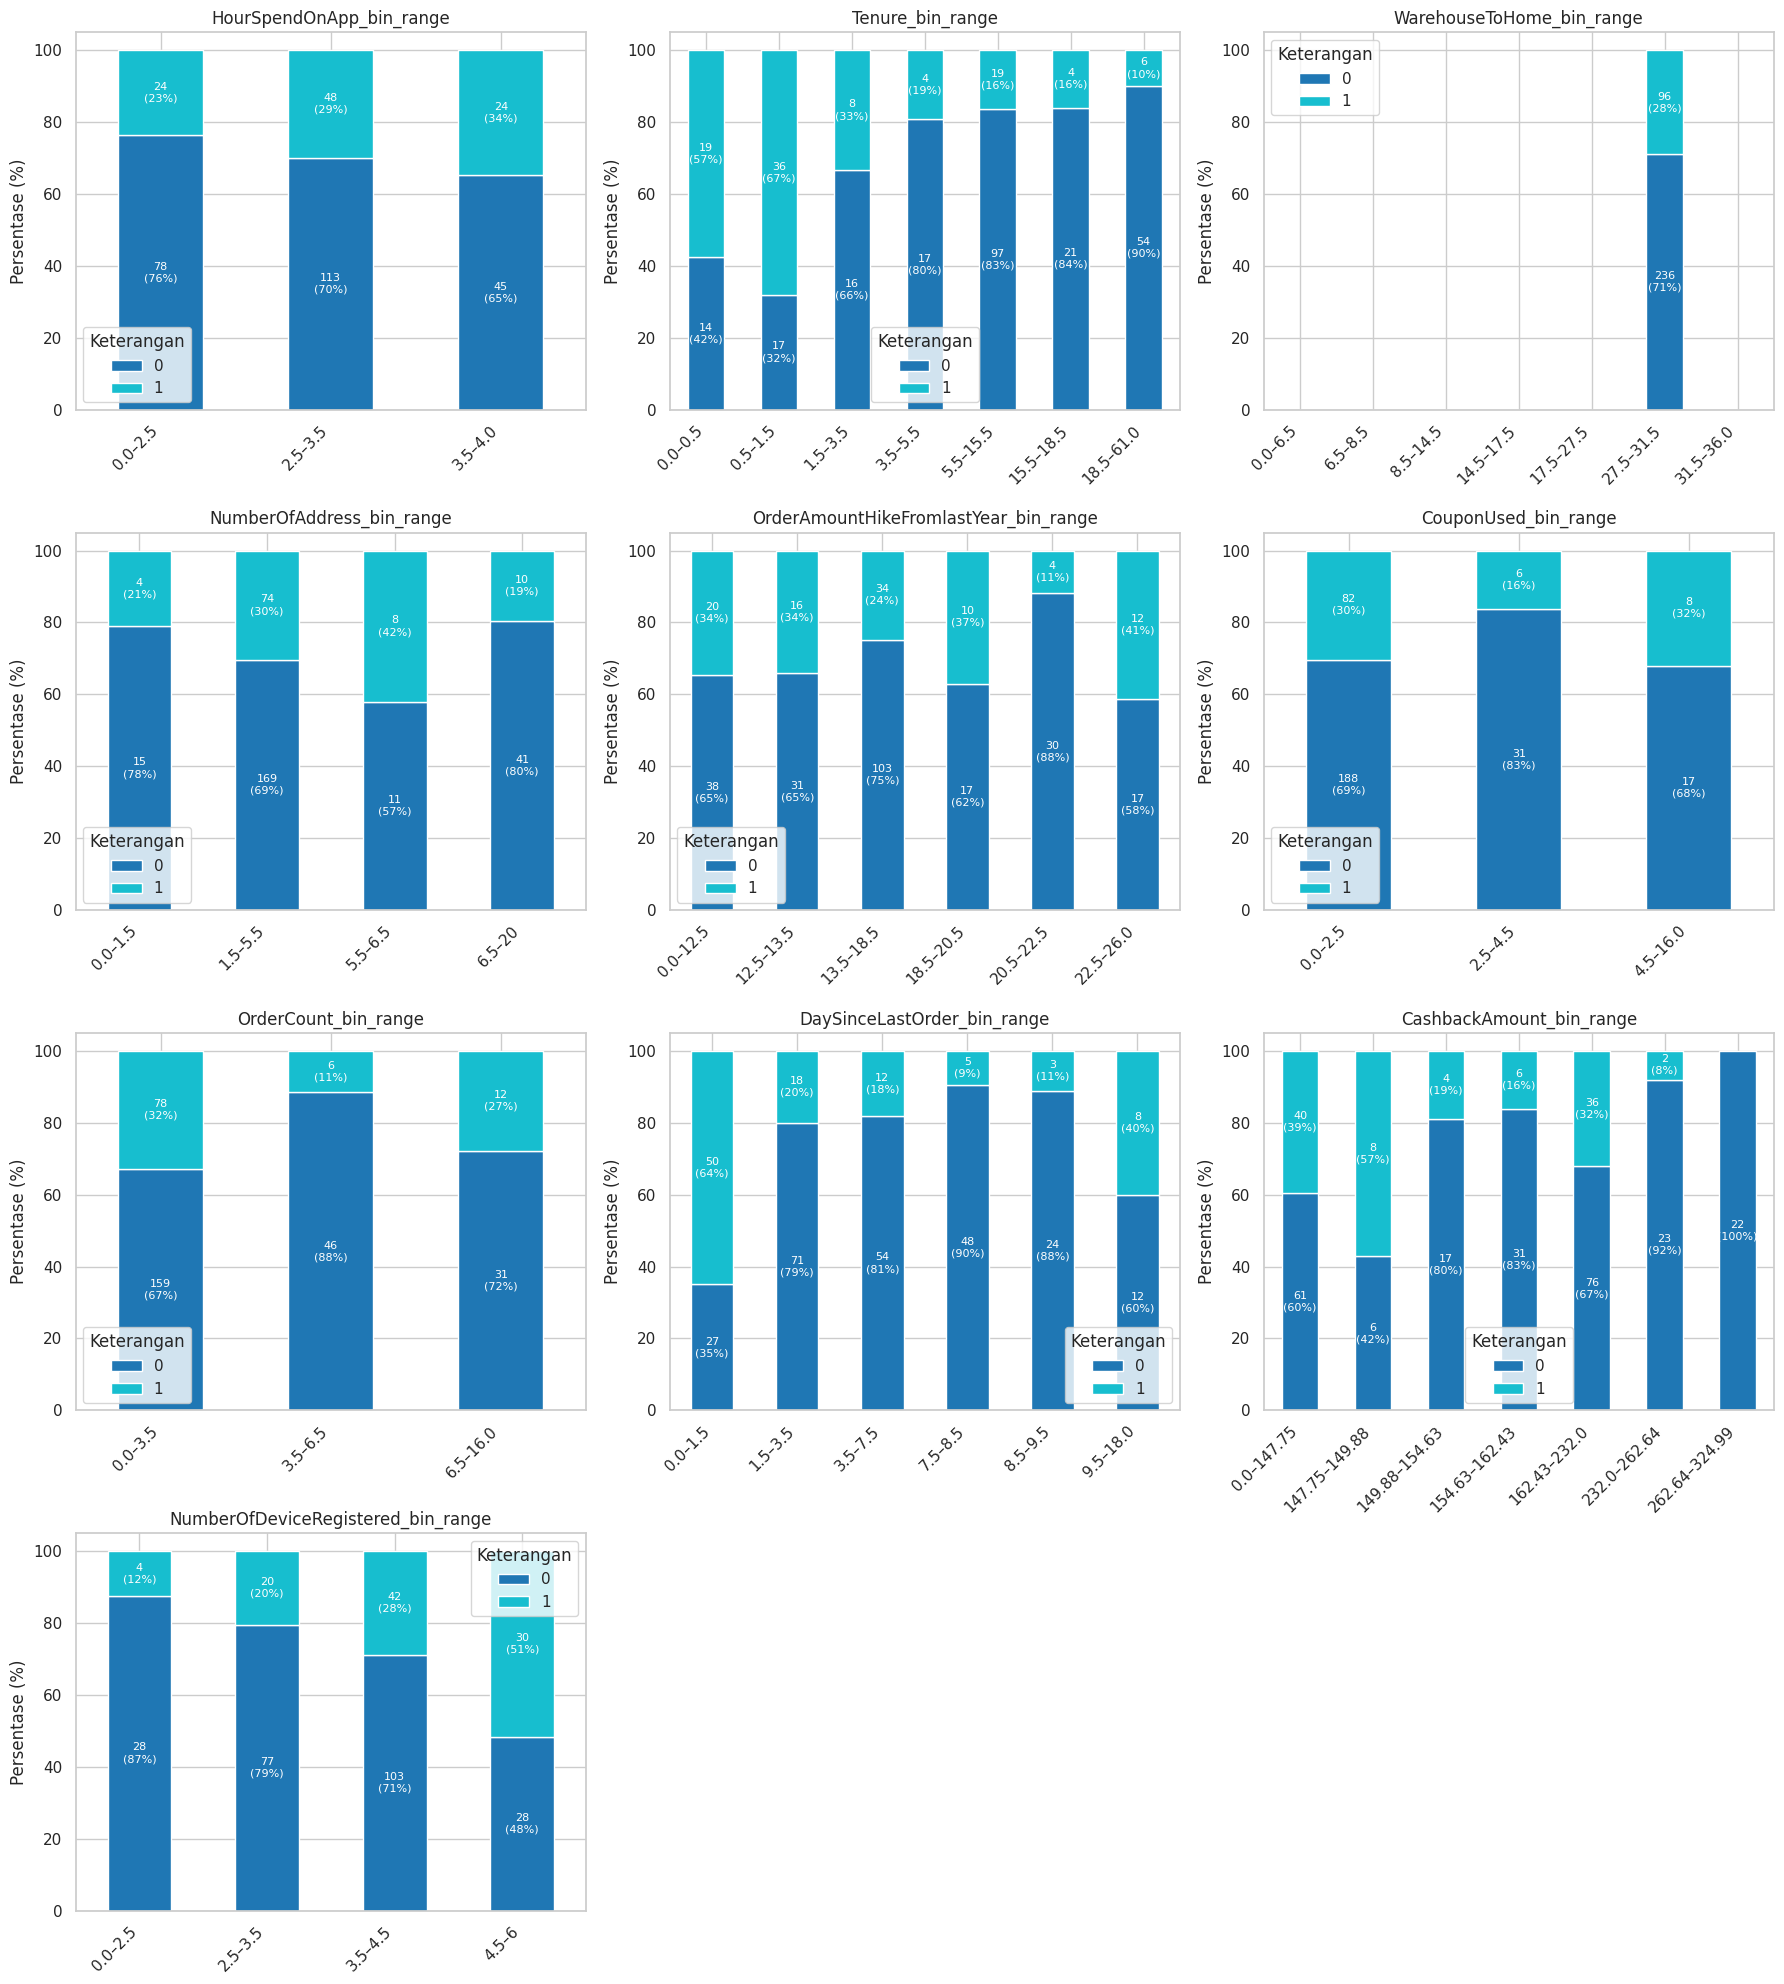

In [64]:
cols_to_plot = [
    'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range',
    'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range',
    'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range'
]

plot_multiple_stacked_churn(df_warehousehome_sample, cols_to_plot, churn_col='Churn', n_cols=3)

In [65]:
kategori_vars = ['PreferredLoginDevice', 'Gender', 'CityTier', 'MaritalStatus', 'PreferredPaymentMode', 'PreferedOrderCat', 'SatisfactionScore', 'Complain', 'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range', 'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range', 'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range']

for var in kategori_vars:
    print(f"\nAverage Churn by {var}:")
    print(df_warehousehome_sample.groupby(var)['Churn'].mean())


Average Churn by PreferredLoginDevice:
PreferredLoginDevice
Computer    0.269231
Phone       0.298246
Name: Churn, dtype: float64

Average Churn by Gender:
Gender
Female    0.232558
Male      0.325123
Name: Churn, dtype: float64

Average Churn by CityTier:
CityTier
1    0.219409
2    0.705882
3    0.410256
Name: Churn, dtype: float64

Average Churn by MaritalStatus:
MaritalStatus
Divorced    0.260870
Married     0.222222
Single      0.387097
Name: Churn, dtype: float64

Average Churn by PreferredPaymentMode:
PreferredPaymentMode
Cash on Delivery    0.266667
Credit Card         0.222222
Debit Card          0.279720
E wallet            0.434783
UPI                 0.500000
Name: Churn, dtype: float64

Average Churn by PreferedOrderCat:
PreferedOrderCat
Fashion               0.323529
Grocery               0.050000
Laptop & Accessory    0.174757
Mobile                0.421053
Mobile Phone          0.469136
Others                0.000000
Name: Churn, dtype: float64

Average Churn by Satisf

**Pelanggan yang Complain**

In [66]:
df_complainsample = df_edabin[df_edabin['Complain'] == 1].copy()

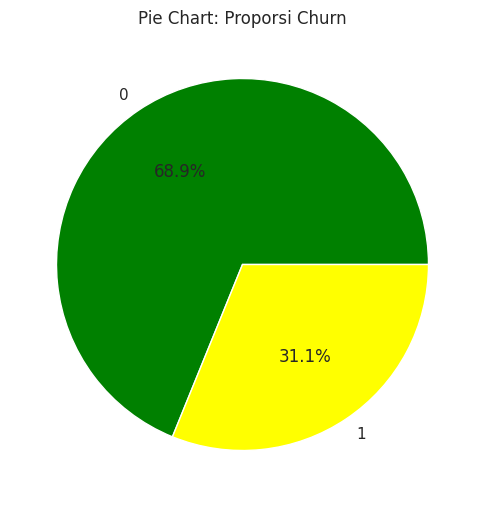

In [67]:
typee = df_complainsample["Churn"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["Green", "yellow"])
plt.title("Pie Chart: Proporsi Churn")
plt.ylabel("")
plt.show()

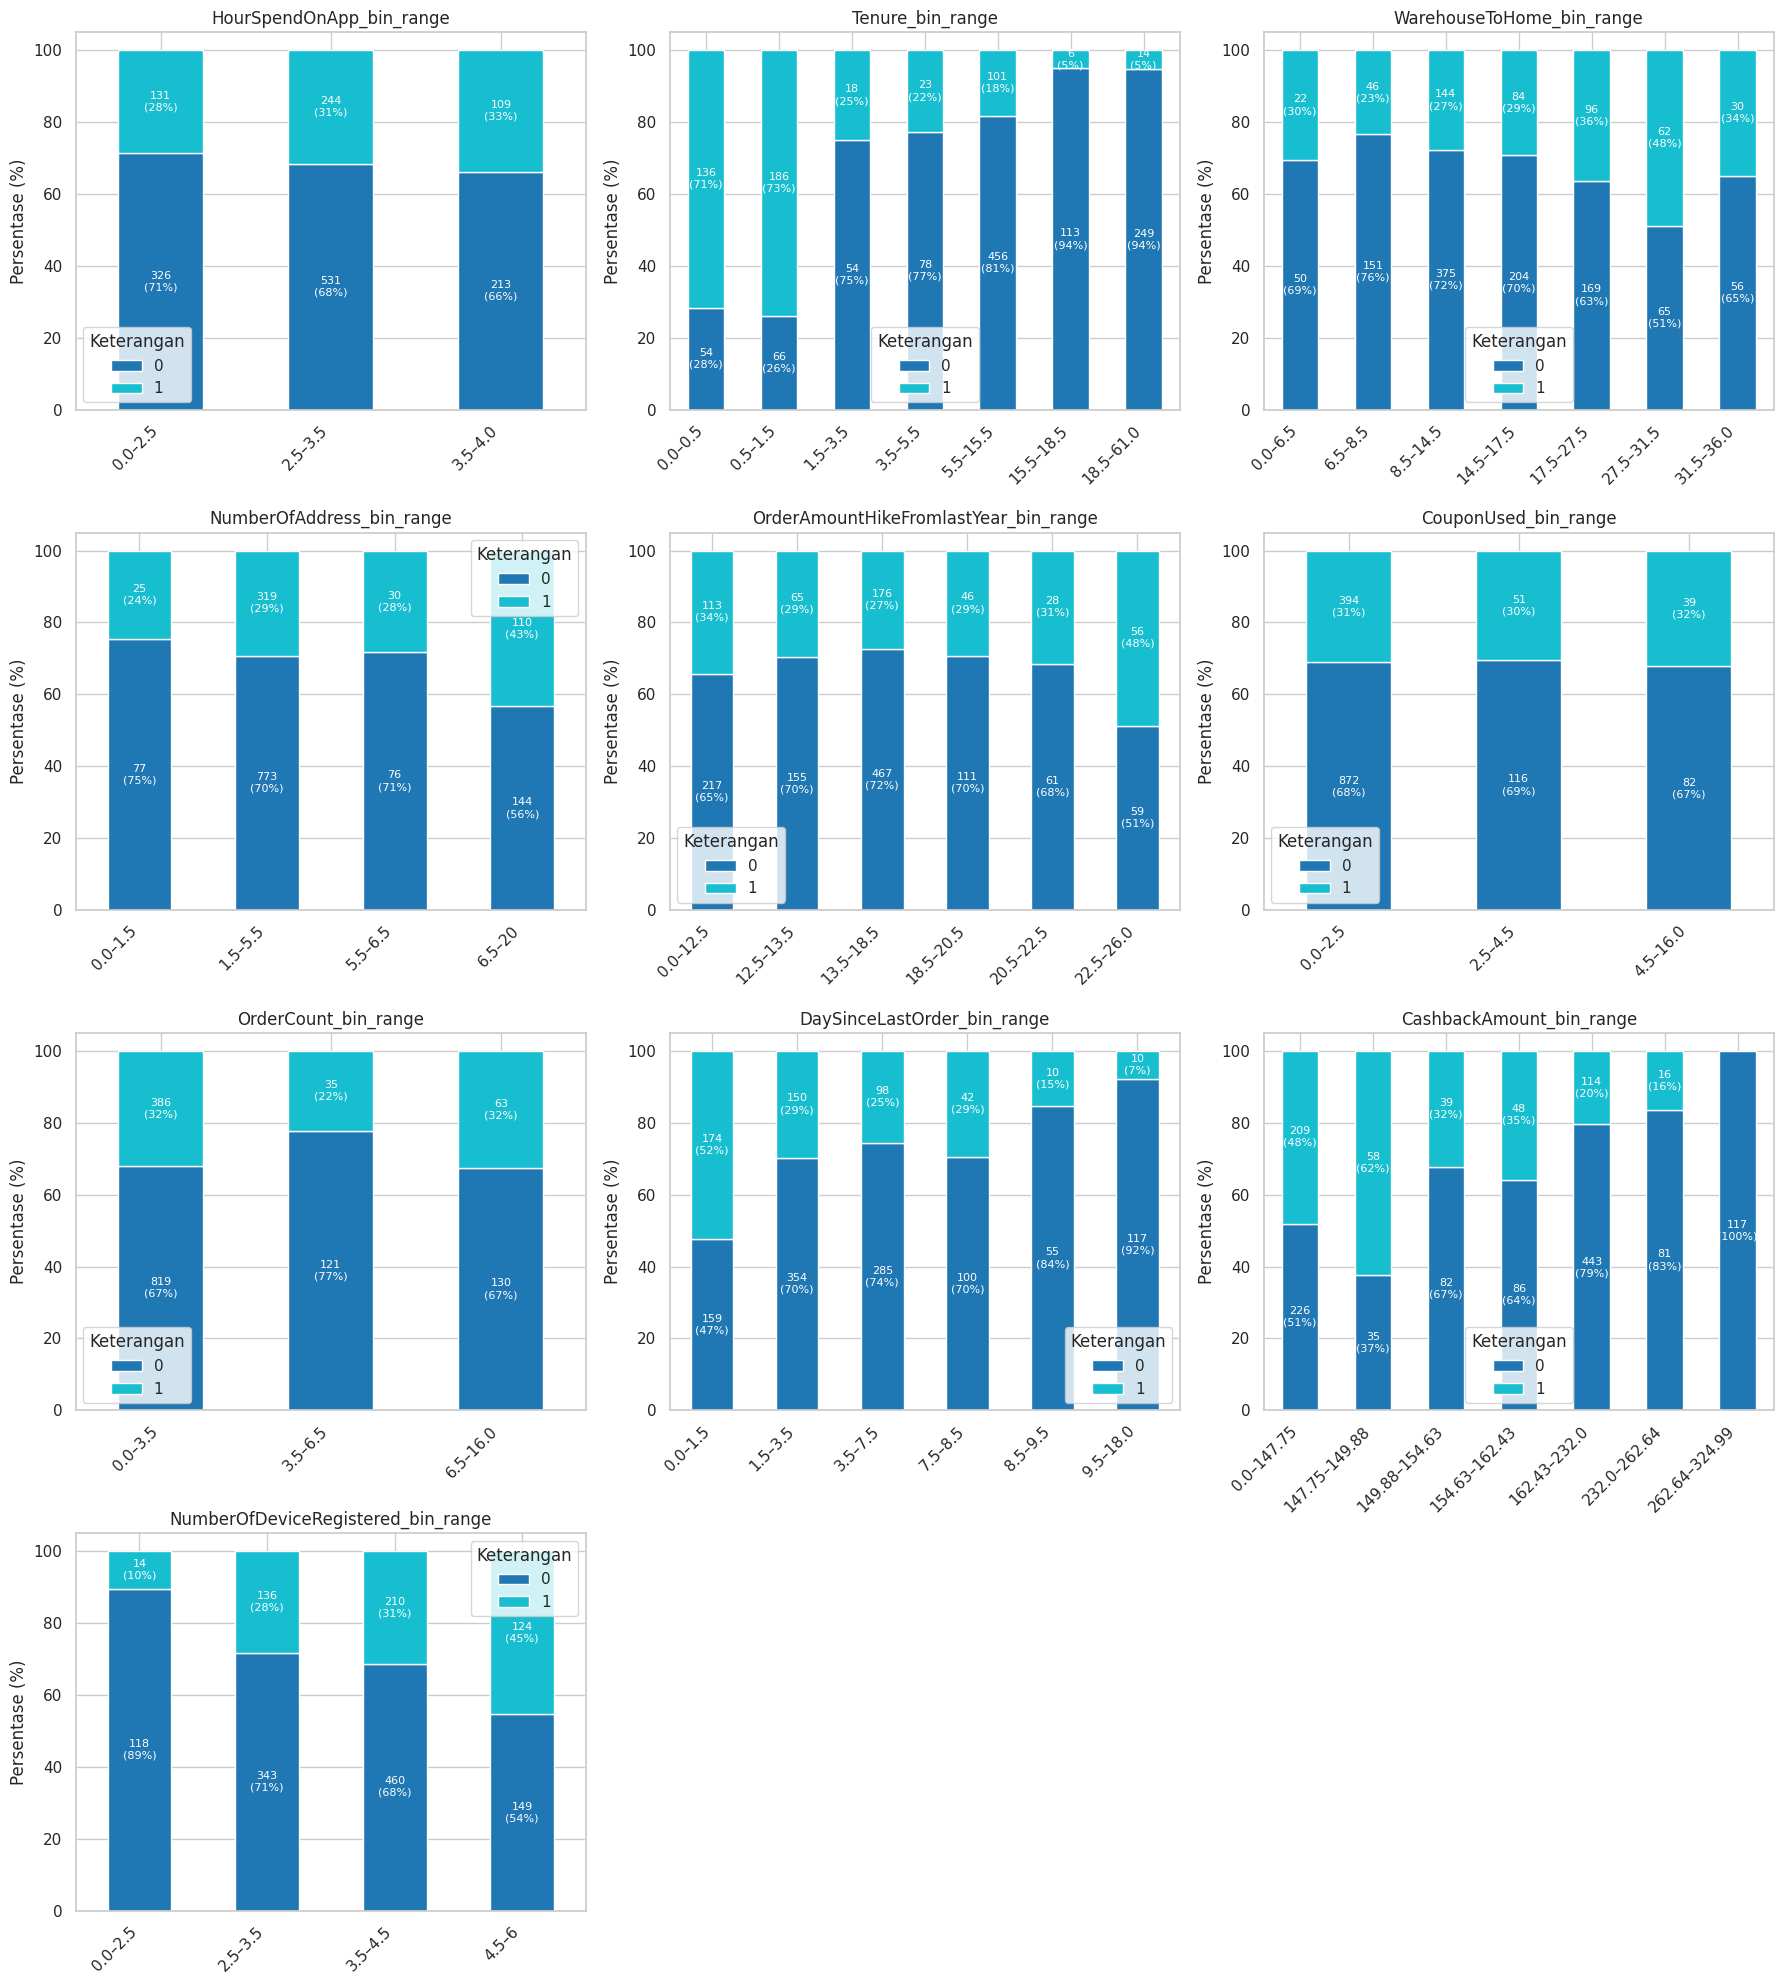

In [68]:
cols_to_plot = [
    'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range',
    'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range',
    'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range'
]

plot_multiple_stacked_churn(df_complainsample, cols_to_plot, churn_col='Churn', n_cols=3)

In [69]:
kategori_vars = ['PreferredLoginDevice', 'Gender', 'CityTier', 'MaritalStatus', 'PreferredPaymentMode', 'PreferedOrderCat', 'SatisfactionScore', 'Complain', 'HourSpendOnApp_bin_range', 'Tenure_bin_range', 'WarehouseToHome_bin_range', 'NumberOfAddress_bin_range', 'OrderAmountHikeFromlastYear_bin_range', 'CouponUsed_bin_range', 'OrderCount_bin_range', 'DaySinceLastOrder_bin_range', 'CashbackAmount_bin_range', 'NumberOfDeviceRegistered_bin_range']

for var in kategori_vars:
    print(f"\nAverage Churn by {var}:")
    print(df_complainsample.groupby(var)['Churn'].mean())


Average Churn by PreferredLoginDevice:
PreferredLoginDevice
Computer    0.363636
Phone       0.290118
Name: Churn, dtype: float64

Average Churn by Gender:
Gender
Female    0.268072
Male      0.343820
Name: Churn, dtype: float64

Average Churn by CityTier:
CityTier
1    0.279921
2    0.322581
3    0.376299
Name: Churn, dtype: float64

Average Churn by MaritalStatus:
MaritalStatus
Divorced    0.276860
Married     0.211422
Single      0.496933
Name: Churn, dtype: float64

Average Churn by PreferredPaymentMode:
PreferredPaymentMode
Cash on Delivery    0.369231
Credit Card         0.253086
Debit Card          0.304279
E wallet            0.440000
UPI                 0.333333
Name: Churn, dtype: float64

Average Churn by PreferedOrderCat:
PreferedOrderCat
Fashion               0.218487
Grocery               0.067797
Laptop & Accessory    0.186347
Mobile                0.562232
Mobile Phone          0.523161
Others                0.000000
Name: Churn, dtype: float64

Average Churn by Satisf

---

## **4.5. Pattern and its Business Implication**

**Cramér’s V Test**

Panduan interpretasi Cramér’s V:

|Nilai Cramér’s V    | Klasifikasi Asosiasi | |        |
| ------------------ | ---------------------- | ------------------ | --- |
| 0.00 – 0.10     | Diabaikan      |            
| 0.10 – 0.20     | Lemah          |
| 0.20 – 0.30     | Moderat        |      
| 0.30 – 0.50     | Kuat           |     
| > 0.50          | Sangat Kuat    |      

Note: Asosiasi yang ideal jatuh pada pada `Moderat, Kuat, & Sangat Kuat`


---

**Tenure Sample**


| Variable             | Nilai Churn  | Churn Rate      | Pola    |
| -------------------- | ------------ | ------------------ | -----------       |
| Tenure               | NaN          | NaN         | NaN         |
| Gender               | Female       | 53.5%              | NaN            |
| MartialStatus*        | Single       | 61.3%            | NaN           |
| CashbackAmount       | 147.75-149.88 | 65.4% |Semakin ↑ semakin tidak churn|
| CouponUsed           | 4.5 - 16.0     | 74.4%       |Semakin ↑ semakin churn |
| OrderCount           | 6.5 - 16.0      |72.4%        |Semakin ↑ semakin churn|
| `DaySinceLastOrder`    | 9.5 - 18.0     | 86.6%     |Semakin ↑ semakin churn |
| Complain             | Complain     | 72.8%   | NaN    |
| SatisfactionScore    | 5            | 61.4%              | NaN               |
| HourSpendOnApp       |  3.5-4.0      | 58.4%        |Semakin ↑ semakin churn |
| PreferedOrderCat*     | Fashion      | 77.2% | NaN |
| PreferredLoginDevice | Computer    | 60.9%       | NaN       |
| PreferredPaymentMode* | Cash on Delivery & E-Wallet | 69.2% - 68 %| NaN   |
| `NumberOfDeviceRegistered`| 4.5 - 6    | 69.5%     |Semakin ↑ semakin churn|
| WarehouseToHome      | 17.5 - 27.5 & 27.5 - 31.5|63.9% & 60.2%|Semakin ↑ semakin churn |
| `NumberOfAddress`          | 5.5 - 20    | 78.7%   |Semakin ↑ semakin churn |
| OrderAmountHikeFromlastYear | 22.5 - 26.0 | 62.2%   |Tidak berpola       |
| CityTier             | 2 | 77.3%   |NaN       |


Panduan:

`Text yang di hitamkan`:Tingkatan kuatnya asosiasoi terhadap 'Churn'

Text dengan tanda *: Asosiasi lemah mendekati moderate

In [70]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Identify all object or category dtype columns (excluding the target)
categorical_columns = df_tenure_sample.select_dtypes(include=['object', 'category']).columns.tolist()

# Compute Cramér's V against the target
cramers_v_scores = {}

for col in categorical_columns:
    try:
        score = cramers_v(df_tenure_sample[col], df_tenure_sample['Churn'])
        cramers_v_scores[col] = score
    except Exception as e:
        print(f"Error processing {col}: {e}")

# Display sorted results
sorted_cramers_v = dict(sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True))

for var, score in sorted_cramers_v.items():
    print(f"{var}: {score:.3f}")

NumberOfDeviceRegistered_bin_range: 0.276
DaySinceLastOrder_bin_range: 0.254
NumberOfAddress_bin_range: 0.243
PreferredPaymentMode: 0.187
PreferedOrderCat: 0.177
MaritalStatus: 0.176
WarehouseToHome_bin_range: 0.160
OrderCount_bin_range: 0.123
CouponUsed_bin_range: 0.120
PreferredLoginDevice: 0.114
CashbackAmount_bin_range: 0.114
OrderAmountHikeFromlastYear_bin_range: 0.098
HourSpendOnApp_bin_range: 0.072
Gender: 0.024
Tenure_bin_range: 0.007


Insight Terhadap Bisnis:
- *Sub-group* yang *churn* pada *cluster* ini berkemungkinan di dominasi oleh pelanggan wanita single yang kebiasaan berpindah dari satu daerah ke daerah lain. Memiliki selera 'fashion' yang beketergantungan. Tidak menykai kerumitan dalam proses pembayaran. Pelanggan yang *churn* pada kluster ini memiliki kecendrungan untuk membuat akun 'dummy' di *e-commerce*, dan terlihat dari jumlah registrasi perangkat mereka.
- Oleh karena itu secara umum mereka bisa juga di katakan *'Shopaholics'*. Retensi di awal pada tipe pelanggan ini sangat sulit, karena sifat impulsif mereka yang tinggi dan tidak adanya kecendrungan untuk menggunakan 1 atau 2 platform shopping saja. Oleh karena itu personalisasi penggunaan app dan situs *e-commerce* merupakan hal yang harus di tuju. Personalisasi dalam arti mudahnya pelanggan dalam menggunakan platform *e-commerce* dan ini bisa berupa, UI yang terstruktur dengan rapi termasuk font yang cukup besar untuk *mobile app*, tampilnya tawaran diskon atau bundle yang sesuai, algoritma yang dapat mengutamakan prefrensi pelanggan berdasarkan sejarah browsing mereka, pemesanan produk yang lalu, dan eye-tracking. Lebih sering pelanggan menemukan apa yang mereka inginkan di platform *e-commerce*, mereka akan cendrung untuk kembali lagi dan berkemungkinan akan *subscribe*.

---

**CashbackAmount Sample**


| Variable             | Nilai Churn  | Churn Rate      | Pola    |
| -------------------- | ------------ | ------------------ | -----------       |
| `Tenure`             | 0.5 - 1.5    | 67.4% | Semakin ↑ semakin tidak churn |
| Gender               | Male       | 39.3%              | NaN            |
| MartialStatus        | Single       | 40.4%            | NaN           |
| CashbackAmount       | NaN        | NaN              |NaN|
| CouponUsed           | 4.5 - 16.0     | 41.7%       |Tidak berpola |
| OrderCount           | 6.5 - 16.0      |42.8%        |Tidak berpola|
| `DaySinceLastOrder`  | 0.0 - 1.5     | 59.1%       |Tidak berpola |
| Complain             | Complain     | 62.3%   | NaN    |
| SatisfactionScore    | 5            | 44.9%              | NaN               |
| HourSpendOnApp*       |  2.5 - 3.5   | 42.6%        |Semakin ↑ semakin churn |
| `PreferedOrderCat`     | Mobile Phone | 42.6% | NaN |
| PreferredLoginDevice | Computer    | 44.8%       | NaN       |
| `PreferredPaymentMode` | Cash on Delivery | 54.5 %| NaN   |
| NumberOfDeviceRegistered    | 4.5 - 6    | 62.5%     |Semakin ↑ semakin churn|
| `WarehouseToHome`             | 27.5 - 31.5   | 57.1% |Semakin ↑ semakin churn |
| `NumberOfAddress` | 5.5 - 6.5 & 6.5 - 20| 50% & 52.8% |Semakin ↑ semakin churn |
| `OrderAmountHikeFromlastYear` |13.5–18.5 & 22.5–26.0|43.8% - 42.8% |Tidak berpola|
| CityTier             | 1 | 42%   |NaN       |

In [71]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Identify all object or category dtype columns (excluding the target)
categorical_columns = df_cashback_sample.select_dtypes(include=['object', 'category']).columns.tolist()

# Compute Cramér's V against the target
cramers_v_scores = {}

for col in categorical_columns:
    try:
        score = cramers_v(df_cashback_sample[col], df_cashback_sample['Churn'])
        cramers_v_scores[col] = score
    except Exception as e:
        print(f"Error processing {col}: {e}")

# Display sorted results
sorted_cramers_v = dict(sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True))

for var, score in sorted_cramers_v.items():
    print(f"{var}: {score:.3f}")

Tenure_bin_range: 0.548
DaySinceLastOrder_bin_range: 0.338
NumberOfAddress_bin_range: 0.297
OrderAmountHikeFromlastYear_bin_range: 0.233
PreferedOrderCat: 0.226
PreferredPaymentMode: 0.223
WarehouseToHome_bin_range: 0.211
HourSpendOnApp_bin_range: 0.195
PreferredLoginDevice: 0.104
Gender: 0.092
MaritalStatus: 0.073
CouponUsed_bin_range: 0.059
OrderCount_bin_range: 0.058
CashbackAmount_bin_range: nan
NumberOfDeviceRegistered_bin_range: 0.343


Insight terhadap bisnis:
- *Sub-group* yang *churn* pada kluster ini di wakili oleh pria yang sangat aktif dalam pembelian product *e-commerce*. Pelanggn pada cluster ini cukup  aktif dalam *e-commerce* dalam melakukan pembelian, di mana aktif dalam kenaikan order minimal 13% dan maksimum 26%. Dan mareka cendrung tidak memperhatikan cashback yang diperoleh.
- Pelanggan pada kluster ini terlihat lebih fokus kepada *'one time purchase'*, dalam arti kata mereka lebih memilih untuk sekali pembelian dengan jumlah yang cukup banyak dan terlihat terbebani dengan jarak gudang *e-commerce* yang terlihat dari jarak antara 27.5 - 31.5 km, di mana mereka terlihat lebih memilih untuk membayar saat barang telah tiba. Pelanggan ini mementingkan jaminan tibanya barang terhadap jasa kurir. Karena mereka sangat sensitif dengan pembelian awal, bisa dengan menawarkan free *delivery* berdasarkan jumlah *order* dan ini akan memberikan insentif kepada pelanggan untuk melakukan pembelian produk dalam jumlah banyak. Perusahaan juga harus fokus kepada system pengiriman yang transparan dalam arti informasi *shipping* yang terus di update dan adanya kompensasi apabila terjadi permasalahan dari pihak kurir. Menawarkan pengiriman express yang terjangkau dapat mengatasi kecendrungan mereka dengan jarak *shipping* yang jauh.   

---

**DaySinceLastOrder Sample**


| Variable             | Nilai Churn  | Churn Rate      | Pola    |
| -------------------- | ------------ | ------------------ | -----------       |
| `Tenure`              | 0.5–1.5    | 70.8% | Semakin ↑ semakin tidak churn |
| Gender               | Male       | 33.9%              | NaN            |
| `MartialStatus`        | Single       | 44.8%            | NaN           |
| CashbackAmount       | 147.75–149.88| 59.1%  |Semakin ↑ semakin tidak churn|
| CouponUsed           | 0.0–2.5     | 32.4%  |Semakin ↑ semakin tidak churn |
| OrderCount           | 0.0–3.5    |32.6%       |Semakin ↑ semakin tidak churn|
| DaySinceLastOrder    | NaN    | NaN       |NaN   |
| Complain             | Complain     | 52.2%   | NaN    |
| SatisfactionScore    | 5            | 47.2%              | NaN               |
| HourSpendOnApp    |  2.5–3.5 & 3.5–4.0| 33.6% & 33% |Semakin ↑ semakin churn(weak) |
| `PreferedOrderCat`     | Mobile Phone | 46.3% | NaN |
| PreferredLoginDevice | Computer    | 40.4%       | NaN       |
| PreferredPaymentMode* | Cash on Delivery | 49.4%| NaN   |
| NumberOfDeviceRegistered    | 4.5 – 6    | 44.9%     |Semakin ↑ semakin churn|
| `WarehouseToHome`             | 27.5 – 31.5   | 64.9% |Semakin ↑ semakin churn |
| NumberOfAddress | 1.5–5.5 & 6.5–20| 33.7% & 30.2% |Tidak berpola |
| OrderAmountHikeFromlastYear |22.5–26.0|45.9% |Tidak berpola|
| CityTier             | 2 | 47.8%   |NaN       |

early churners dan didukung oleh tenure
single
produk mobile phone
sensitif juga terhadap delivery distance


In [72]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Identify all object or category dtype columns (excluding the target)
categorical_columns = df_daylast_sample.select_dtypes(include=['object', 'category']).columns.tolist()

# Compute Cramér's V against the target
cramers_v_scores = {}

for col in categorical_columns:
    try:
        score = cramers_v(df_daylast_sample[col], df_daylast_sample['Churn'])
        cramers_v_scores[col] = score
    except Exception as e:
        print(f"Error processing {col}: {e}")

# Display sorted results
sorted_cramers_v = dict(sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True))

for var, score in sorted_cramers_v.items():
    print(f"{var}: {score:.3f}")

Tenure_bin_range: 0.540
PreferedOrderCat: 0.316
WarehouseToHome_bin_range: 0.229
MaritalStatus: 0.223
PreferredPaymentMode: 0.170
PreferredLoginDevice: 0.118
OrderCount_bin_range: 0.107
OrderAmountHikeFromlastYear_bin_range: 0.101
CouponUsed_bin_range: 0.086
DaySinceLastOrder_bin_range: nan
CashbackAmount_bin_range: 0.303
NumberOfDeviceRegistered_bin_range: 0.166
NumberOfAddress_bin_range: 0.075
Gender: 0.056
HourSpendOnApp_bin_range: 0.054


Insight terhadap bisnis:
- Pada kluster ini, pelanggan belum berkeluarga dan sangatlah sensitif terhadap jarak *delivery* ke lokasi tujuan pelanggan. Terlihat dari Cramers V score yang tinggi pada kategori produk mobil phone, pelanggan pada kluster ini berkemungkinan sangat aktif dalam pemesanan elektronik terutama mobile phone.
- Pelanggan pada cluster ini terlihat berkarakteristik 'smartphone tech savvy', di mana mereka sangatlah sensitif dan detil dalam pemesanan mobile phone. Di karenakan mobile phone memiliki pasar yang kompetitif, *e-commerce* bisa mengutamakan tampilan spesifikasi yang detil dan menambahkan video demonstrasi produk tersebut, dalam bentuk upaya visualisasi dan informasi. *E-commerce* juga bisa menyediakan chat bot ai dan customer service, sehingga pelanggan puas dengan layanan *e-commerce* dan untuk mengurangi risiko mereka pindah platform. Menyediakan *express delivery* dan asuransi kerusakan barang juga bisa membantu kepuasan pelanggan terhadap layanan *e-commerce*. Oleh karena itu pendekatan awal terhadap pelanggan sangatlah penting dikarenakan karakteristik *early churners*.  

---

**WarehouseToHome Sample (27.5–31.5)**


| Variable             | Nilai Churn  | Churn Rate      | Pola    |
| -------------------- | ------------ | ------------------ | -----------       |
| `Tenure`               | 0.5–1.5    | 67.9% | Semakin ↑ semakin tidak churn |
| Gender               | Male       | 32.5%              | NaN            |
| MartialStatus        | Single       | 38.7%            | NaN           |
| `CashbackAmount`       | 147.75–149.88| 57.1%  |Semakin ↑ semakin tidak churn|
| CouponUsed           | 4.5–16.0     | 32%  |Tidak berpola |
| OrderCount*           | 0.0–3.5    |32.9%       |Tidak berpola|
| `DaySinceLastOrder`    | 0.0–1.5    | 64.9%       |Tidak berpola   |
| Complain             | Complain     | 48.8%   | NaN    |
| SatisfactionScore    | 5            | 42.3%              | NaN               |
| HourSpendOnApp       |  3.5–4.0| 34.7% |Semakin ↑ semakin churn |
| `PreferedOrderCat`     | Mobile Phone | 46.9% | NaN |
| PreferredLoginDevice | Phone    | 29.8%       | NaN       |
| PreferredPaymentMode* | UPI | 50%| NaN   |
| `NumberOfDeviceRegistered`  | 4.5 – 6    | 51.7%     |Semakin ↑ semakin churn|
| WarehouseToHome             | NaN   | NaN |NaN|
| NumberOfAddress | 5.5–6.5 | 42.1% |Semakin ↑ semakin churn(weak) |
| OrderAmountHikeFromlastYear* |22.5–26.0|41.4% |Tidak berpola|
| CityTier             | 2 | 70.5%   |NaN       |

In [73]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Identify all object or category dtype columns (excluding the target)
categorical_columns = df_warehousehome_sample.select_dtypes(include=['object', 'category']).columns.tolist()

# Compute Cramér's V against the target
cramers_v_scores = {}

for col in categorical_columns:
    try:
        score = cramers_v(df_warehousehome_sample[col], df_warehousehome_sample['Churn'])
        cramers_v_scores[col] = score
    except Exception as e:
        print(f"Error processing {col}: {e}")

# Display sorted results
sorted_cramers_v = dict(sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True))

for var, score in sorted_cramers_v.items():
    print(f"{var}: {score:.3f}")

Tenure_bin_range: 0.475
WarehouseToHome_bin_range: nan
DaySinceLastOrder_bin_range: 0.462
PreferedOrderCat: 0.324
CashbackAmount_bin_range: 0.299
NumberOfDeviceRegistered_bin_range: 0.258
PreferredPaymentMode: 0.181
OrderAmountHikeFromlastYear_bin_range: 0.178
OrderCount_bin_range: 0.169
MaritalStatus: 0.169
NumberOfAddress_bin_range: 0.118
CouponUsed_bin_range: 0.100
Gender: 0.093
HourSpendOnApp_bin_range: 0.089
PreferredLoginDevice: 0.023


Insight terhadap bisnis:
- Pada kluster ini, pelanggan sensitif dengan jarak dalam pemesanan produk elektronik seperti *mobile phone*. Pelanggan juga memiliki churn yang sensitif berdasarkan jumlah perangkat yang tinggi. Pembayaran UPI atau juga disebut dengan sentralisasi pembayaran melalui aplikasi eksternal .
- Pelanggan pada kluster ini lebih mengutamakan keamanan dalam melakukan metode pembayaran, di karenakan pelanggan memiliki churn yang tinggi dalam metode pembayaran melalui aplikasi eksternal. *E-commerce* dapat memberikan opsi pembayaran yang luas dan aman dalam menjalankan pembayaran melalui platform *e-commerce* sehinggan pelanggan cukup puas dan merasa aman dalam berinteraksi dengan *e-commerce*. Perusahaan dapat meng-implementasikan '3 step verification' agar timbulnya rasa aman dalam melakukan pembayaran. Pelanggan juga churn terhadap tingginya perangkat yang perlu di daftarkan. Survey bertipe likert bisa di implementasikan dalam kepuasan terhadap registrasi perangkat, sehingga pelanggan lebih fokus dalam memberikan kesan mereka terhadap *e-commerce*. Menyederhanakan registrasi perangkat seperti memberi opsi akun bersama ataupun parental control demi keamanan dan kemudahan pelanggan dalam melakukan interaksi awal terhadap *e-commerce*.

**Complain Sample**


| Variable             | Nilai Churn  | Churn Rate      | Pola    |
| -------------------- | ------------ | ------------------ | -----------       |
| `Tenure`               | 0.5–1.5    | 73.8% | Semakin ↑ semakin tidak churn |
| Gender               | Male       | 34.3%              | NaN            |
| `MartialStatus`        | Single       | 49.6%            | NaN           |
| `CashbackAmount`       | 147.75–149.88| 62.3%  |Semakin ↑ semakin tidak churn|
| CouponUsed           | Tidak Signifikan| Tidak Signifikan|Tidak Signifikan |
| OrderCount           | 0.0–3.5 & 6.5–16.0    |32%–32.6%       |Tidak berpola|
| `DaySinceLastOrder`  | 0.0–1.5    | 52.2%   |Semakin ↑ semakin tidak churn   |
| Complain             | NaN     | NaN   | NaN    |
| SatisfactionScore    | 4 & 5            | 36.7%–36.8%              | NaN               |
| HourSpendOnApp    |  2.5–3.5 & 3.5–4.0| 31.5%–33.8% |Semakin ↑ semakin churn(weak) |
| `PreferedOrderCat`     | Mobile | 56.2% | NaN |
| PreferredLoginDevice | Computer    | 36.3%       | NaN       |
| PreferredPaymentMode | E-Wallet | 44%| NaN   |
| NumberOfDeviceRegistered*    | 4.5 – 6    | 45.4%     |Semakin ↑ semakin churn|
| WarehouseToHome             | 27.5–31.5   | 48.9% |Semakin ↑ semakin churn|
| NumberOfAddress | 6.5–20 | 43.3% |Semakin ↑ semakin churn |
| OrderAmountHikeFromlastYear |22.5–26.0|48.6% |Semakin ↑ semakin churn|
| CityTier             | 3 | 37.6%   |NaN       |

In [74]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Identify all object or category dtype columns (excluding the target)
categorical_columns = df_complainsample.select_dtypes(include=['object', 'category']).columns.tolist()

# Compute Cramér's V against the target
cramers_v_scores = {}

for col in categorical_columns:
    try:
        score = cramers_v(df_complainsample[col], df_complainsample['Churn'])
        cramers_v_scores[col] = score
    except Exception as e:
        print(f"Error processing {col}: {e}")

# Display sorted results
sorted_cramers_v = dict(sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True))

for var, score in sorted_cramers_v.items():
    print(f"{var}: {score:.3f}")

Tenure_bin_range: 0.582
PreferedOrderCat: 0.403
CashbackAmount_bin_range: 0.353
MaritalStatus: 0.276
DaySinceLastOrder_bin_range: 0.272
NumberOfDeviceRegistered_bin_range: 0.186
WarehouseToHome_bin_range: 0.142
PreferredPaymentMode: 0.123
OrderAmountHikeFromlastYear_bin_range: 0.121
NumberOfAddress_bin_range: 0.119
Gender: 0.080
PreferredLoginDevice: 0.071
OrderCount_bin_range: 0.063
HourSpendOnApp_bin_range: 0.040
CouponUsed_bin_range: 0.008


Implikasi terhadap bisnis:
- Pelanggan yang kebanyak mengajukan *complain* kepada *e-commerce* memiliki cashback yang relatif rendah dan belum berkeluarga. Juga memiliki karakteristik early churners. Dan pemesanan produk kategori *'mobile'* di mana ini tidak hanya smartphone, tetapi juga produk seperti tablets, casing elektronik, chargers, dan headphone.
- Seperti pelanggan yang memiliki karakteristik *'smartphone tech savvy'*, kluster ini memiliki repertoar atau jangkauan produk elektronik yang lebih luas. Olehkarena itu perusahaan bisa prioritaskan segmentasi terhadap produk yang merupakan ekstensi dari tablet ataupun smartphone seperti headphone, casing smartphone atau tablet, ataupun charger. Di mana produk ini tidak terlalu sensitif terhadap harga. Produk ini termasuk memiliki biaya yang rendah sehingga *e-commerce* lebih fleksible dalam permainan harga di bandingkan pesaing lain. Memberikan opsi *bundle* aksesoris yang terjangkau dalam pembelian smartphone atau tablet juga bisa di implementasikan.   